# Exoplanet Classification using Kepler KOI Data

## 1. Introduction and Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb





pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
original_data = pd.read_csv('/content/cumulative_2025.10.04_16.38.22.csv', sep=',', skiprows=144) # The commented lines of the .csv aren't being ignored, so we ignore them with skiprows=144
original_data.head()

rowid     kepid kepoi_name   kepler_name koi_disposition koi_vet_stat  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED         Done   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED         Done   
2      3  10811496  K00753.01           NaN       CANDIDATE         Done   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE         Done   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED         Done   

  koi_vet_date koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  \
0   2018-08-16        CANDIDATE      1.000              0              0   
1   2018-08-16        CANDIDATE      0.969              0              0   
2   2018-08-16        CANDIDATE      0.000              0              0   
3   2018-08-16   FALSE POSITIVE      0.000              0              1   
4   2018-08-16        CANDIDATE      1.000              0              0   

   koi_fpflag_co  koi_fpflag_ec        koi_disp_prov  \
0              0              0  q1_q17_dr25_sup_koi   
1              0              0  q1_q17_dr25_sup_koi   
2              0              0  q1_q17_dr25_sup_koi   
3              0              0  q1_q17_dr25_sup_koi   
4              0              0  q1_q17_dr25_sup_koi   

                                        koi_comment  koi_period  \
0                                        NO_COMMENT    9.488036   
1                                        NO_COMMENT   54.418383   
2                                     DEEP_V_SHAPED   19.899140   
3  MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED    1.736952   
4                                        NO_COMMENT    2.525592   

   koi_period_err1  koi_period_err2  koi_time0bk  koi_time0bk_err1  \
0     2.775000e-05    -2.775000e-05   170.538750          0.002160   
1     2.479000e-04    -2.479000e-04   162.513840          0.003520   
2     1.494000e-05    -1.494000e-05   175.850252          0.000581   
3     2.630000e-07    -2.630000e-07   170.307565          0.000115   
4     3.761000e-06    -3.761000e-06   171.595550          0.001130   

   koi_time0bk_err2    koi_time0  koi_time0_err1  koi_time0_err2  koi_eccen  \
0         -0.002160  2455003.539        0.002160       -0.002160        0.0   
1         -0.003520  2454995.514        0.003520       -0.003520        0.0   
2         -0.000581  2455008.850        0.000581       -0.000581        0.0   
3         -0.000115  2455003.308        0.000115       -0.000115        0.0   
4         -0.001130  2455004.596        0.001130       -0.001130        0.0   

   koi_eccen_err1  koi_eccen_err2  koi_longp  koi_longp_err1  koi_longp_err2  \
0             NaN             NaN        NaN             NaN             NaN   
1             NaN             NaN        NaN             NaN             NaN   
2             NaN             NaN        NaN             NaN             NaN   
3             NaN             NaN        NaN             NaN             NaN   
4             NaN             NaN        NaN             NaN             NaN   

   koi_impact  koi_impact_err1  koi_impact_err2  koi_duration  \
0       0.146            0.318           -0.146       2.95750   
1       0.586            0.059           -0.443       4.50700   
2       0.969            5.126           -0.077       1.78220   
3       1.276            0.115           -0.092       2.40641   
4       0.701            0.235           -0.478       1.65450   

   koi_duration_err1  koi_duration_err2  koi_ingress  koi_ingress_err1  \
0            0.08190           -0.08190          NaN               NaN   
1            0.11600           -0.11600          NaN               NaN   
2            0.03410           -0.03410          NaN               NaN   
3            0.00537           -0.00537          NaN               NaN   
4            0.04200           -0.04200          NaN               NaN   

   koi_ingress_err2  koi_depth  koi_depth_err1  koi_depth_err2   koi_ror  \
0               NaN      615.8            19.5           -19

In [3]:
print(original_data.columns.values)


['rowid' 'kepid' 'kepoi_name' 'kepler_name' 'koi_disposition'
 'koi_vet_stat' 'koi_vet_date' 'koi_pdisposition' 'koi_score'
 'koi_fpflag_nt' 'koi_fpflag_ss' 'koi_fpflag_co' 'koi_fpflag_ec'
 'koi_disp_prov' 'koi_comment' 'koi_period' 'koi_period_err1'
 'koi_period_err2' 'koi_time0bk' 'koi_time0bk_err1' 'koi_time0bk_err2'
 'koi_time0' 'koi_time0_err1' 'koi_time0_err2' 'koi_eccen'
 'koi_eccen_err1' 'koi_eccen_err2' 'koi_longp' 'koi_longp_err1'
 'koi_longp_err2' 'koi_impact' 'koi_impact_err1' 'koi_impact_err2'
 'koi_duration' 'koi_duration_err1' 'koi_duration_err2' 'koi_ingress'
 'koi_ingress_err1' 'koi_ingress_err2' 'koi_depth' 'koi_depth_err1'
 'koi_depth_err2' 'koi_ror' 'koi_ror_err1' 'koi_ror_err2' 'koi_srho'
 'koi_srho_err1' 'koi_srho_err2' 'koi_fittype' 'koi_prad' 'koi_prad_err1'
 'koi_prad_err2' 'koi_sma' 'koi_sma_err1' 'koi_sma_err2' 'koi_incl'
 'koi_incl_err1' 'koi_incl_err2' 'koi_teq' 'koi_teq_err1' 'koi_teq_err2'
 'koi_insol' 'koi_insol_err1' 'koi_insol_err2' 'koi_dor' 'koi_dor_

## 2. Data Cleaning and Preprocessing

### 2.1. Remove Leakage and Metadata

The follwing features are either identifiers, values obtained after knowing if a given KOI is a False Candidate or Confirmed Exoplanet, or simply Metadata from the way other features were obtained.

In [4]:
columns_to_remove = ['kepoi_name','kepler_name','koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_score','koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
                    'koi_fpflag_ec','koi_disp_prov', 'koi_comment', 'koi_fittype', 'koi_limbdark_mod', 'koi_parm_prov', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_count','koi_quarters',
                    'koi_trans_mod', 'koi_model_dof', 'koi_model_chisq', 'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_sparprov']

col_filtered_data = original_data.drop(columns=columns_to_remove, axis= 1)
print(col_filtered_data.columns.values)


['rowid' 'kepid' 'koi_disposition' 'koi_period' 'koi_period_err1'
 'koi_period_err2' 'koi_time0bk' 'koi_time0bk_err1' 'koi_time0bk_err2'
 'koi_time0' 'koi_time0_err1' 'koi_time0_err2' 'koi_eccen'
 'koi_eccen_err1' 'koi_eccen_err2' 'koi_longp' 'koi_longp_err1'
 'koi_longp_err2' 'koi_impact' 'koi_impact_err1' 'koi_impact_err2'
 'koi_duration' 'koi_duration_err1' 'koi_duration_err2' 'koi_ingress'
 'koi_ingress_err1' 'koi_ingress_err2' 'koi_depth' 'koi_depth_err1'
 'koi_depth_err2' 'koi_ror' 'koi_ror_err1' 'koi_ror_err2' 'koi_srho'
 'koi_srho_err1' 'koi_srho_err2' 'koi_prad' 'koi_prad_err1'
 'koi_prad_err2' 'koi_sma' 'koi_sma_err1' 'koi_sma_err2' 'koi_incl'
 'koi_incl_err1' 'koi_incl_err2' 'koi_teq' 'koi_teq_err1' 'koi_teq_err2'
 'koi_insol' 'koi_insol_err1' 'koi_insol_err2' 'koi_dor' 'koi_dor_err1'
 'koi_dor_err2' 'koi_ldm_coeff4' 'koi_ldm_coeff3' 'koi_ldm_coeff2'
 'koi_ldm_coeff1' 'koi_max_sngle_ev' 'koi_max_mult_ev' 'koi_model_snr'
 'koi_num_transits' 'koi_bin_oedp_sig' 'koi_steff' 'koi

### 2.2. Handle Missing Data

In [5]:
missing_number = col_filtered_data.isnull().sum()
missing_number_percentage = (col_filtered_data.isnull().sum())/len(col_filtered_data) * 100

missing = pd.DataFrame({'Missing Number': missing_number, 'Missing Percentage': missing_number_percentage})
missing = missing[missing['Missing Number'] > 0].sort_values('Missing Percentage', ascending=False)
missing

Missing Number  Missing Percentage
koi_eccen_err2                9564          100.000000
koi_longp                     9564          100.000000
koi_longp_err1                9564          100.000000
koi_eccen_err1                9564          100.000000
koi_sma_err2                  9564          100.000000
koi_incl_err2                 9564          100.000000
koi_incl_err1                 9564          100.000000
koi_ingress_err2              9564          100.000000
koi_ingress                   9564          100.000000
koi_ingress_err1              9564          100.000000
koi_longp_err2                9564          100.000000
koi_teq_err2                  9564          100.000000
koi_teq_err1                  9564          100.000000
koi_sma_err1                  9564          100.000000
koi_sage                      9564          100.000000
koi_sage_err1                 9564          100.000000
koi_sage_err2                 9564          100.000000
koi_bin_oedp_sig              1510           15.788373
koi_max_sngle_ev              1142           11.940611
koi_max_mult_ev               1142           11.940611
koi_num_transits              1142           11.940611
koi_fwm_stat_sig              1076           11.250523
koi_fwm_prao                   830            8.678377
koi_fwm_prao_err               830            8.678377
koi_fwm_pdeco                  817            8.542451
koi_fwm_pdeco_err              817            8.542451
koi_zmag                       613            6.409452
koi_dicco_mdec_err             599            6.263070
koi_dicco_mra                  599            6.263070
koi_dicco_mra_err              599            6.263070
koi_dicco_msky                 599            6.263070
koi_dicco_msky_err             599            6.263070
koi_dicco_mdec                 599            6.263070
koi_dikco_mra_err              570            5.959849
koi_dikco_mdec                 570            5.959849
koi_dikco_msky                 570            5.959849
koi_dikco_mra                  570            5.959849
koi_dikco_mdec_err             570            5.959849
koi_dikco_msky_err             570            5.959849
koi_fwm_sdec                   506            5.290673
koi_fwm_sra_err                506            5.290673
koi_fwm_sra                    506            5.290673
koi_fwm_sdec_err               506            5.290673
koi_steff_err2                 483            5.050188
koi_srad_err2                  468            4.893350
koi_steff_err1                 468            4.893350
koi_slogg_err1                 468            4.893350
koi_slogg_err2                 468            4.893350
koi_smass_err2                 468            4.893350
koi_smass_err1                 468            4.893350
koi_srad_err1                  468            4.893350
koi_fwm_sdeco                  455            4.757424
koi_fwm_sdeco_err              455            4.757424
koi_fwm_srao                   455            4.757424
koi_fwm_srao_err               455            4.757424
koi_time0_err2                 454            4.746968
koi_dor_err2                   454            4.746968
koi_dor_err1                   454            4.746968
koi_period_err2                454            4.746968
koi_time0_err1                 454            4.746968
koi_impact_err1                454            4.746968
koi_impact_err2                454            4.746968
koi_duration_err1              454            4.746968
koi_depth_err1                 454            4.746968
koi_depth_err2                 454            4.746968
koi_time0bk_err2               454            4.746968
koi_duration_err2              454            4.746968
koi_period_err1                454            4.746968
koi_time0bk_err1               454            4.746968
koi_smet_err2                  387            4.046424
koi_smet_err1                  387            4.046424
koi_smet                       386            4.035968
koi_i

Features without data are removed:

In [6]:
cols_100_missing = missing[missing['Missing Percentage'] == 100].index.values
col_filtered_data = col_filtered_data.drop(columns=cols_100_missing, axis = 1)
col_filtered_data.head()

rowid     kepid koi_disposition  koi_period  koi_period_err1  \
0      1  10797460       CONFIRMED    9.488036     2.775000e-05   
1      2  10797460       CONFIRMED   54.418383     2.479000e-04   
2      3  10811496       CANDIDATE   19.899140     1.494000e-05   
3      4  10848459  FALSE POSITIVE    1.736952     2.630000e-07   
4      5  10854555       CONFIRMED    2.525592     3.761000e-06   

   koi_period_err2  koi_time0bk  koi_time0bk_err1  koi_time0bk_err2  \
0    -2.775000e-05   170.538750          0.002160         -0.002160   
1    -2.479000e-04   162.513840          0.003520         -0.003520   
2    -1.494000e-05   175.850252          0.000581         -0.000581   
3    -2.630000e-07   170.307565          0.000115         -0.000115   
4    -3.761000e-06   171.595550          0.001130         -0.001130   

     koi_time0  koi_time0_err1  koi_time0_err2  koi_eccen  koi_impact  \
0  2455003.539        0.002160       -0.002160        0.0       0.146   
1  2454995.514        0.003520       -0.003520        0.0       0.586   
2  2455008.850        0.000581       -0.000581        0.0       0.969   
3  2455003.308        0.000115       -0.000115        0.0       1.276   
4  2455004.596        0.001130       -0.001130        0.0       0.701   

   koi_impact_err1  koi_impact_err2  koi_duration  koi_duration_err1  \
0            0.318           -0.146       2.95750            0.08190   
1            0.059           -0.443       4.50700            0.11600   
2            5.126           -0.077       1.78220            0.03410   
3            0.115           -0.092       2.40641            0.00537   
4            0.235           -0.478       1.65450            0.04200   

   koi_duration_err2  koi_depth  koi_depth_err1  koi_depth_err2   koi_ror  \
0           -0.08190      615.8            19.5           -19.5  0.022344   
1           -0.11600      874.8            35.5           -35.5  0.027954   
2           -0.03410    10829.0           171.0          -171.0  0.154046   
3           -0.00537     8079.2            12.8           -12.8  0.387394   
4           -0.04200      603.3            16.9           -16.9  0.024064   

   koi_ror_err1  koi_ror_err2  koi_srho  koi_srho_err1  koi_srho_err2  \
0      0.000832     -0.000528   3.20796        0.33173       -1.09986   
1      0.009078     -0.001347   3.02368        2.20489       -2.49638   
2      5.034292     -0.042179   7.29555       35.03293       -2.75453   
3      0.109232     -0.084950   0.22080        0.00917       -0.01837   
4      0.003751     -0.001522   1.98635        2.71141       -1.74541   

   koi_prad  koi_prad_err1  koi_prad_err2  koi_sma  koi_incl  koi_teq  \
0      2.26           0.26          -0.15   0.0853     89.66    793.0   
1      2.83           0.32          -0.19   0.2734     89.57    443.0   
2     14.60           3.92          -1.31   0.1419     88.96    638.0   
3     33.46           8.50          -2.83   0.0267     67.09   1395.0   
4      2.75           0.88          -0.35   0.0374     85.41   1406.0   

   koi_insol  koi_insol_err1  koi_insol_err2  koi_dor  koi_dor_err1  \
0      93.59           29.45          -16.65   24.810         2.600   
1       9.11            2.87           -1.62   77.900        28.400   
2      39.30           31.04          -10.49   53.500        25.700   
3     891.96          668.95         -230.35    3.278         0.136   
4     926.16          874.33         -314.24    8.750         4.000   

   koi_dor_err2  koi_ldm_coeff4  koi_ldm_coeff3  koi_ldm_coeff2  \
0        -2.600             0.0             0.0          0.2291   
1       -28.400             0.0             0.0          0.2291   
2       -25.700             0.0             0.0          0.2711   
3        -0.136             0.0             0.0          0.2865   
4        -4.000             0.0             0.0          0.2844   

   koi_ldm_coeff1  koi_max_sngle_ev  koi_max_mult_ev  koi_model_snr  \
0          0.4603          5.135849        28.470820       

In [7]:
print(f"\nTarget (koi_disposition) missings: {col_filtered_data['koi_disposition'].isnull().sum()}")


Target (koi_disposition) missings: 0


In [8]:
print(f"Rows with missing values: {col_filtered_data.isnull().any(axis=1).sum()}")
print(f"Percentage: {(col_filtered_data.isnull().any(axis=1).sum() / len(col_filtered_data)) * 100:.1f}%")

Rows with missing values: 2966
Percentage: 31.0%


In [9]:
feature_cols = [col for col in col_filtered_data.columns
                if col not in ['rowid', 'kepid', 'koi_disposition']]

missing_by_col = col_filtered_data[feature_cols].isnull().sum()
missing_by_col_pct = (missing_by_col / len(col_filtered_data)) * 100

missing_summary = pd.DataFrame({
    'Count': missing_by_col,
    'Percentage': missing_by_col_pct
})

missing_summary = missing_summary[missing_summary['Count'] > 0].sort_values('Percentage', ascending=False)

print(missing_summary.head(10))

                   Count  Percentage
koi_bin_oedp_sig    1510   15.788373
koi_num_transits    1142   11.940611
koi_max_mult_ev     1142   11.940611
koi_max_sngle_ev    1142   11.940611
koi_fwm_stat_sig    1076   11.250523
koi_fwm_prao         830    8.678377
koi_fwm_prao_err     830    8.678377
koi_fwm_pdeco        817    8.542451
koi_fwm_pdeco_err    817    8.542451
koi_zmag             613    6.409452


In [10]:
cols_to_test_remove = [
    'koi_bin_oedp_sig',
    'koi_fwm_stat_sig', 'koi_fwm_prao', 'koi_fwm_prao_err',
    'koi_fwm_pdeco', 'koi_fwm_pdeco_err',
    'koi_zmag'
]

df_test = col_filtered_data.drop(columns=cols_to_test_remove)

rows_with_missing_after = df_test.isnull().any(axis=1).sum()
pct_after = (rows_with_missing_after / len(df_test)) * 100

print(f"Before: 30% rows with missing values")
print(f"After removing problematic features: {pct_after:.1f}% of rows with missing values.")
print(f"Complete rows: {len(df_test) - rows_with_missing_after}")

Before: 30% rows with missing values
After removing problematic features: 19.9% of rows with missing values.
Complete rows: 7664


In [11]:
df_v2 = col_filtered_data.drop(columns=cols_to_test_remove)

feature_cols = [col for col in df_v2.columns
                if col not in ['rowid', 'kepid', 'koi_disposition']]

missing_v2 = df_v2[feature_cols].isnull().sum()
missing_v2 = missing_v2[missing_v2 > 0].sort_values(ascending=False)

print(missing_v2.head(10))

koi_max_mult_ev       1142
koi_num_transits      1142
koi_max_sngle_ev      1142
koi_dicco_mra          599
koi_dicco_mra_err      599
koi_dicco_msky         599
koi_dicco_msky_err     599
koi_dicco_mdec         599
koi_dicco_mdec_err     599
koi_dikco_mra          570
dtype: int64


In [12]:
cols_additional = [
    'koi_dicco_mra', 'koi_dicco_mra_err',
    'koi_dicco_msky', 'koi_dicco_msky_err',
    'koi_dicco_mdec', 'koi_dicco_mdec_err',
    'koi_dikco_mra'
]

dicco_dikco_cols = [col for col in df_v2.columns if 'dicco' in col.lower() or 'dikco' in col.lower()]
print(f"DICCO/DIKCO features: {dicco_dikco_cols}")

df_v3 = df_v2.drop(columns=dicco_dikco_cols)

# Missings agora?
rows_with_missing_v3 = df_v3.isnull().any(axis=1).sum()
rows_complete_v3 = len(df_v3) - rows_with_missing_v3

print(f"\nAfter removing DICCO/DIKCO:")
print(f"Rows with missing values: {rows_with_missing_v3} ({rows_with_missing_v3/len(df_v3)*100:.1f}%)")
print(f"Complete rows: {rows_complete_v3}")

DICCO/DIKCO features: ['koi_dicco_mra', 'koi_dicco_mra_err', 'koi_dicco_mdec', 'koi_dicco_mdec_err', 'koi_dicco_msky', 'koi_dicco_msky_err', 'koi_dikco_mra', 'koi_dikco_mra_err', 'koi_dikco_mdec', 'koi_dikco_mdec_err', 'koi_dikco_msky', 'koi_dikco_msky_err']

After removing DICCO/DIKCO:
Rows with missing values: 1734 (18.1%)
Complete rows: 7830


In [13]:
df_final = df_v3.dropna()

print(f"Final dataset: {df_final.shape}")
print(f"Features: {df_final.shape[1] - 3}")
print(f"Samples: {df_final.shape[0]}")

print(f"\nTotal Missing: {df_final.isnull().sum().sum()}")

Final dataset: (7830, 80)
Features: 77
Samples: 7830

Total Missing: 0


### 2.3. Remove Constant Features

In [14]:
# Check for columns with a single value
single_value_cols = [col for col in df_final.columns if df_final[col].nunique() == 1]

print("Columns with a single value:")
print(single_value_cols)

Columns with a single value:
['koi_eccen', 'koi_ldm_coeff4', 'koi_ldm_coeff3']


In [15]:
df_final.drop(columns=single_value_cols, inplace=True)

/tmp/ipython-input-1292093471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=single_value_cols, inplace=True)


### 2.4. Filter Target Classes

In [16]:
print(df_final['koi_disposition'].value_counts())
print(df_final['koi_disposition'].value_counts(normalize = True))

koi_disposition
FALSE POSITIVE    3710
CONFIRMED         2675
CANDIDATE         1445
Name: count, dtype: int64
koi_disposition
FALSE POSITIVE    0.473819
CONFIRMED         0.341635
CANDIDATE         0.184547
Name: proportion, dtype: float64


In [17]:
candidates_df = df_final[df_final['koi_disposition'] == 'CANDIDATE'].copy()
df_final = df_final[df_final['koi_disposition'] != 'CANDIDATE']

display(df_final.head())

rowid     kepid koi_disposition  koi_period  koi_period_err1  \
0      1  10797460       CONFIRMED    9.488036     2.775000e-05   
1      2  10797460       CONFIRMED   54.418383     2.479000e-04   
3      4  10848459  FALSE POSITIVE    1.736952     2.630000e-07   
4      5  10854555       CONFIRMED    2.525592     3.761000e-06   
5      6  10872983       CONFIRMED   11.094321     2.036000e-05   

   koi_period_err2  koi_time0bk  koi_time0bk_err1  koi_time0bk_err2  \
0    -2.775000e-05   170.538750          0.002160         -0.002160   
1    -2.479000e-04   162.513840          0.003520         -0.003520   
3    -2.630000e-07   170.307565          0.000115         -0.000115   
4    -3.761000e-06   171.595550          0.001130         -0.001130   
5    -2.036000e-05   171.201160          0.001410         -0.001410   

     koi_time0  koi_time0_err1  koi_time0_err2  koi_impact  koi_impact_err1  \
0  2455003.539        0.002160       -0.002160       0.146            0.318   
1  2454995.514        0.003520       -0.003520       0.586            0.059   
3  2455003.308        0.000115       -0.000115       1.276            0.115   
4  2455004.596        0.001130       -0.001130       0.701            0.235   
5  2455004.201        0.001410       -0.001410       0.538            0.030   

   koi_impact_err2  koi_duration  koi_duration_err1  koi_duration_err2  \
0           -0.146       2.95750            0.08190           -0.08190   
1           -0.443       4.50700            0.11600           -0.11600   
3           -0.092       2.40641            0.00537           -0.00537   
4           -0.478       1.65450            0.04200           -0.04200   
5           -0.428       4.59450            0.06100           -0.06100   

   koi_depth  koi_depth_err1  koi_depth_err2   koi_ror  koi_ror_err1  \
0      615.8            19.5           -19.5  0.022344      0.000832   
1      874.8            35.5           -35.5  0.027954      0.009078   
3     8079.2            12.8           -12.8  0.387394      0.109232   
4      603.3            16.9           -16.9  0.024064      0.003751   
5     1517.5            24.2           -24.2  0.036779      0.005115   

   koi_ror_err2  koi_srho  koi_srho_err1  koi_srho_err2  koi_prad  \
0     -0.000528   3.20796        0.33173       -1.09986      2.26   
1     -0.001347   3.02368        2.20489       -2.49638      2.83   
3     -0.084950   0.22080        0.00917       -0.01837     33.46   
4     -0.001522   1.98635        2.71141       -1.74541      2.75   
5     -0.001065   0.67324        0.33286       -0.38858      3.90   

   koi_prad_err1  koi_prad_err2  koi_sma  koi_incl  koi_teq  koi_insol  \
0           0.26          -0.15   0.0853     89.66    793.0      93.59   
1           0.32          -0.19   0.2734     89.57    443.0       9.11   
3           8.50          -2.83   0.0267     67.09   1395.0     891.96   
4           0.88          -0.35   0.0374     85.41   1406.0     926.16   
5           1.27          -0.42   0.0992     88.11    835.0     114.81   

   koi_insol_err1  koi_insol_err2  koi_dor  koi_dor_err1  koi_dor_err2  \
0           29.45          -16.65   24.810         2.600        -2.600   
1            2.87           -1.62   77.900        28.400       -28.400   
3          668.95         -230.35    3.278         0.136        -0.136   
4          874.33         -314.24    8.750         4.000        -4.000   
5          112.85          -36.70   16.360         8.100        -8.100   

   koi_ldm_coeff2  koi_ldm_coeff1  koi_max_sngle_ev  koi_max_mult_ev  \
0          0.2291          0.4603          5.135849        28.470820   
1          0.2291          0.4603          7.027669        20.109507   
3          0.2865          0.3556         39.066550       541.895100   
4          0.2844          0.3661          4.749945        33.191900   
5          0.2889          0.3511          9.046456        55.204865   

   koi_model_snr  koi_num_transits  koi_steff  koi_steff_err1  koi_steff_err2  \
0

## 3. Exploratory Data Analysis (EDA)

### 3.1. Target and Feature Distribution

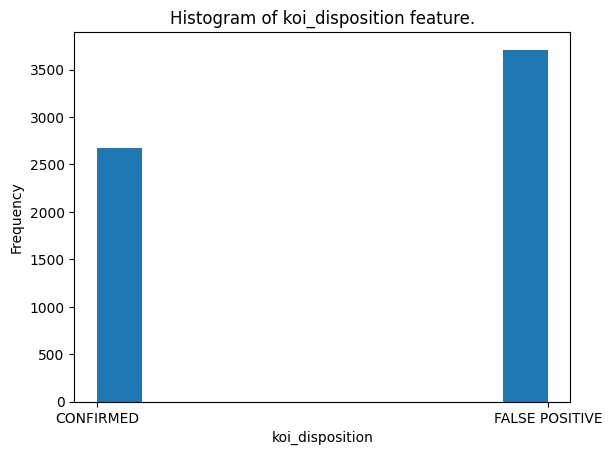

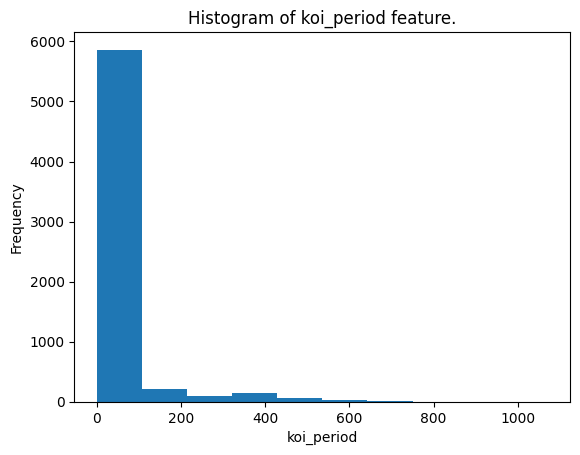

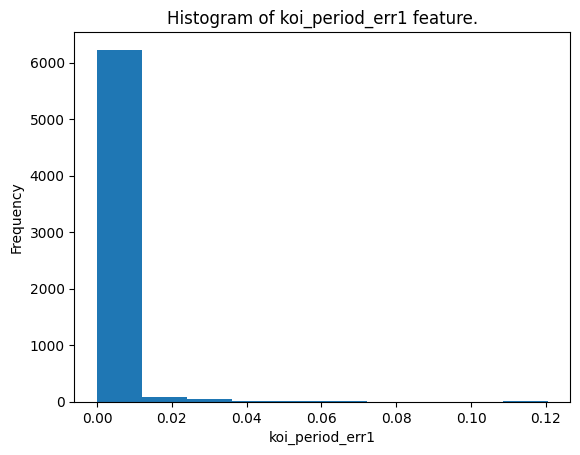

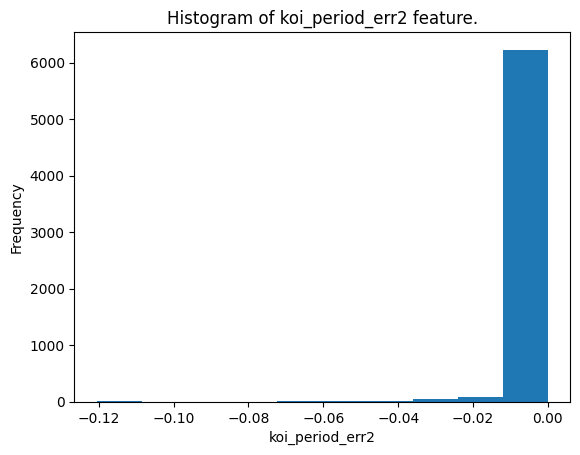

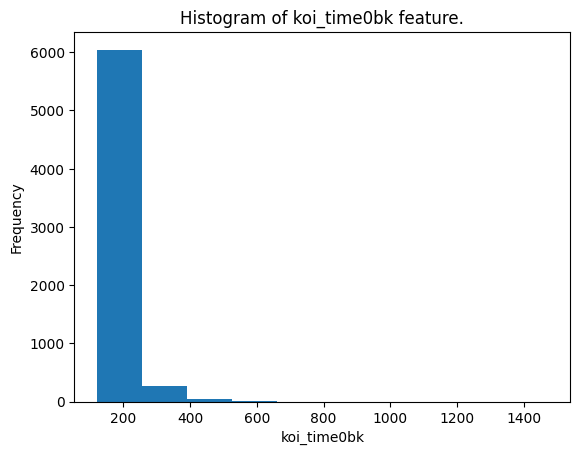

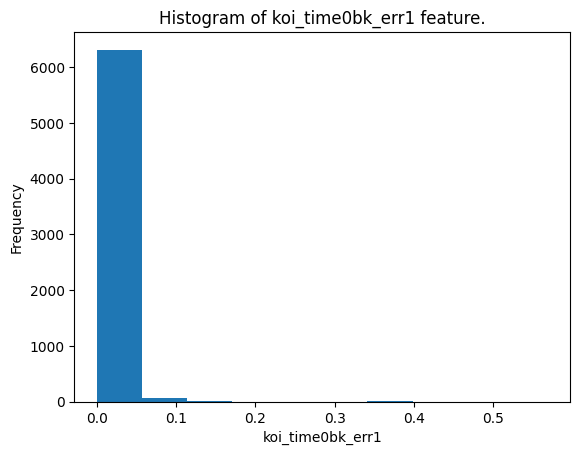

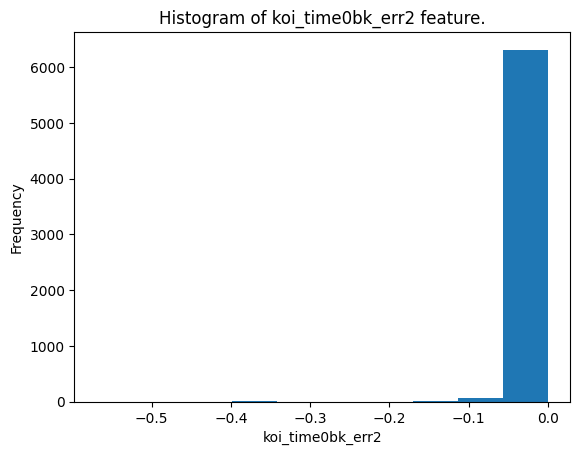

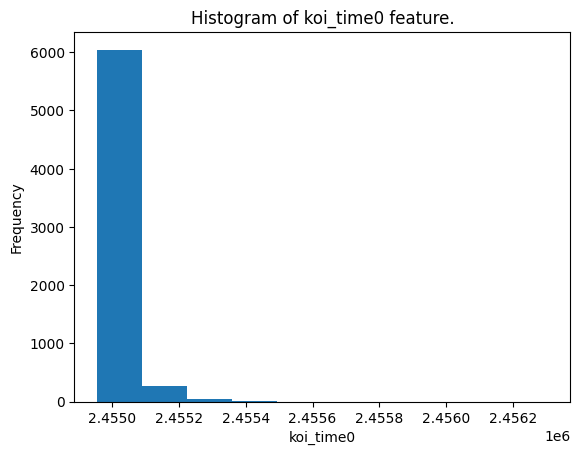

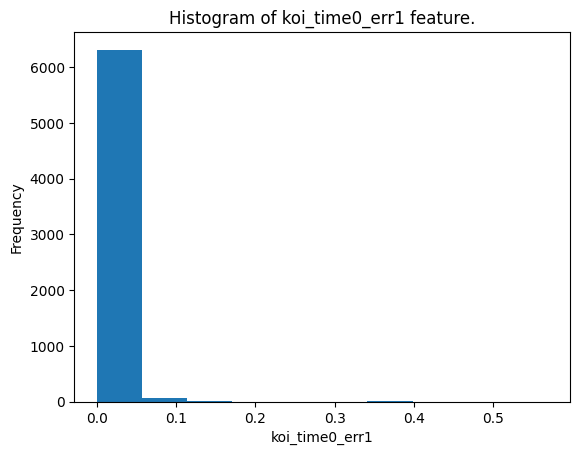

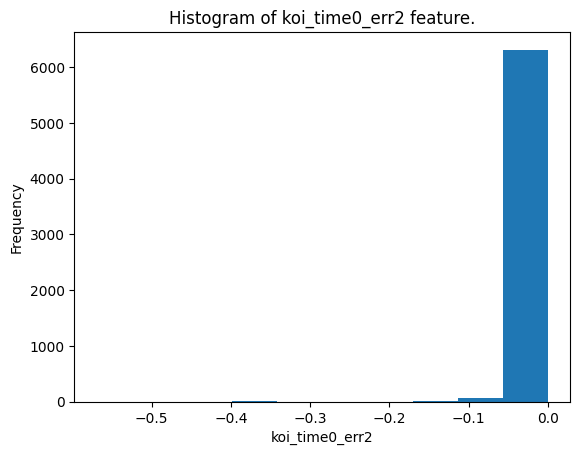

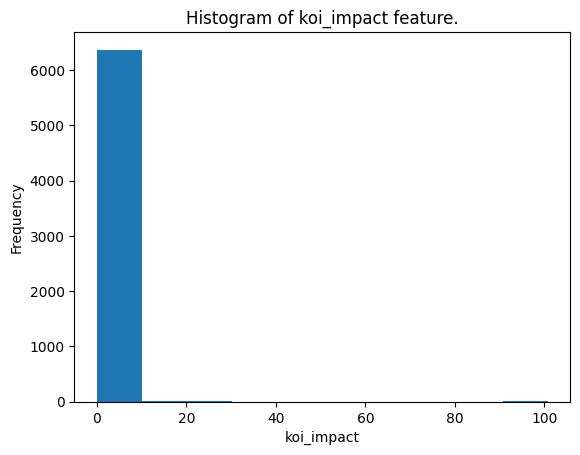

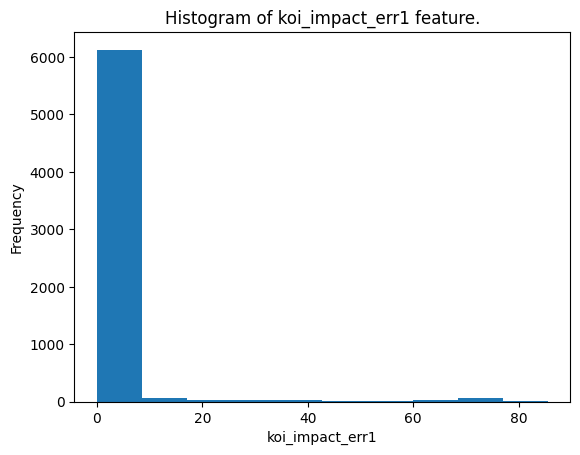

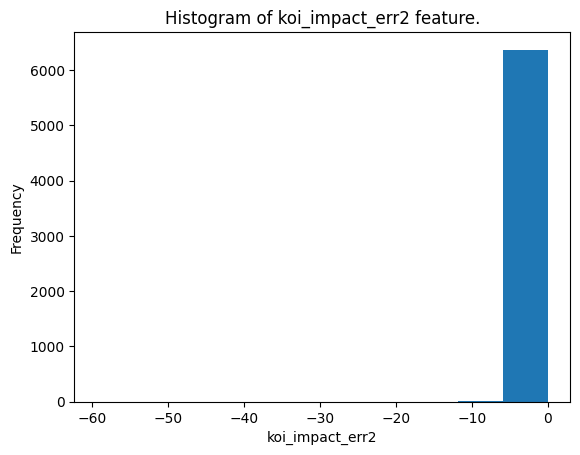

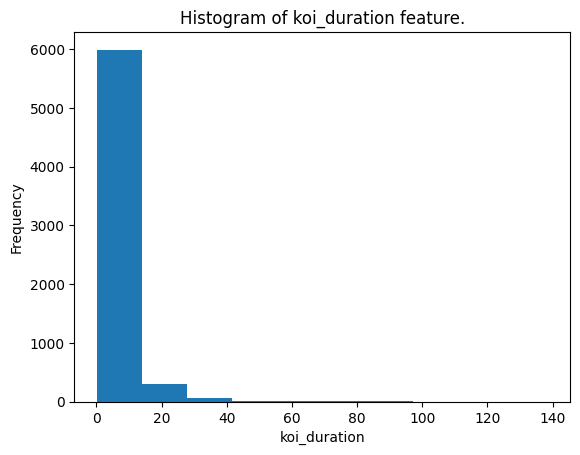

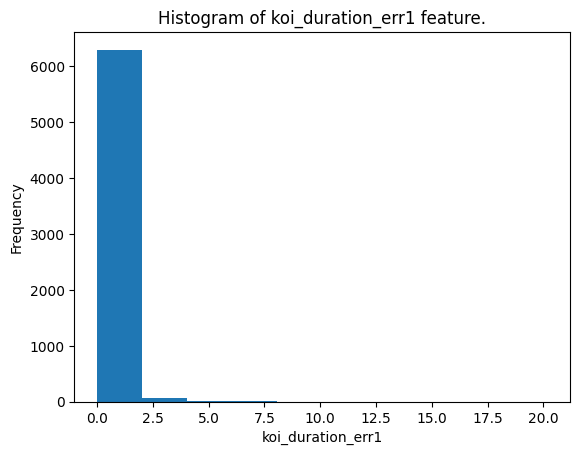

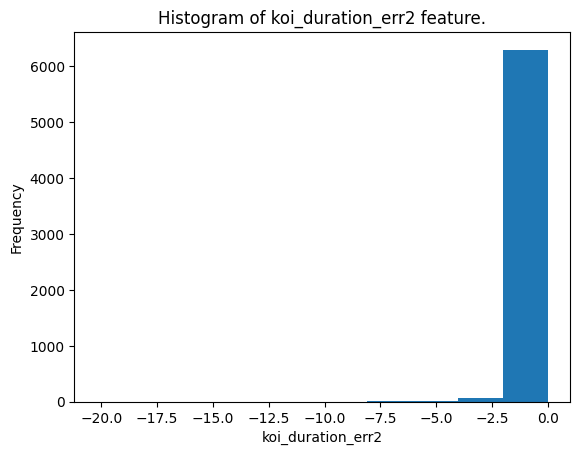

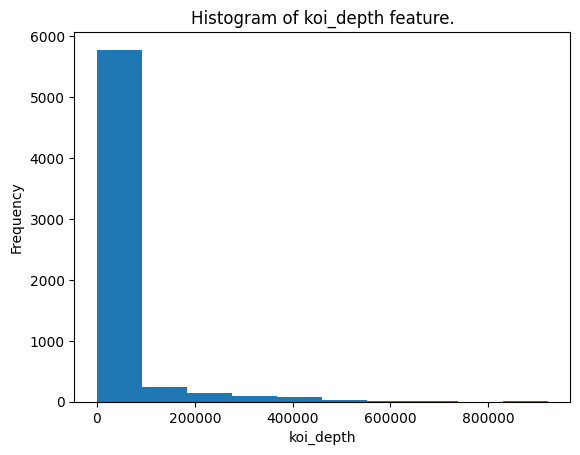

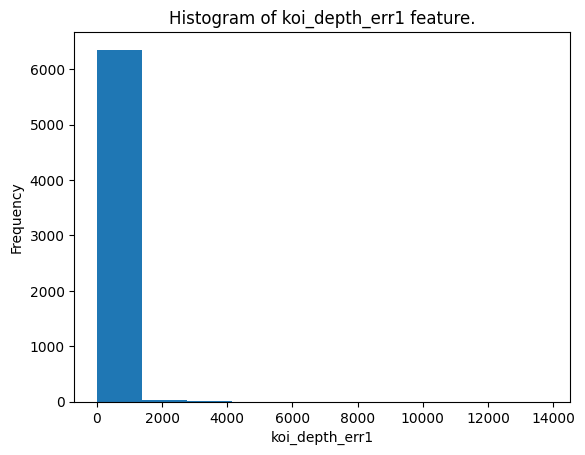

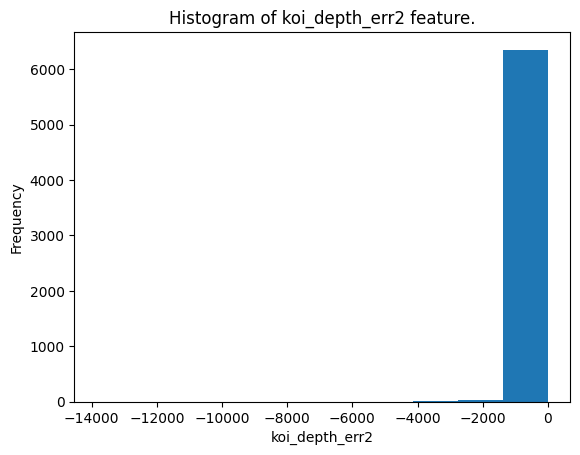

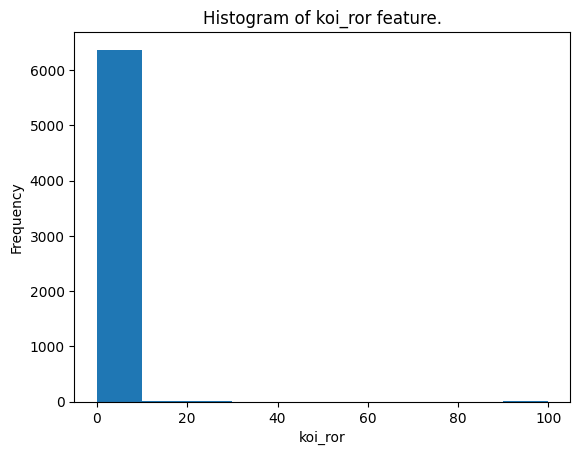

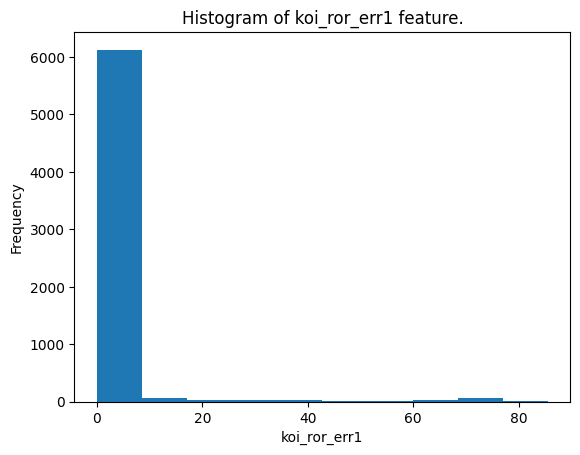

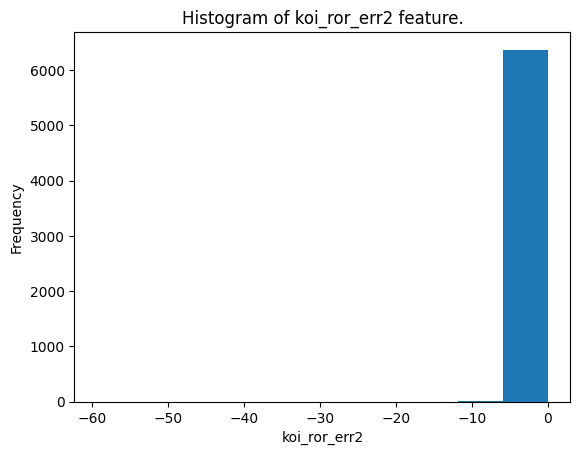

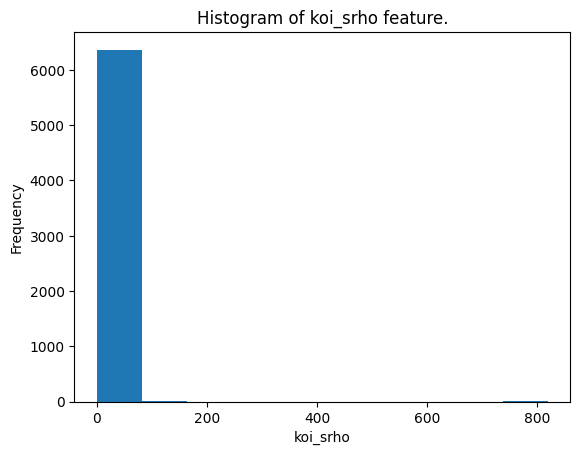

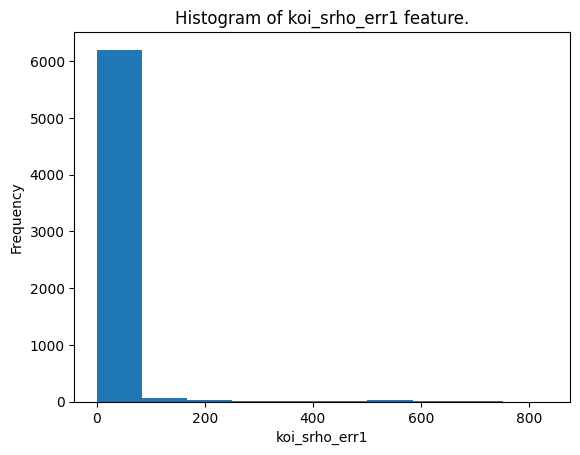

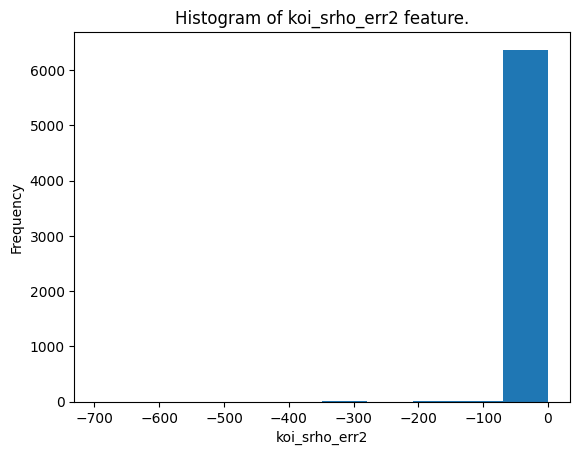

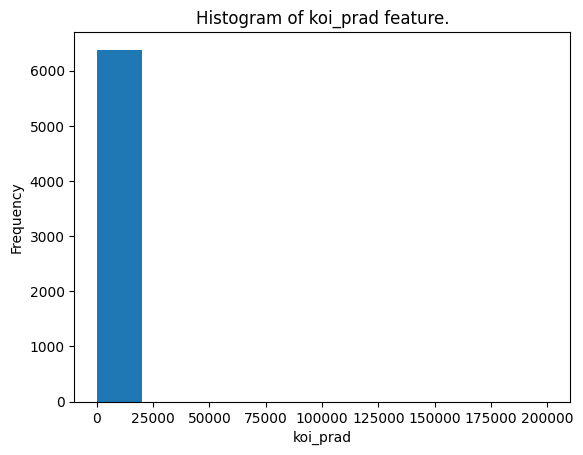

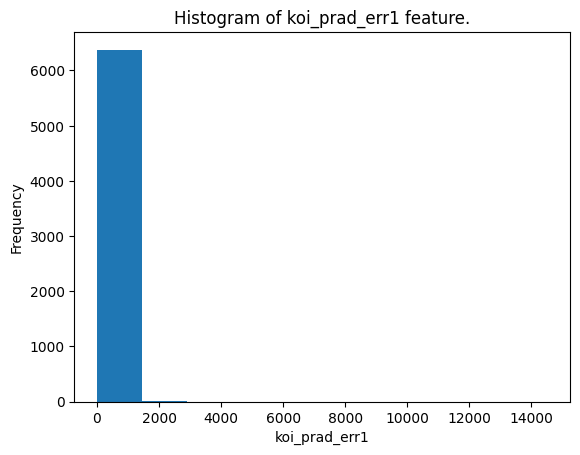

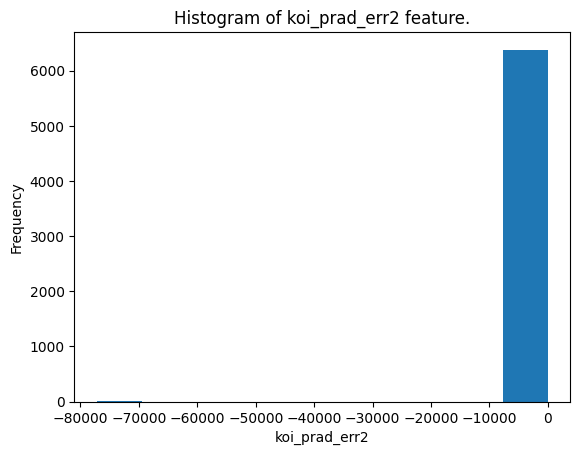

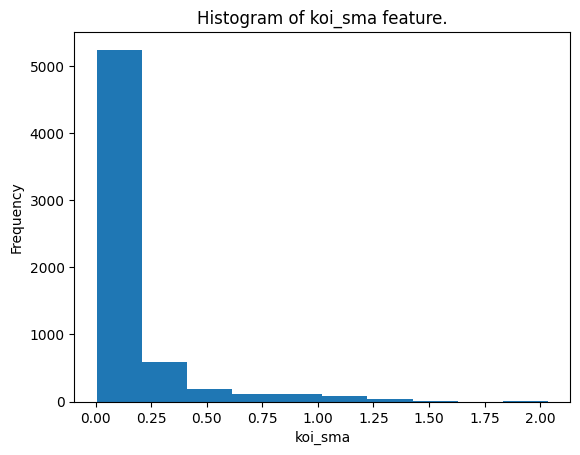

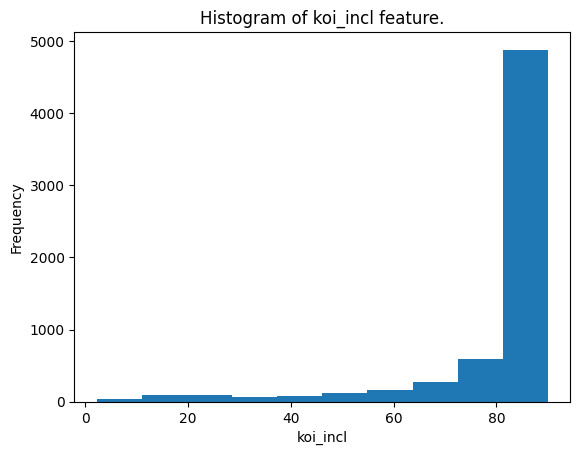

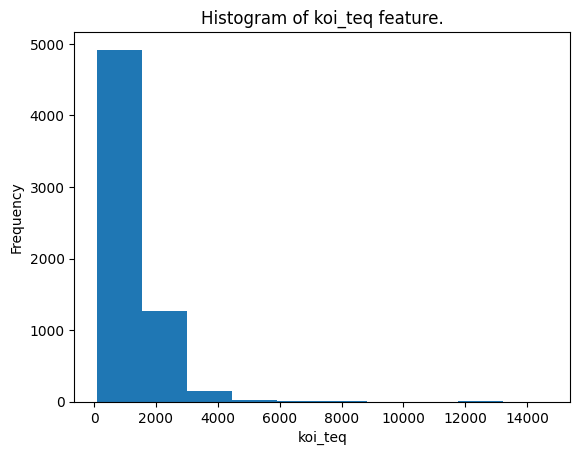

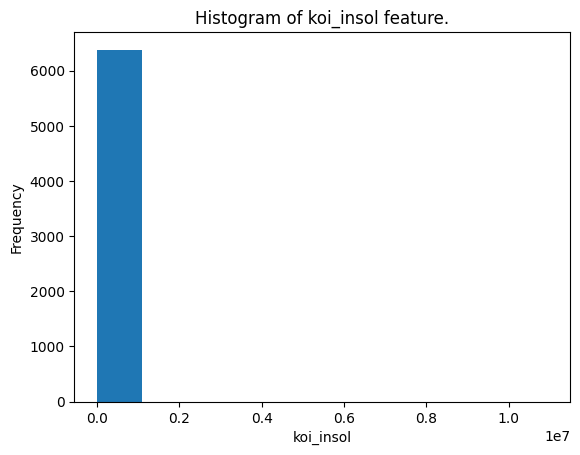

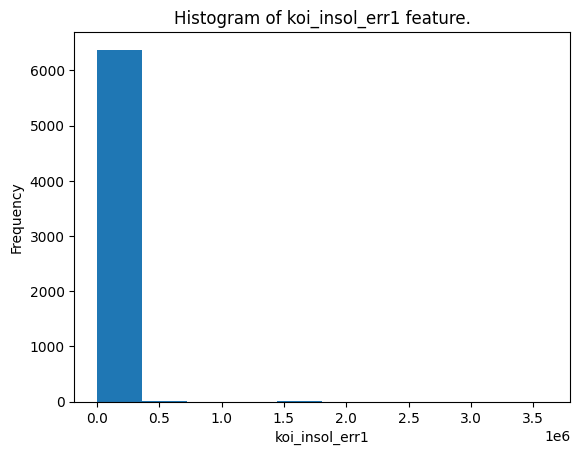

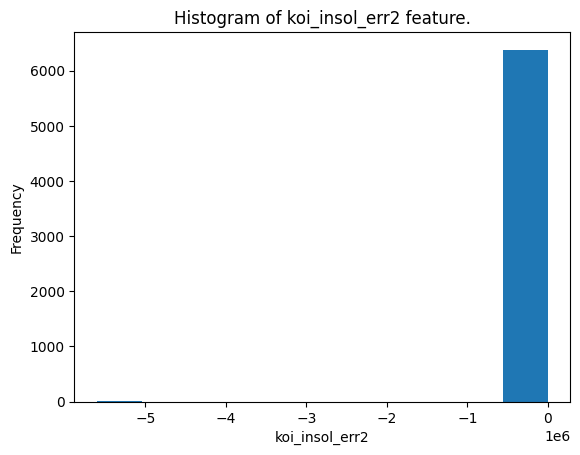

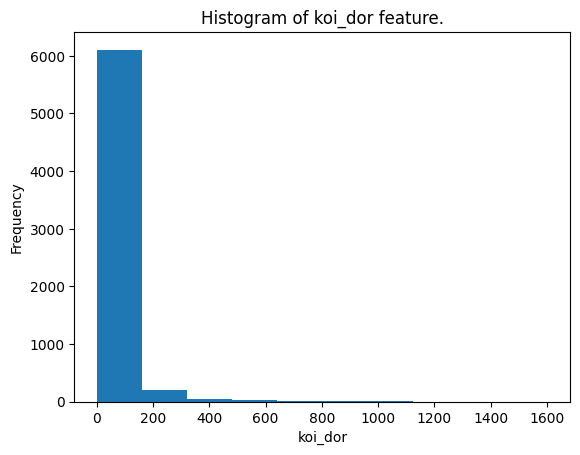

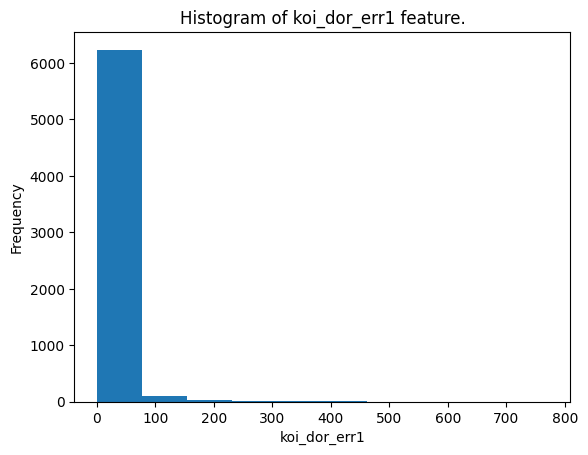

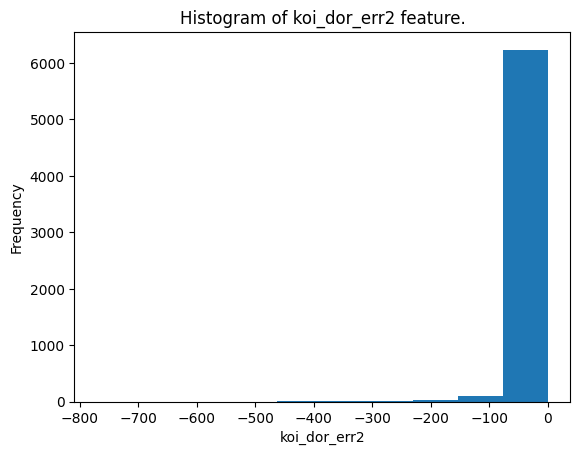

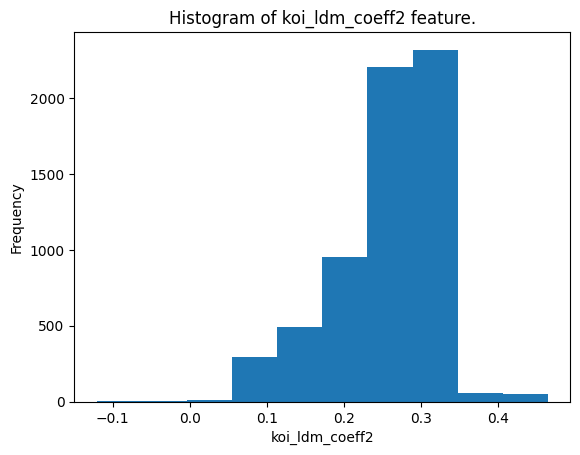

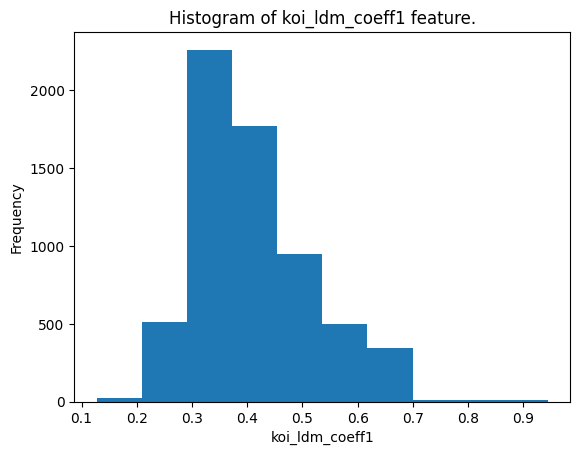

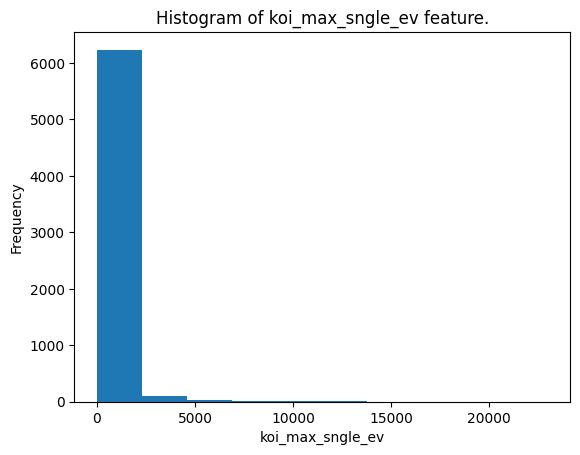

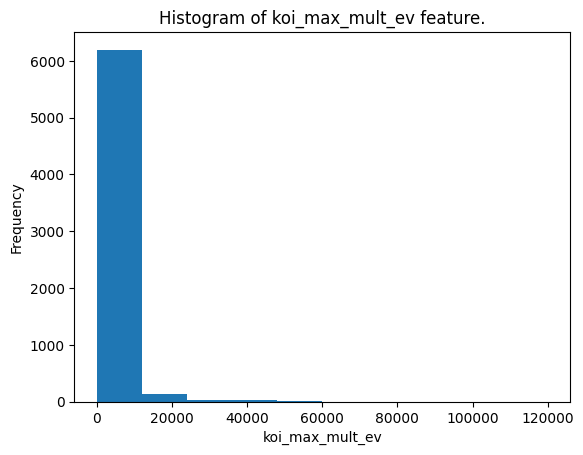

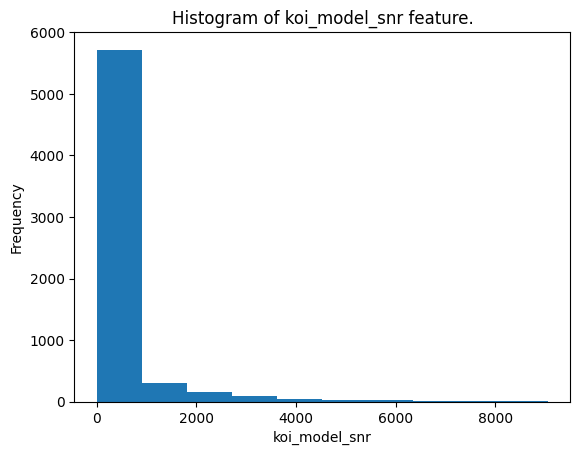

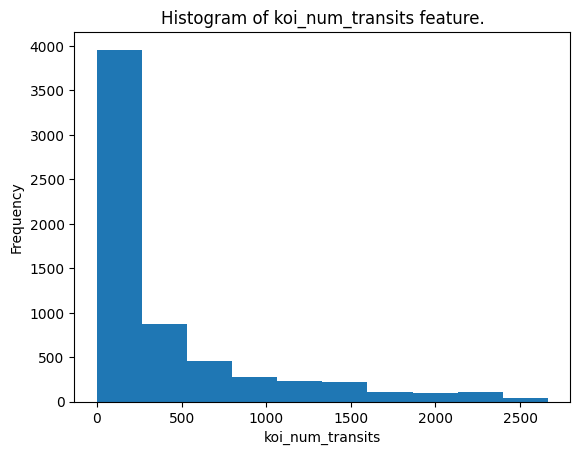

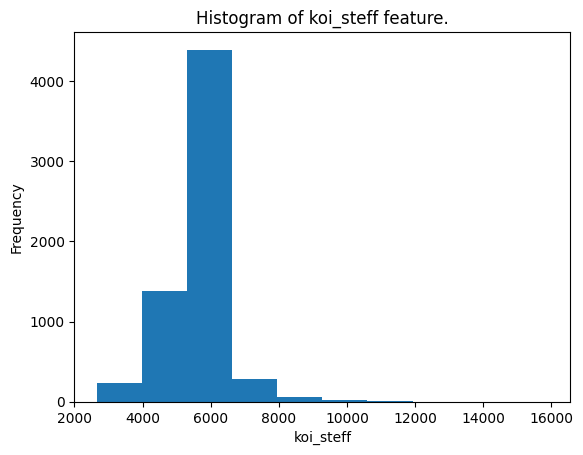

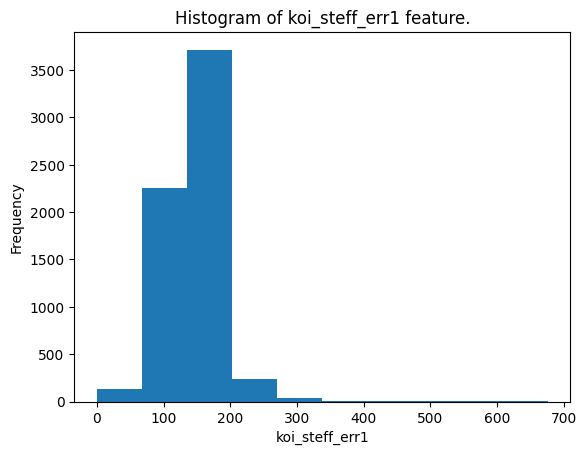

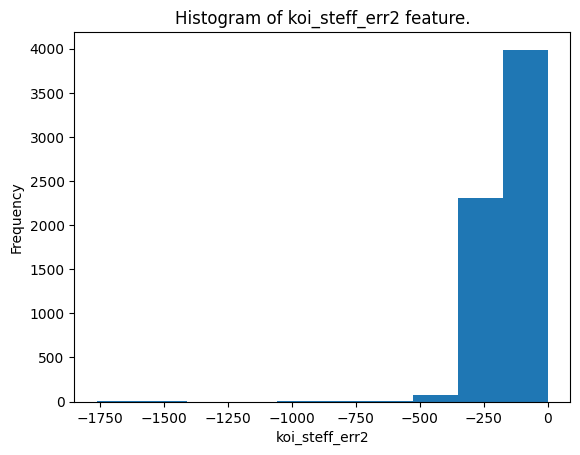

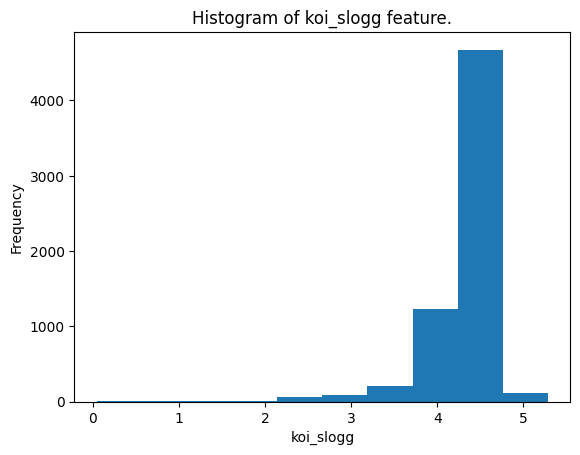

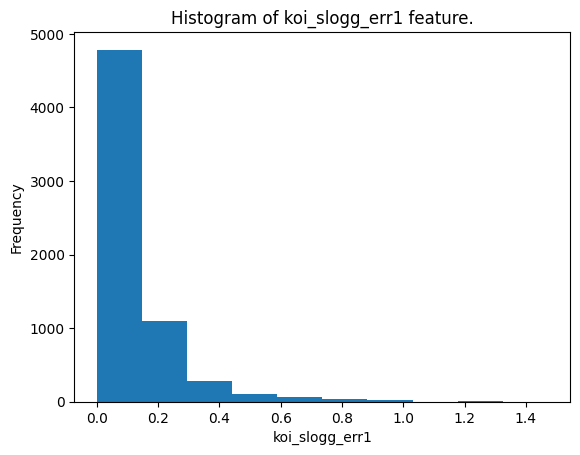

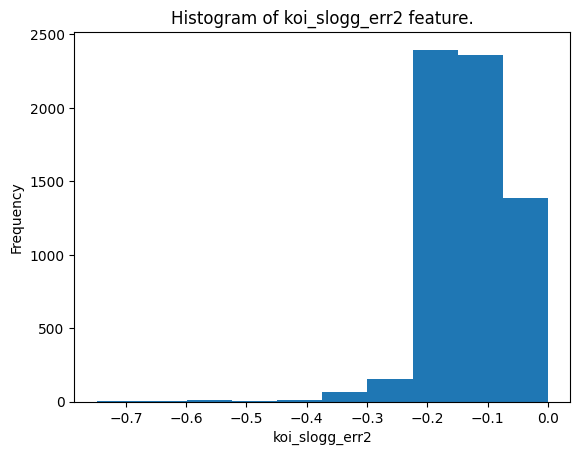

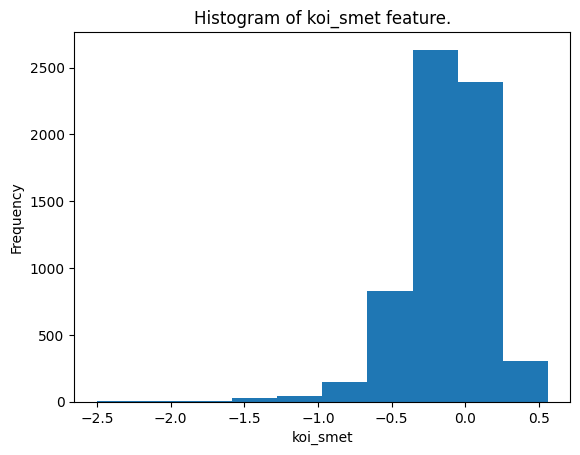

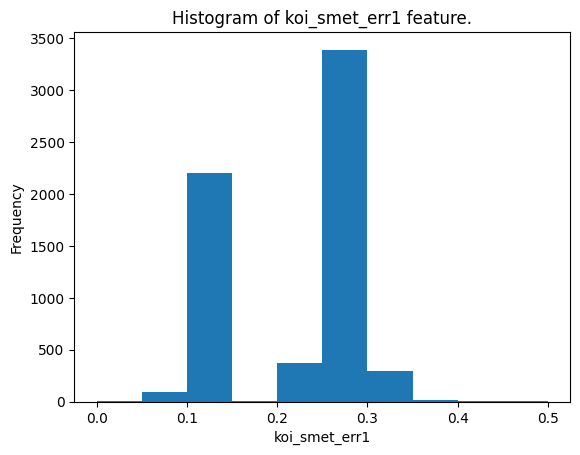

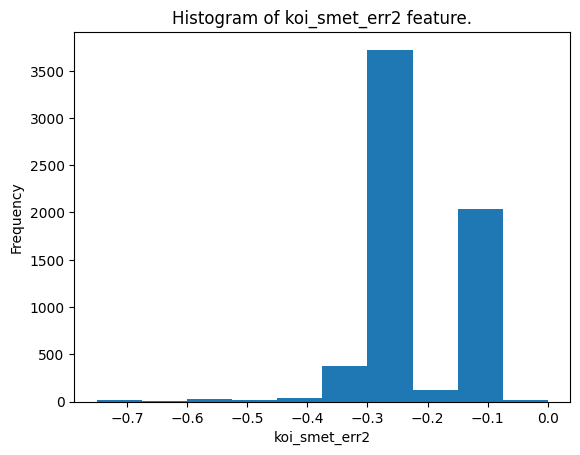

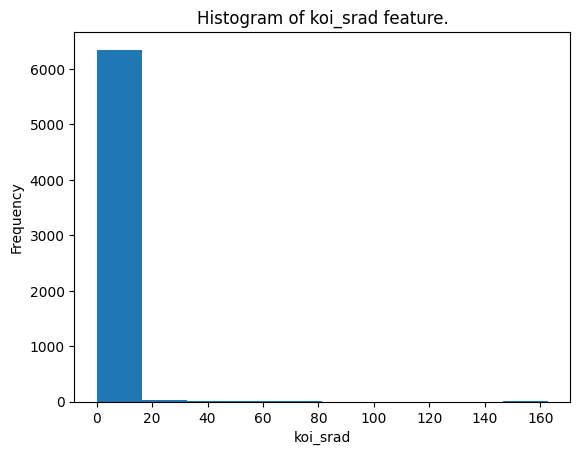

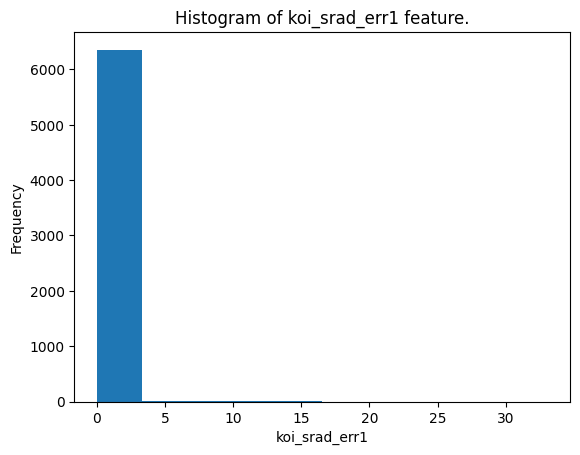

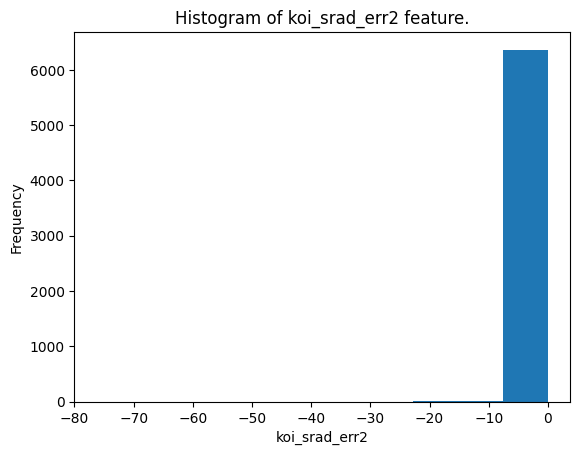

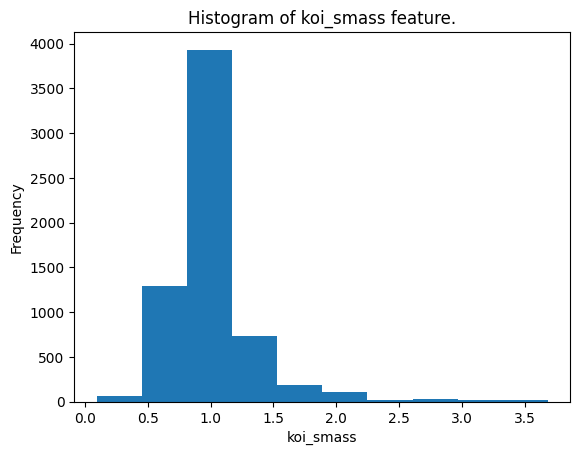

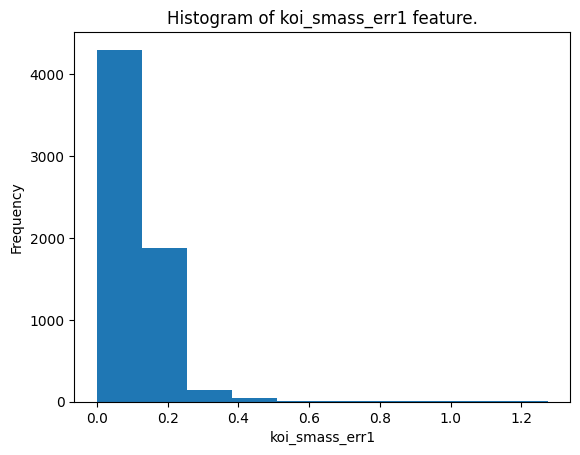

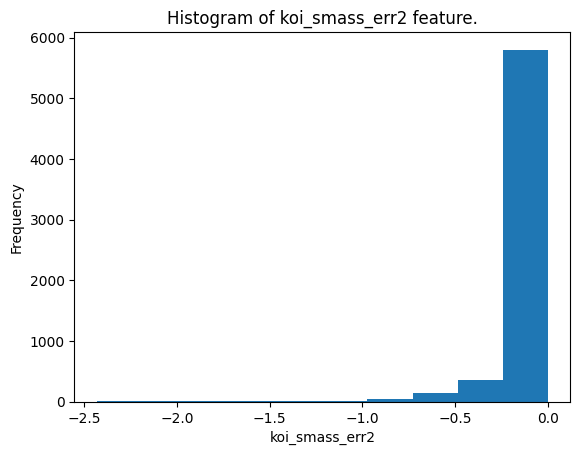

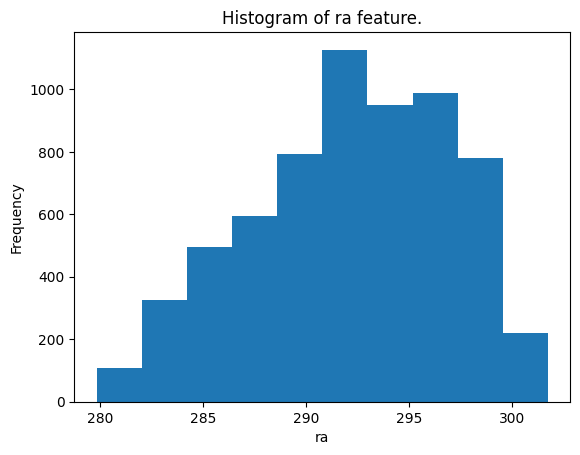

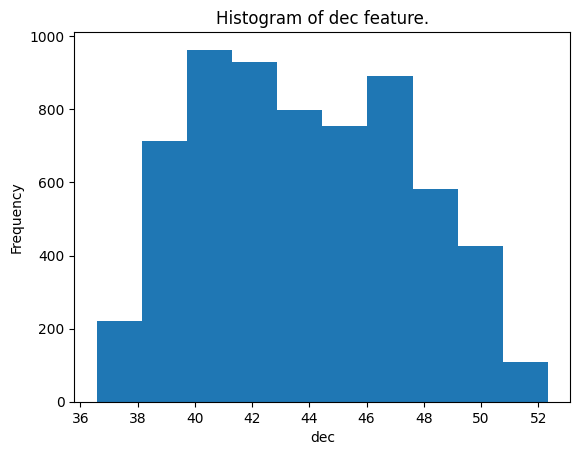

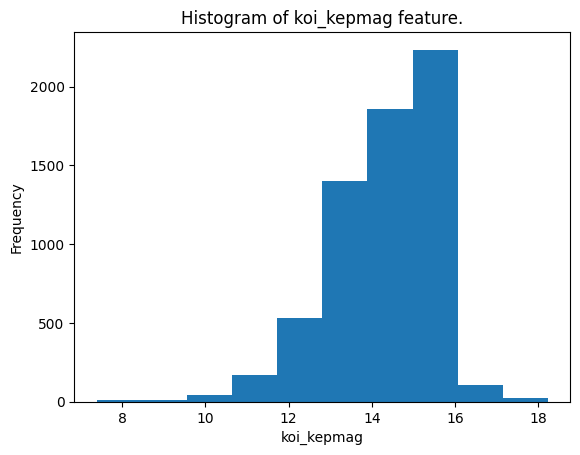

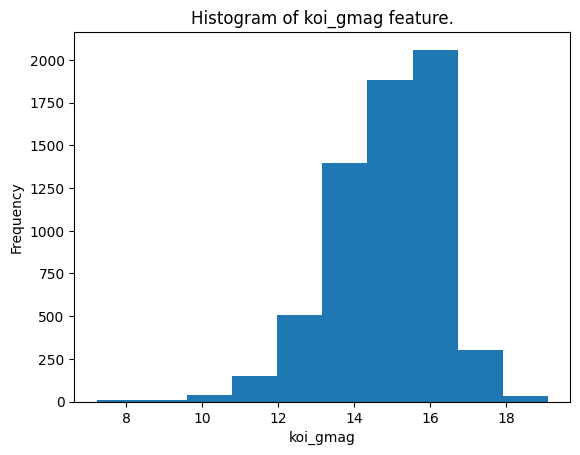

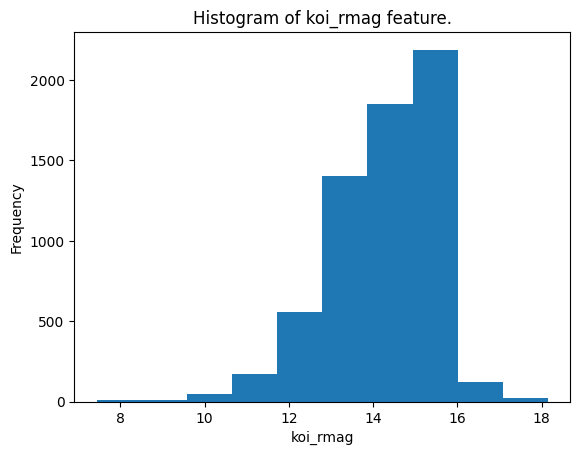

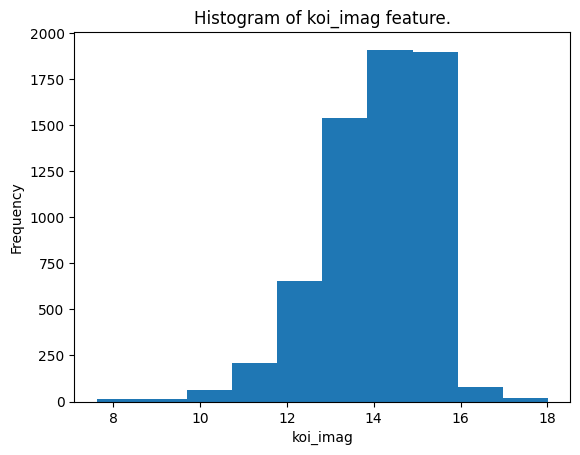

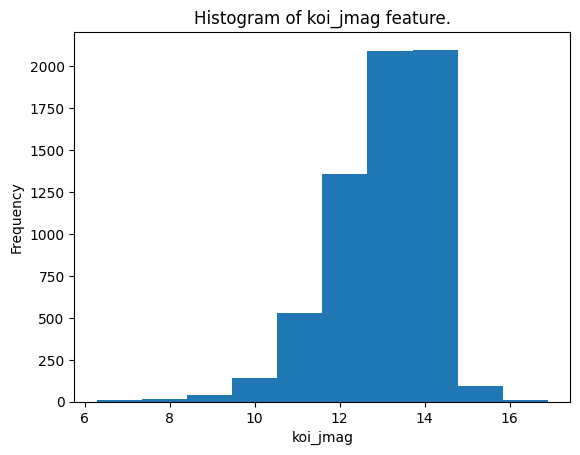

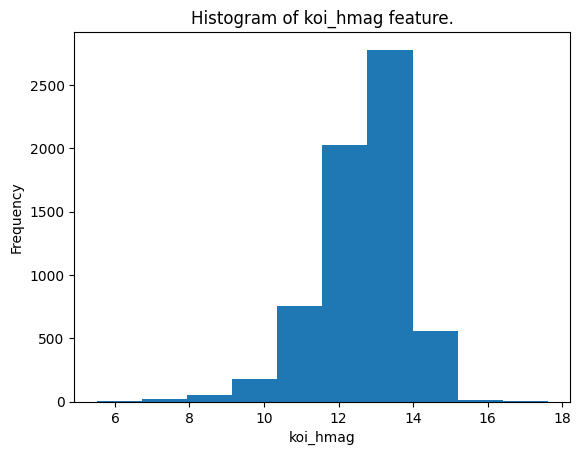

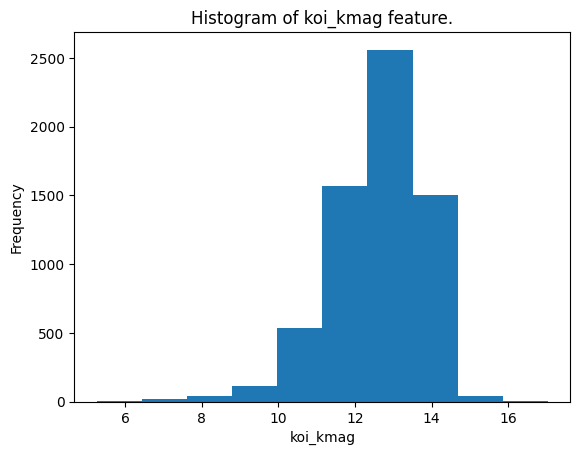

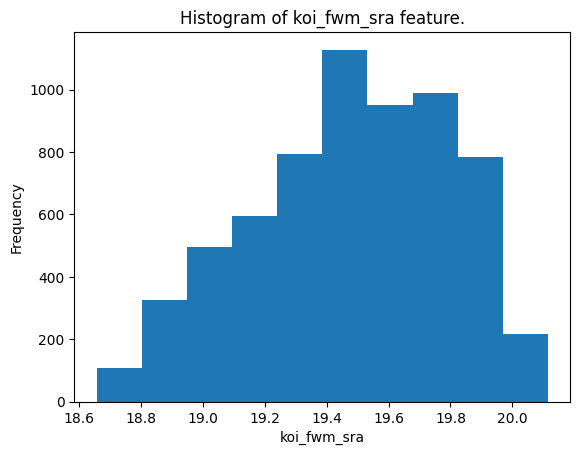

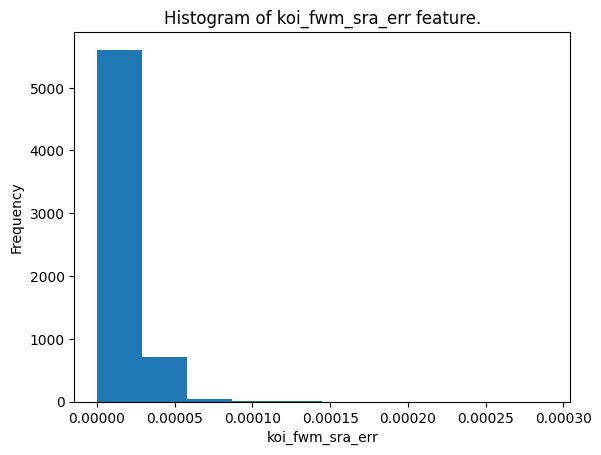

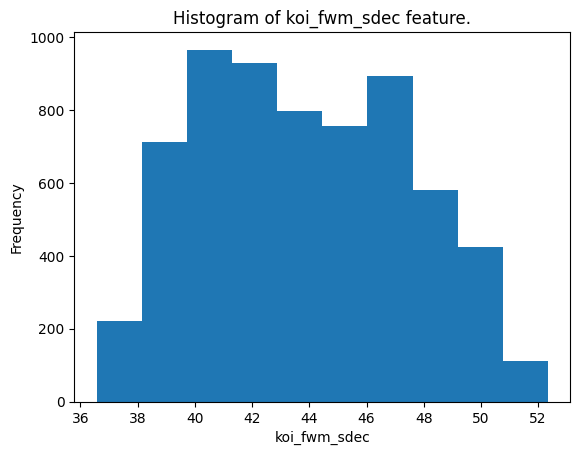

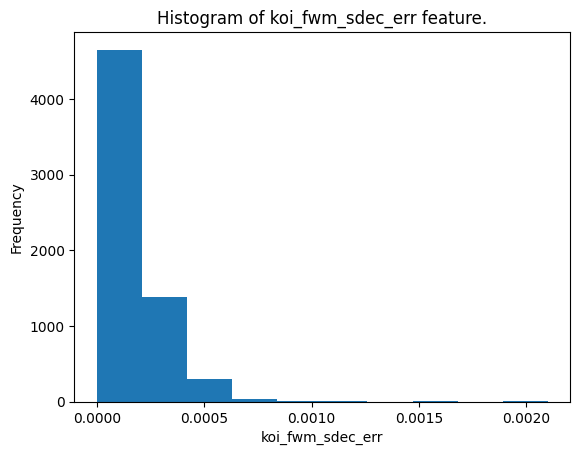

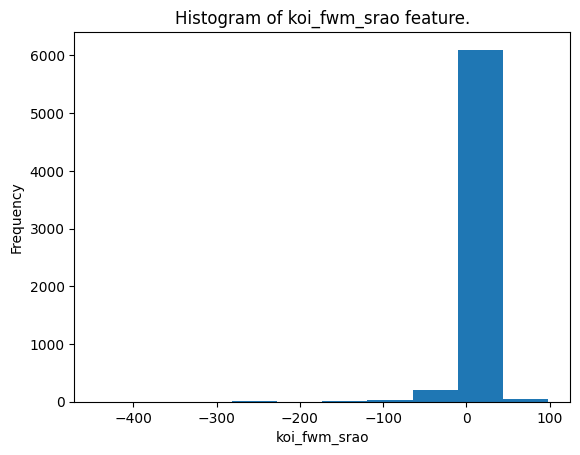

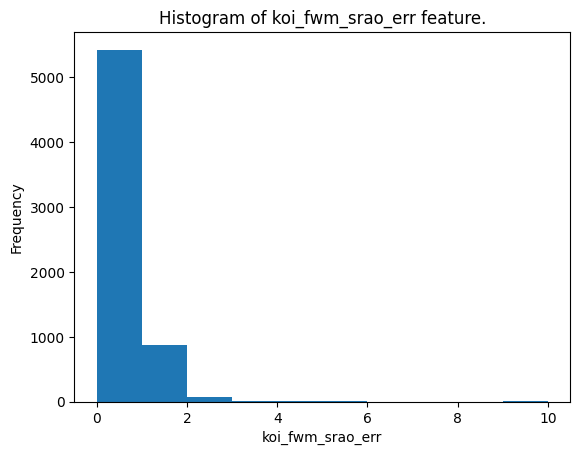

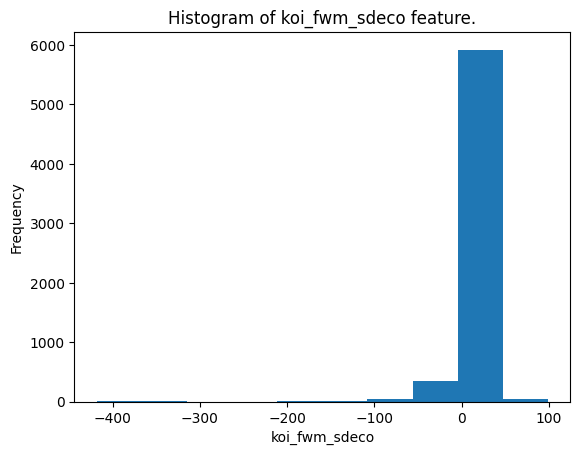

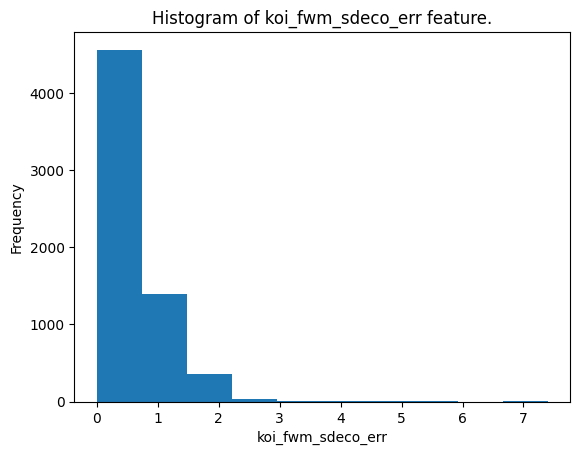

In [18]:
for feature in df_final:
  if feature != 'rowid' and feature != 'kepid':
    plt.hist(df_final[feature])
    plt.title(f'Histogram of {feature} feature.')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

The target feature is clearly imbalanced and will require some sort of treatment later on. Most features show a greater frequency in a certain bin and barely perceptible frequencies on other bins, these will probably require some transformation later on too.

### 3.2. Feature vs Target Analysis

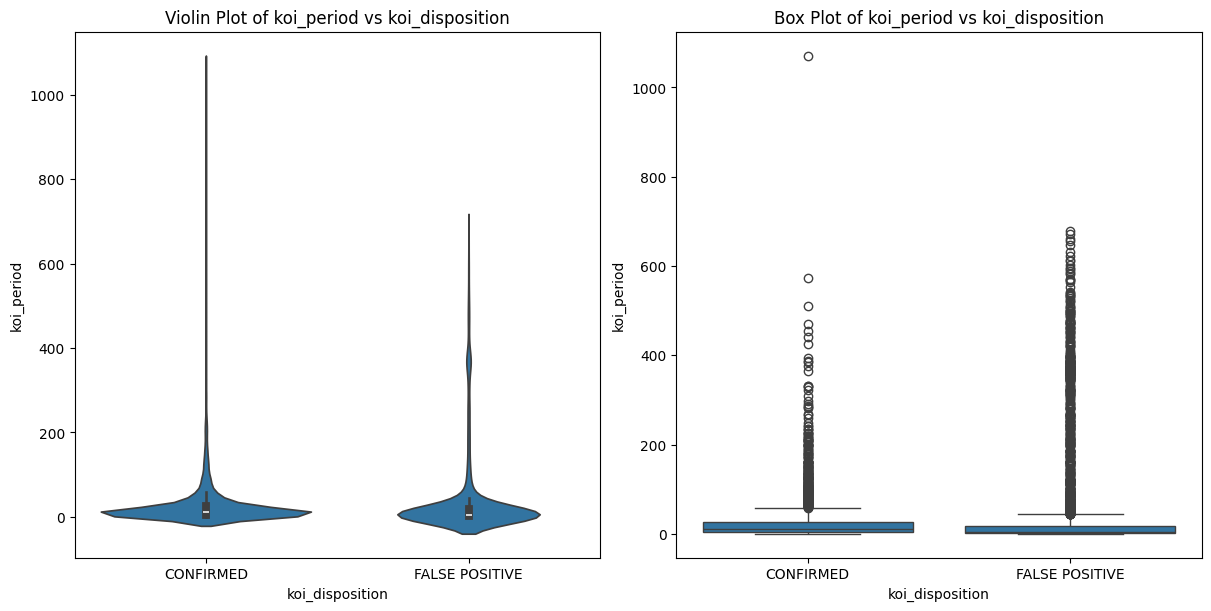

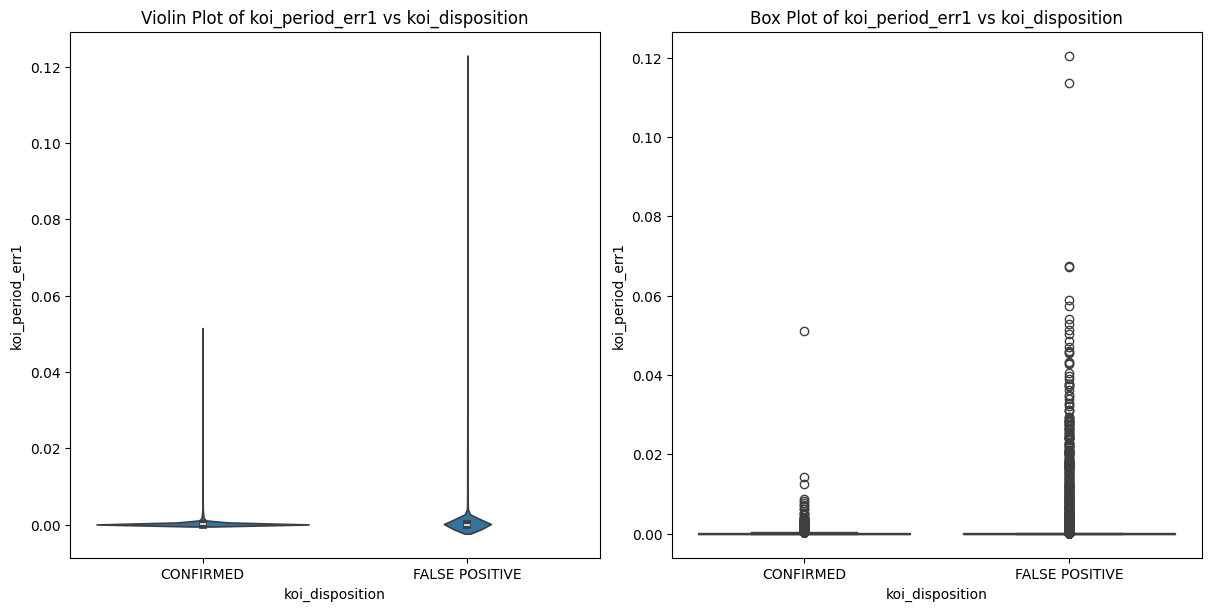

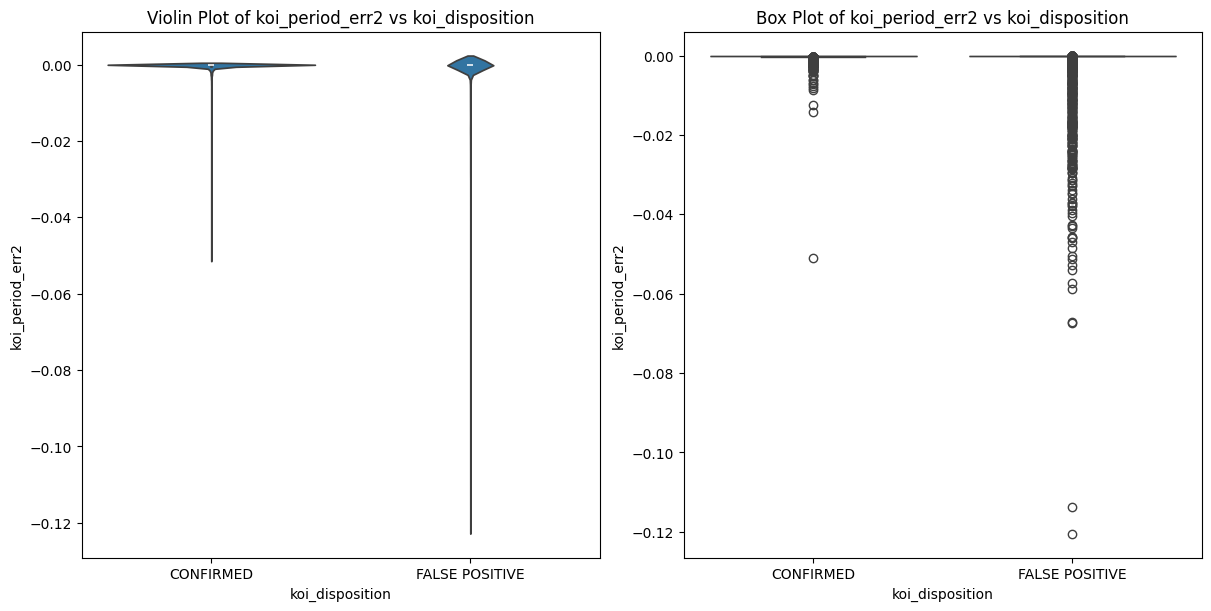

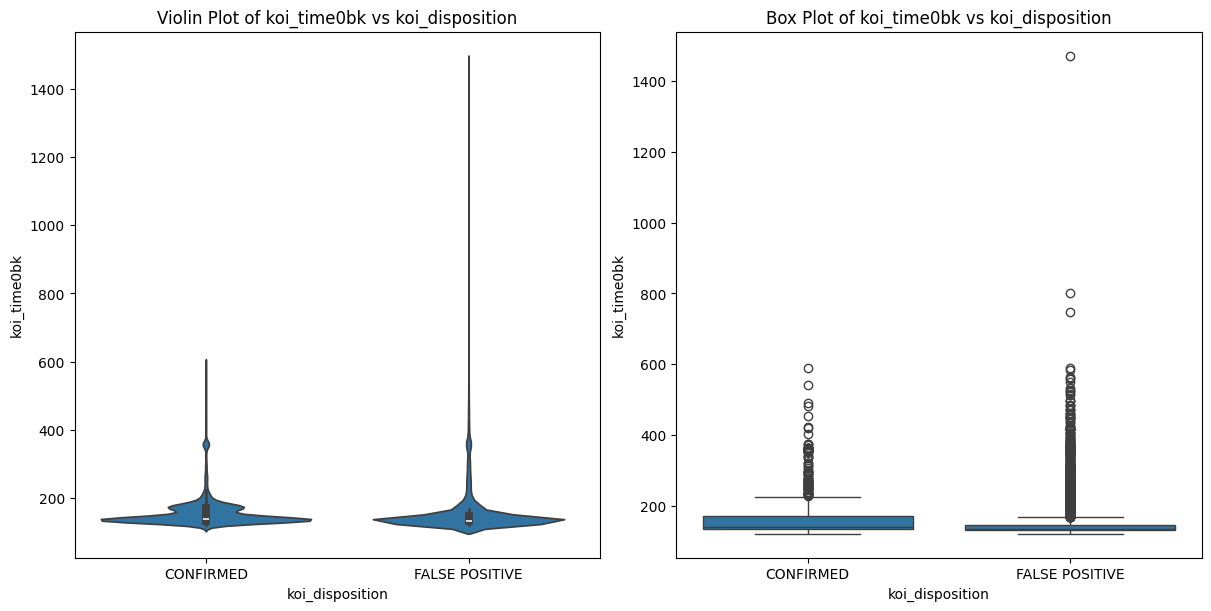

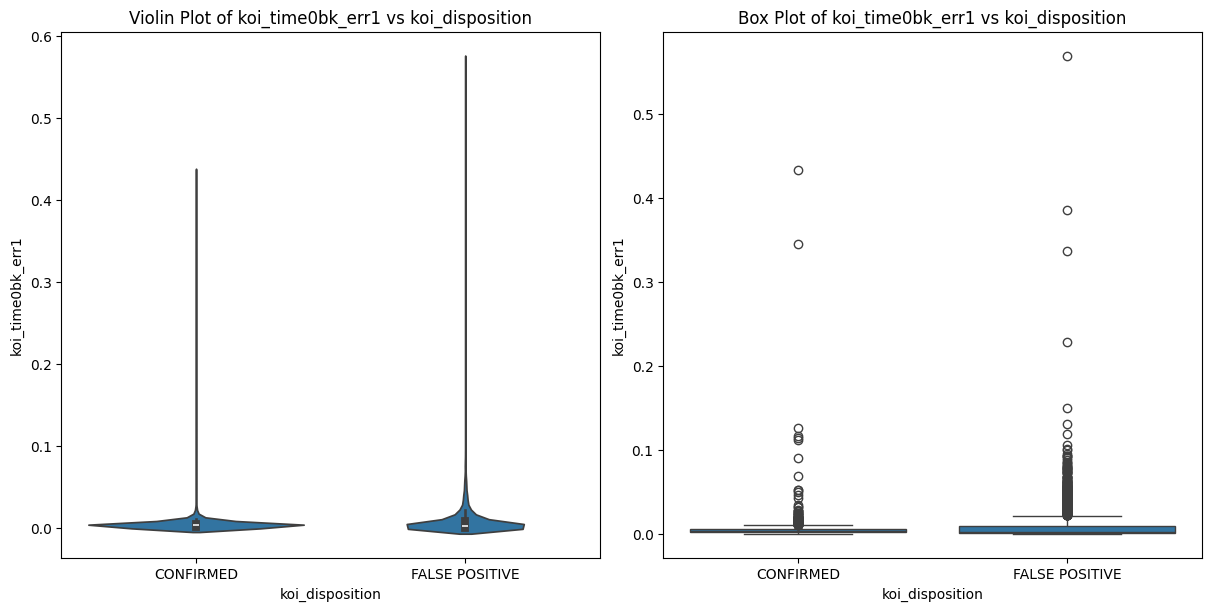

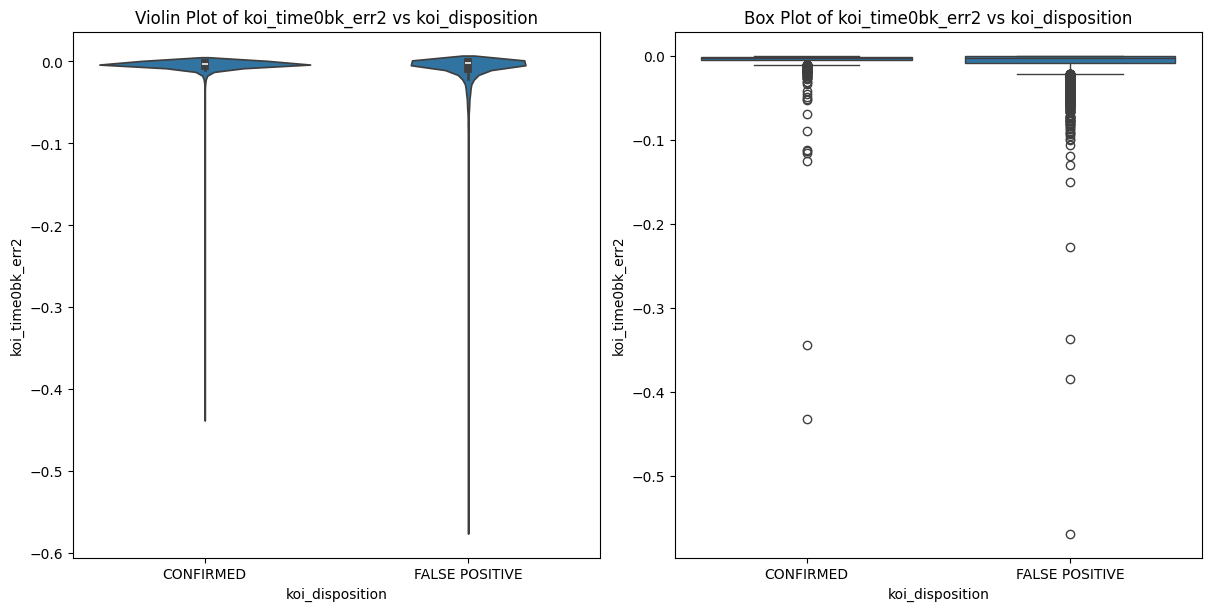

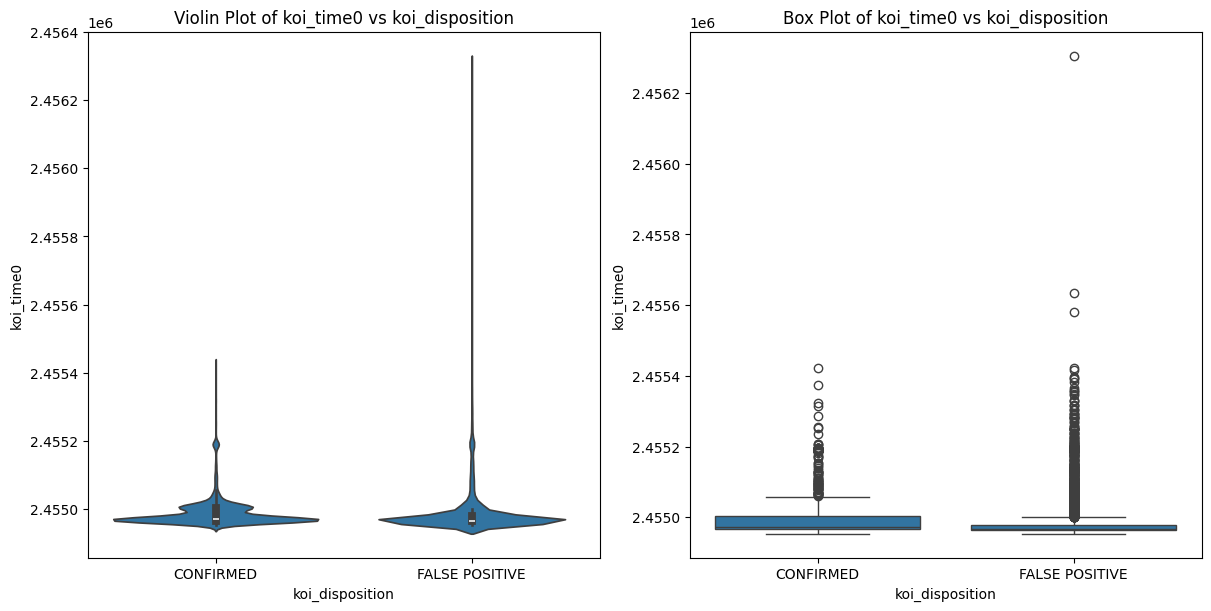

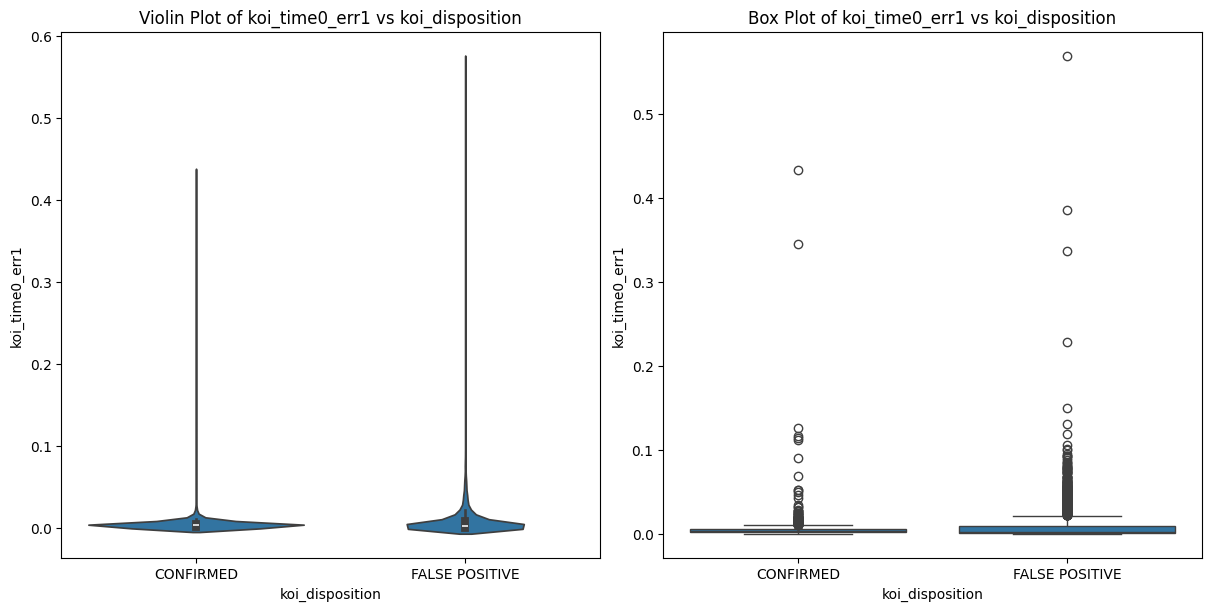

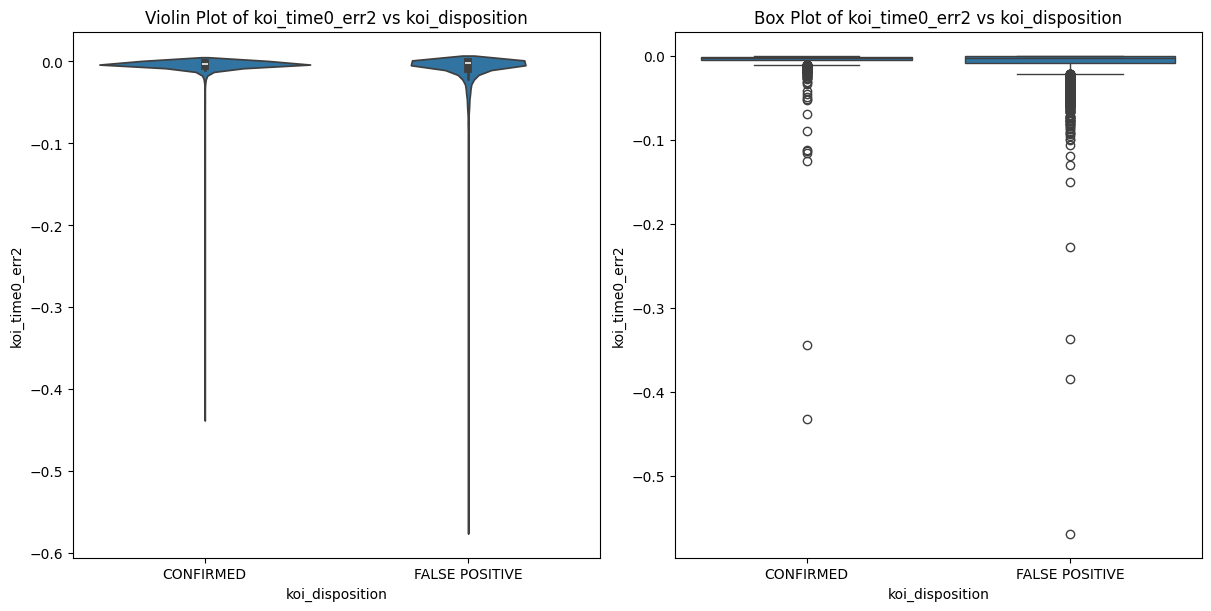

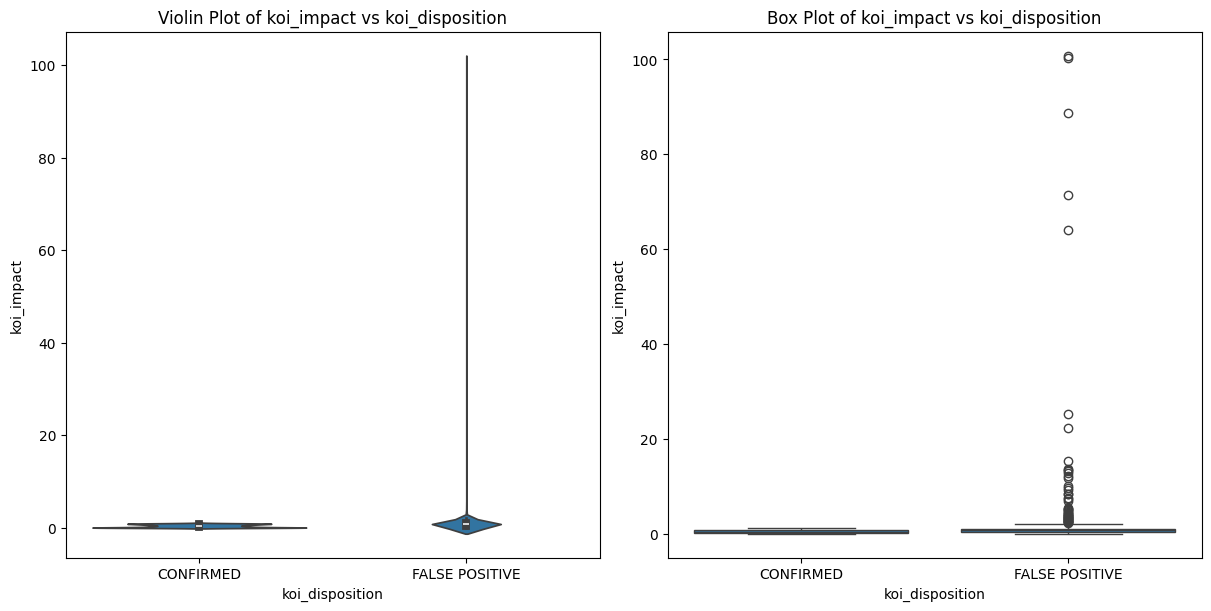

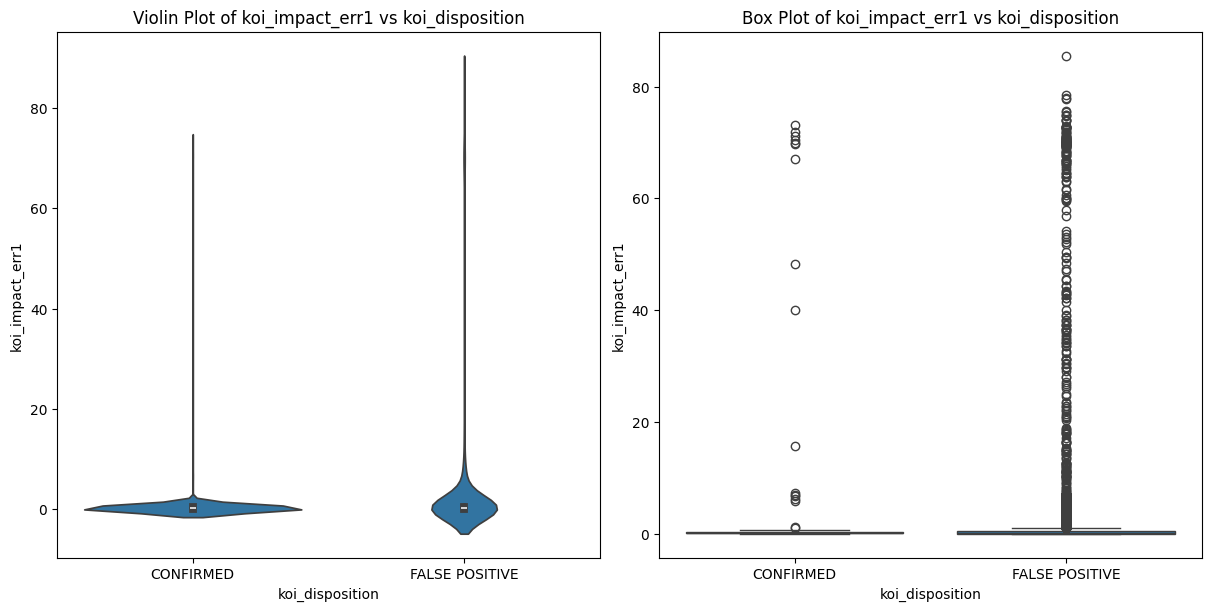

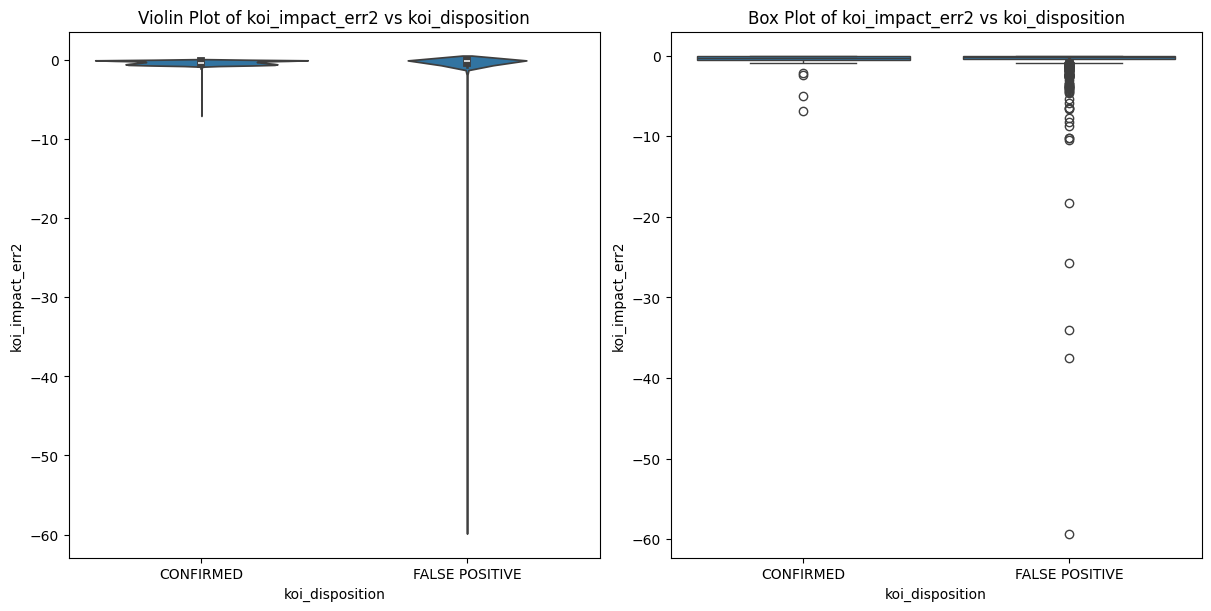

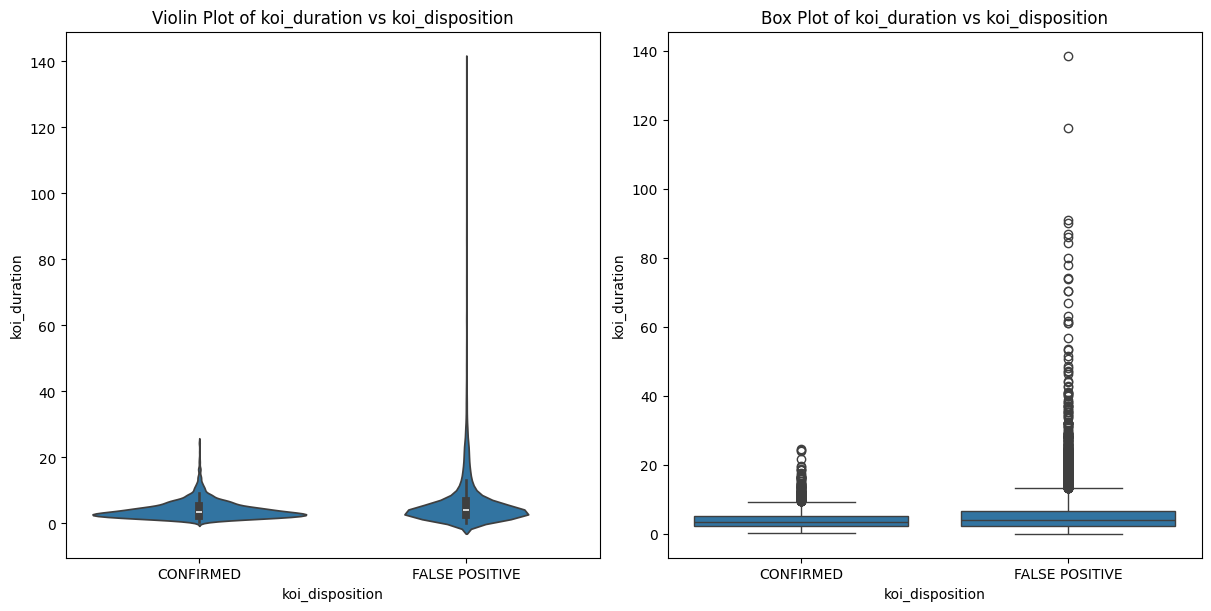

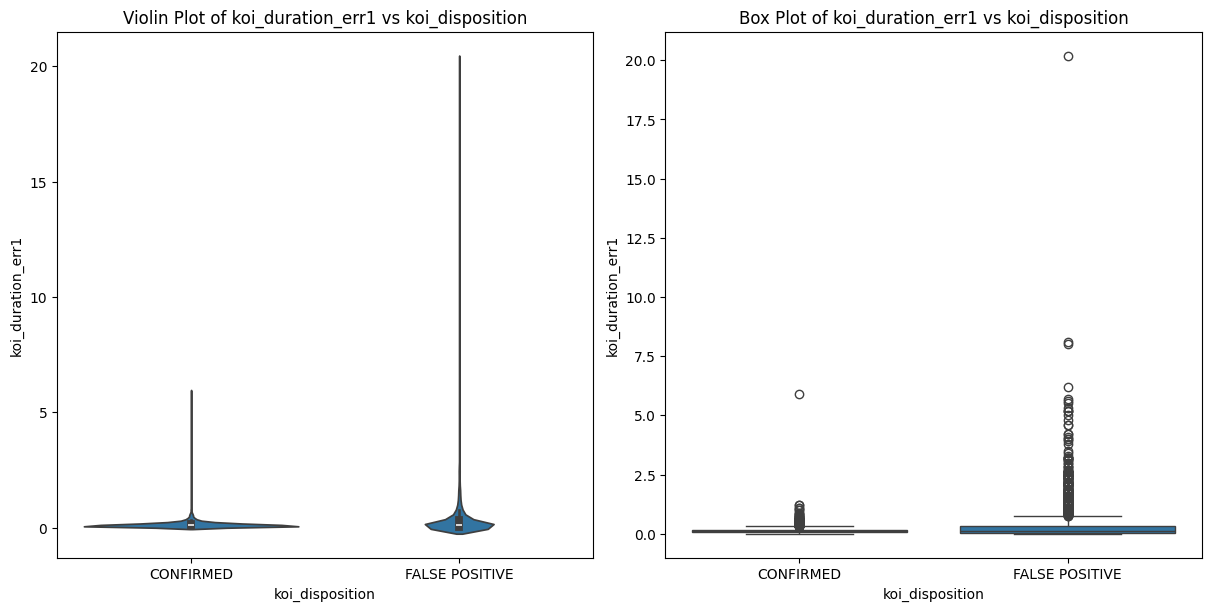

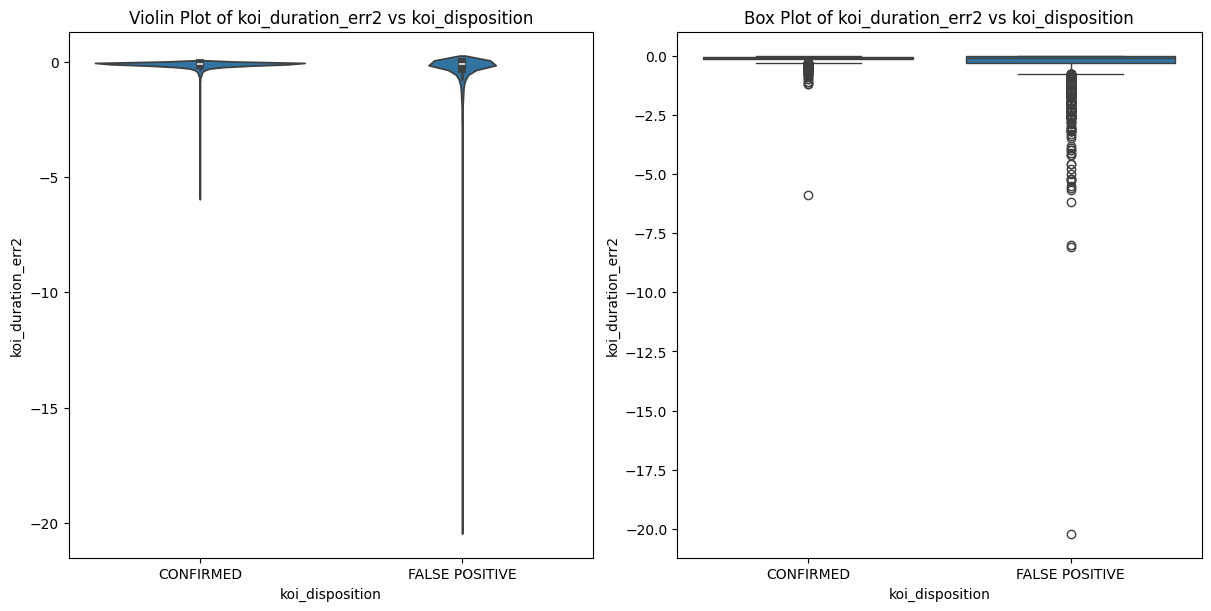

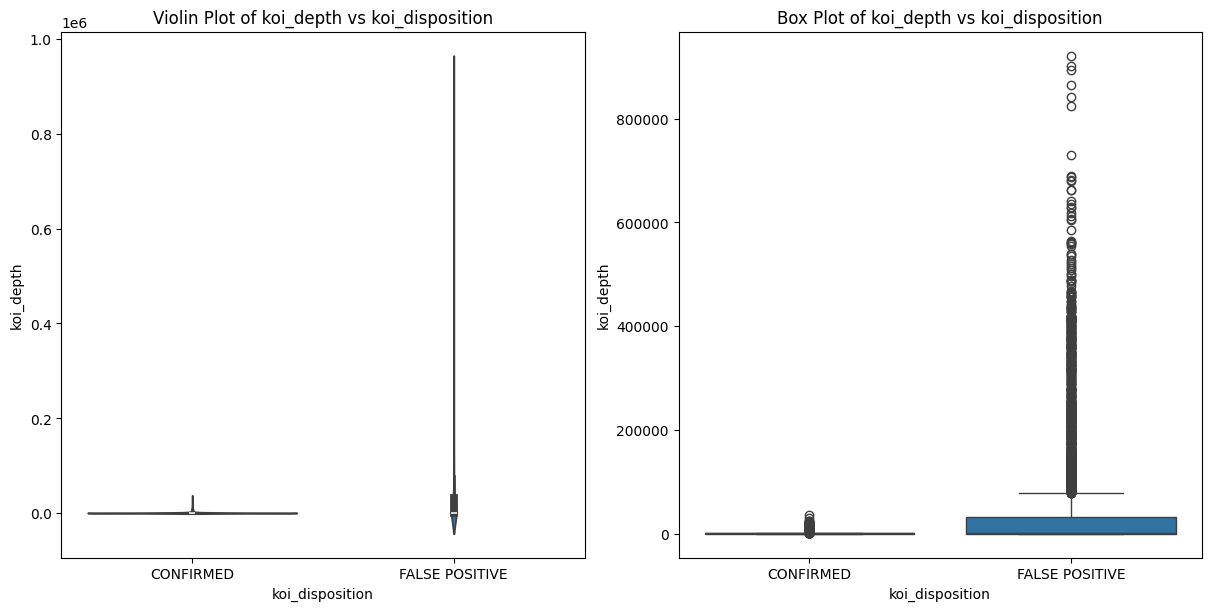

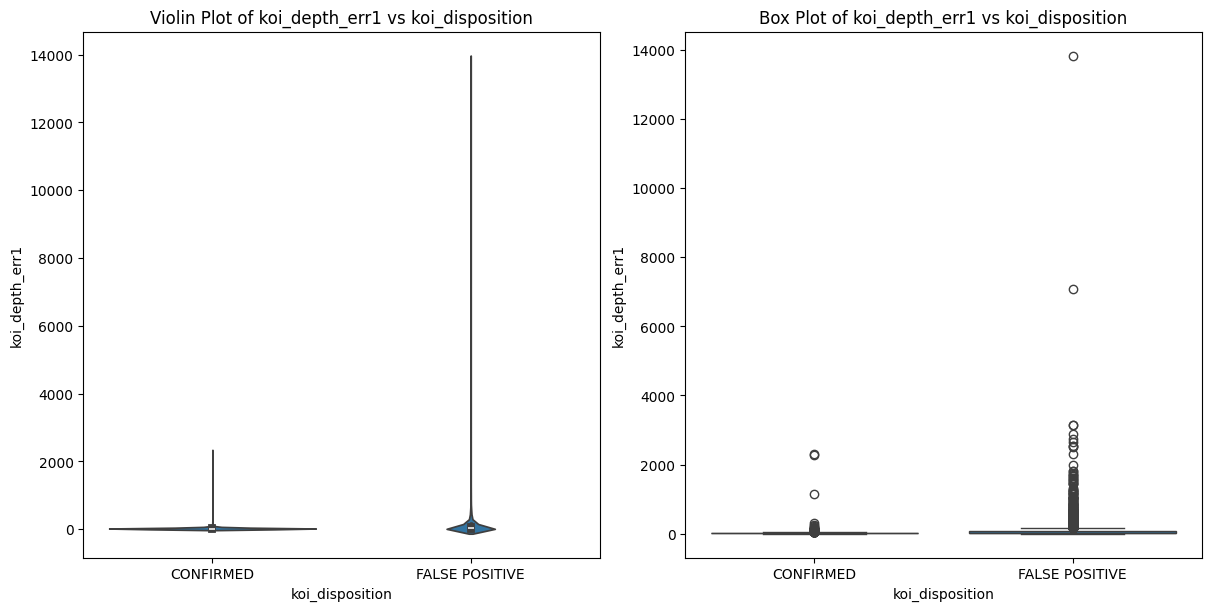

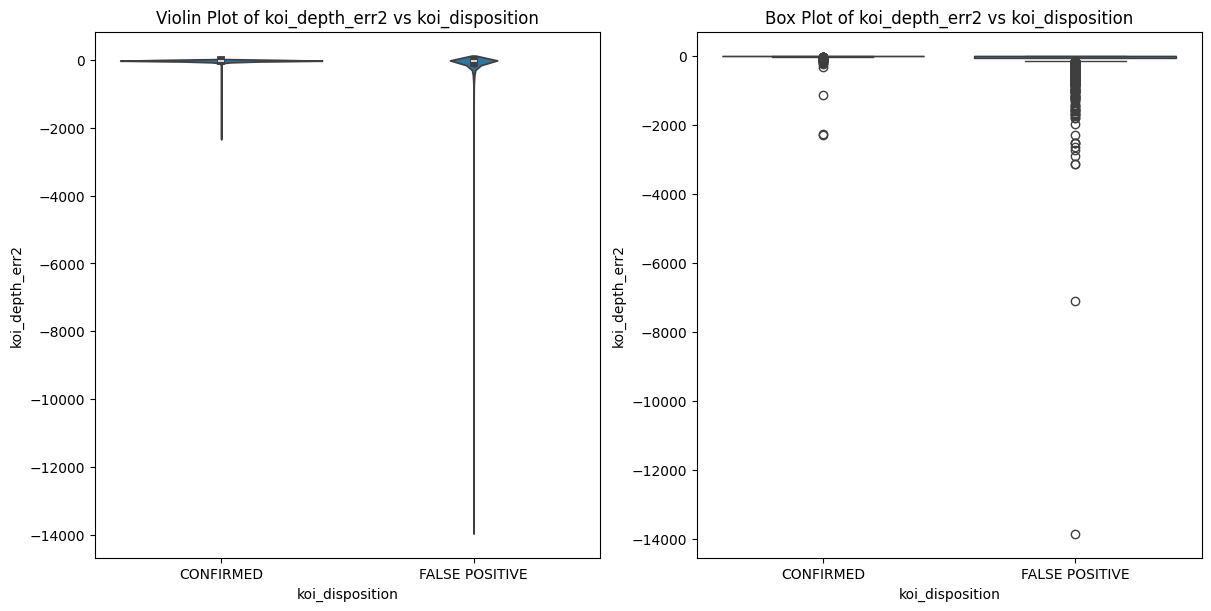

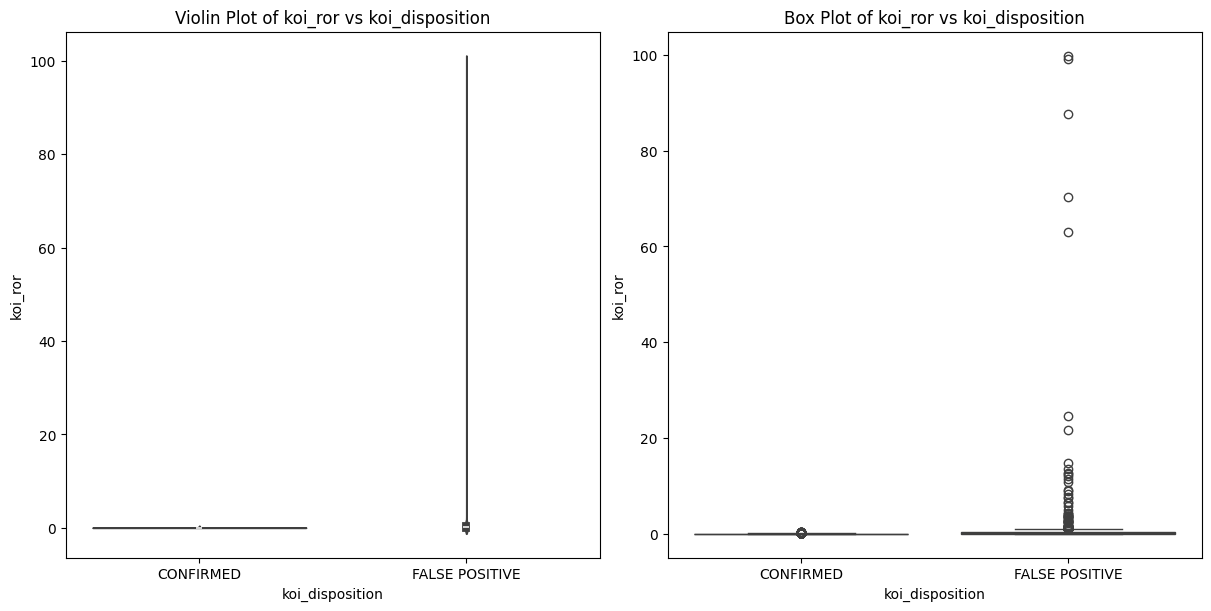

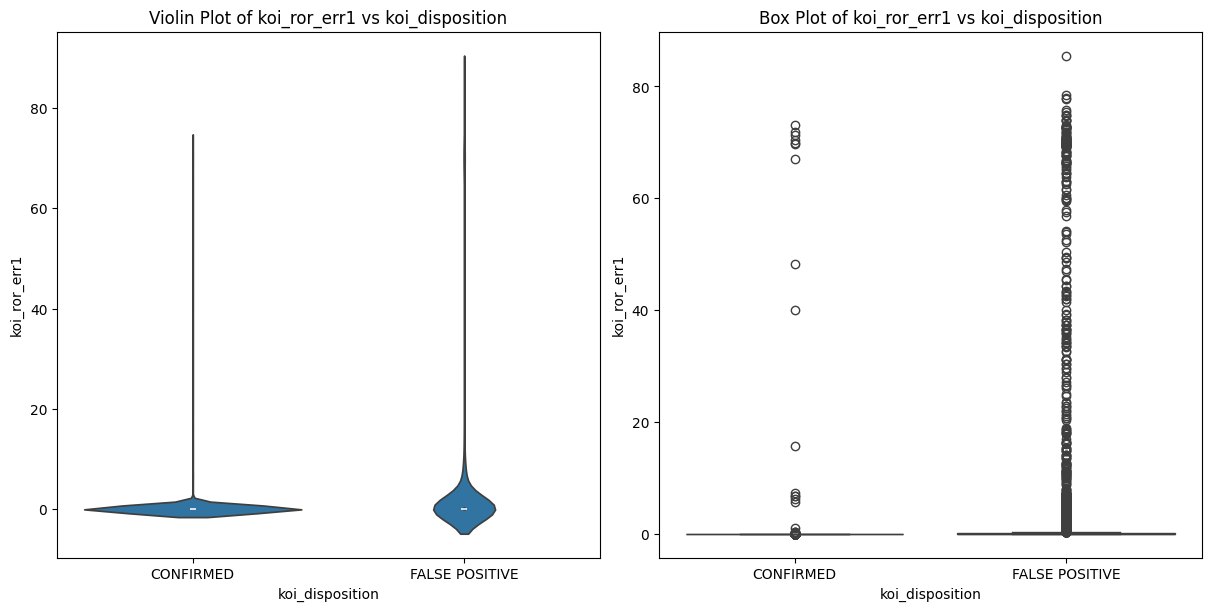

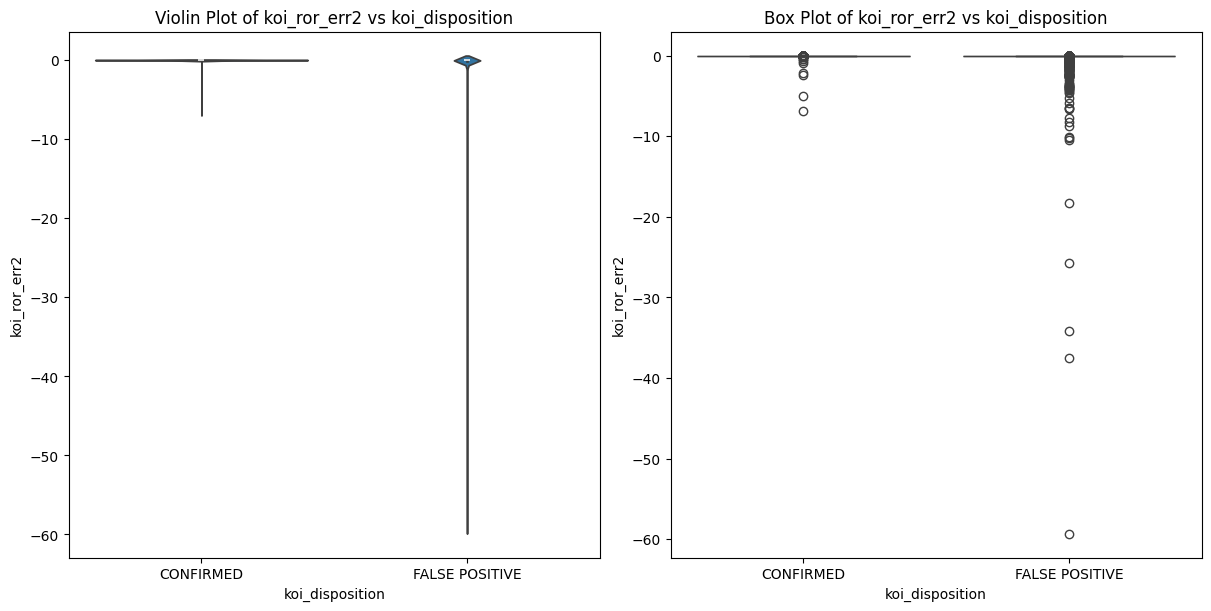

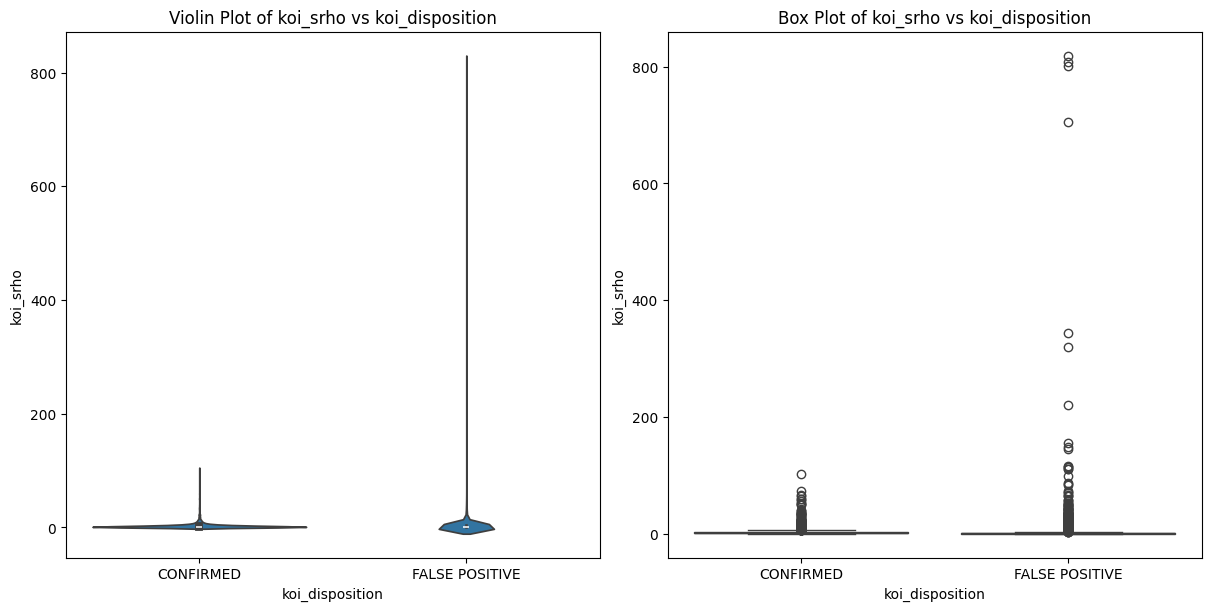

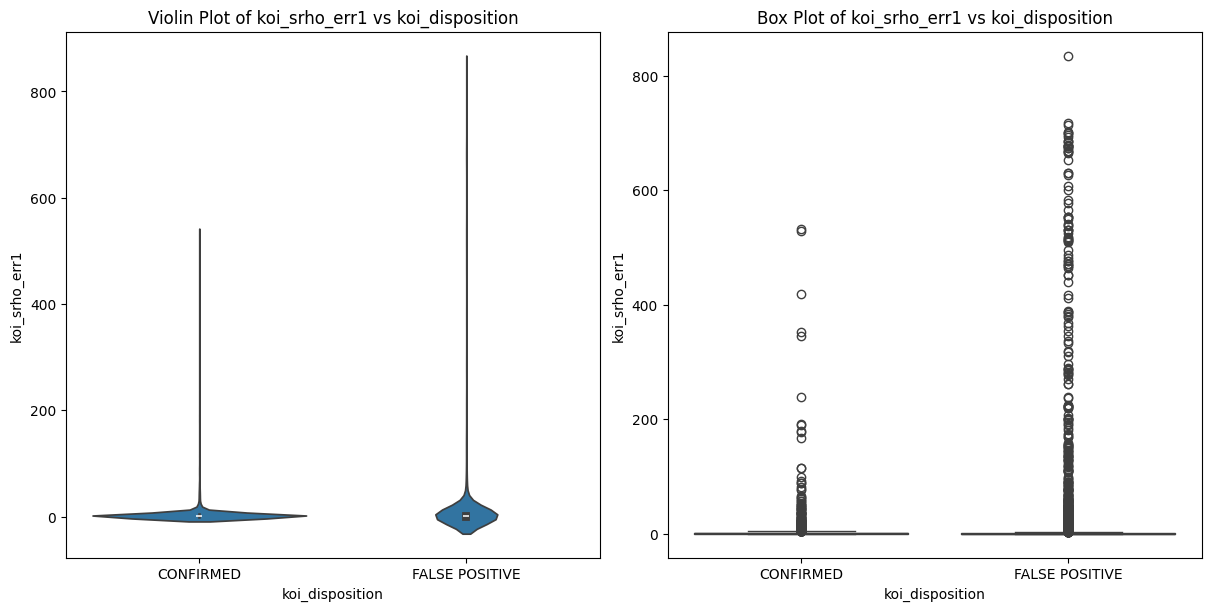

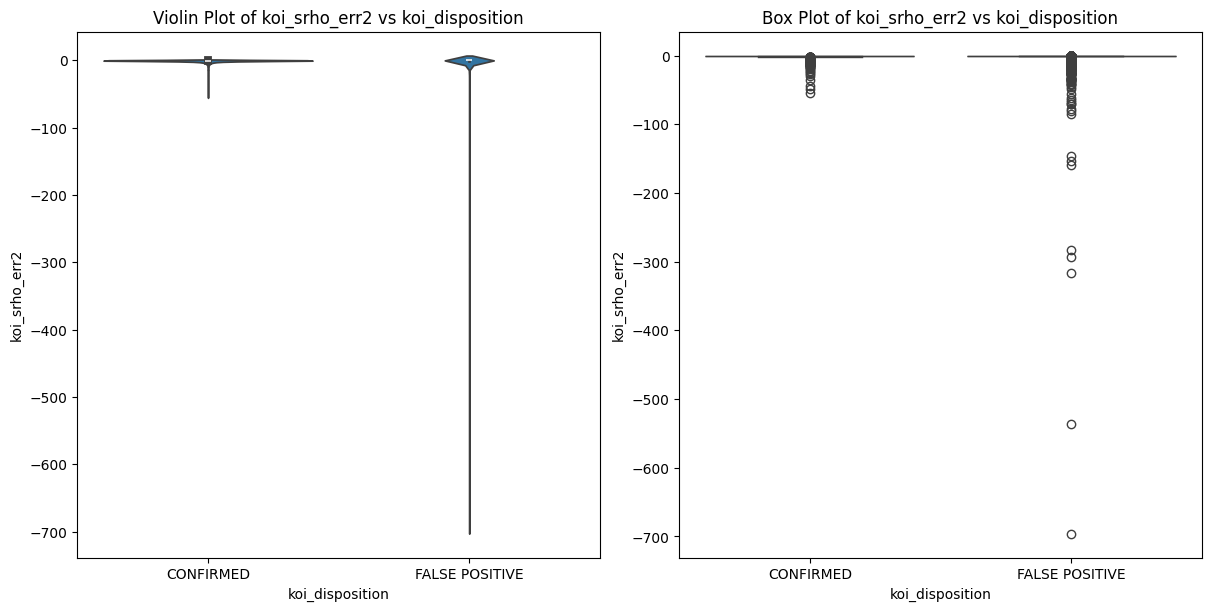

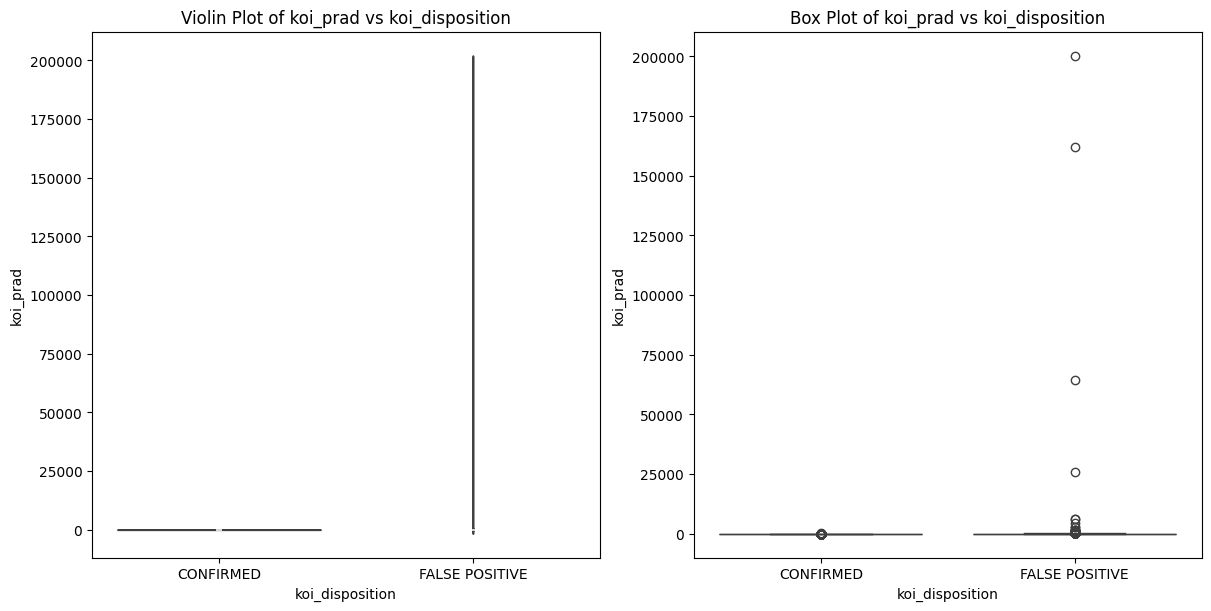

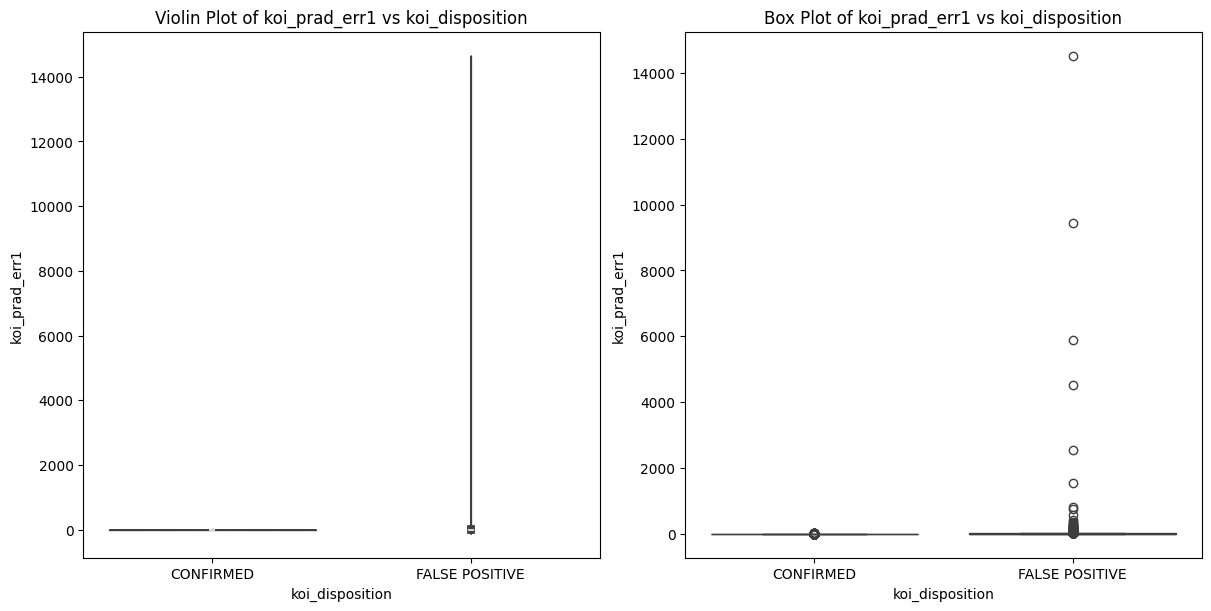

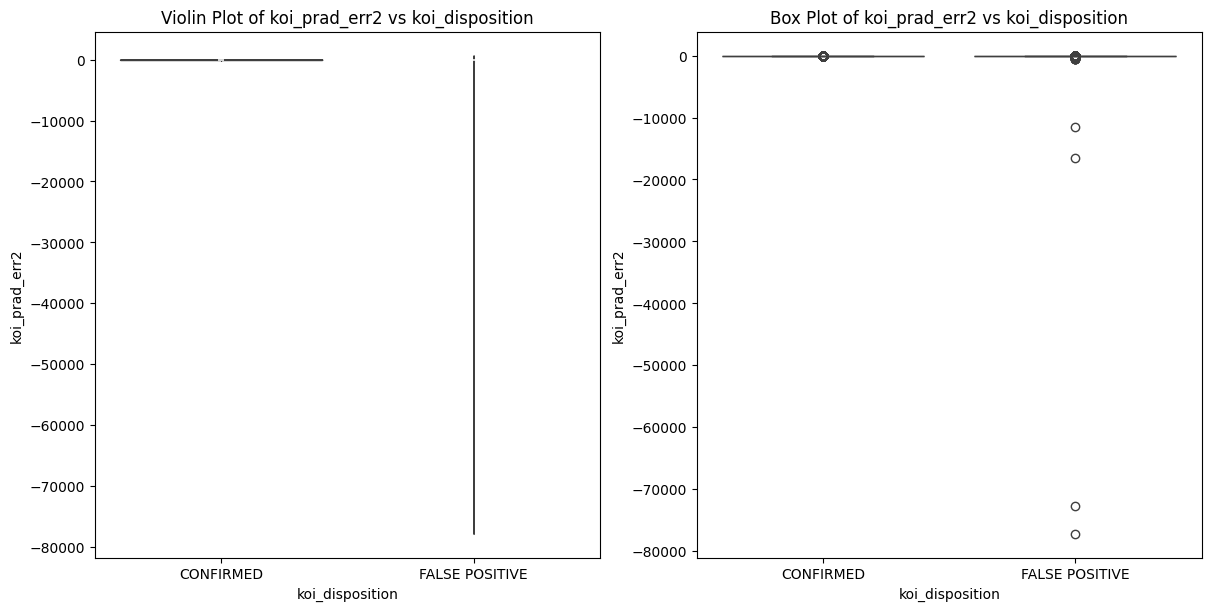

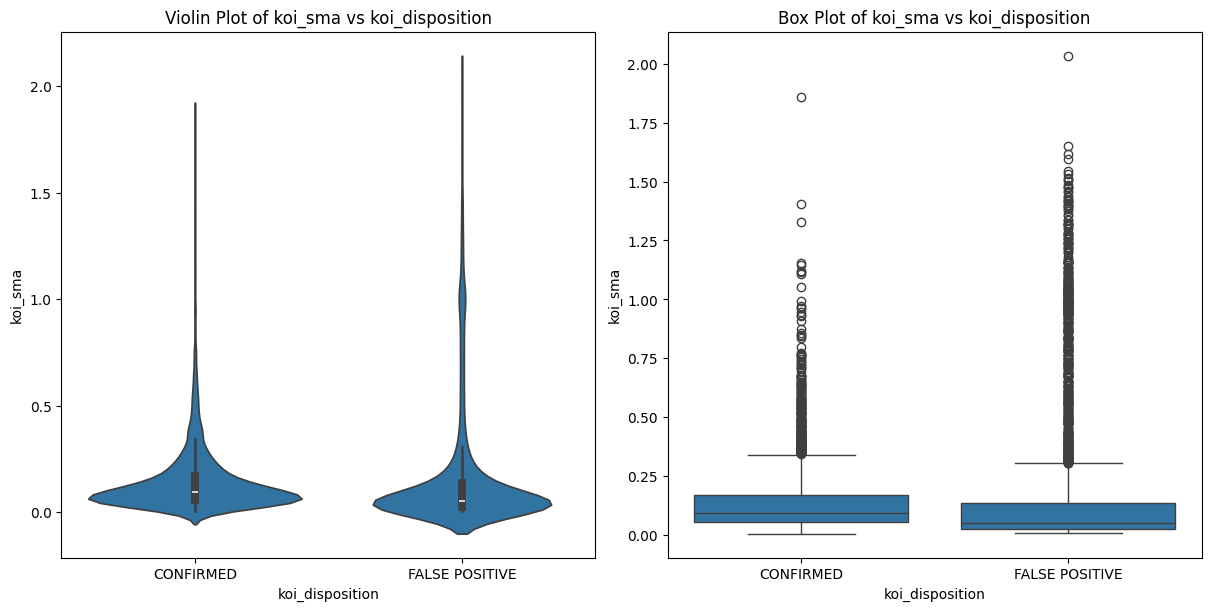

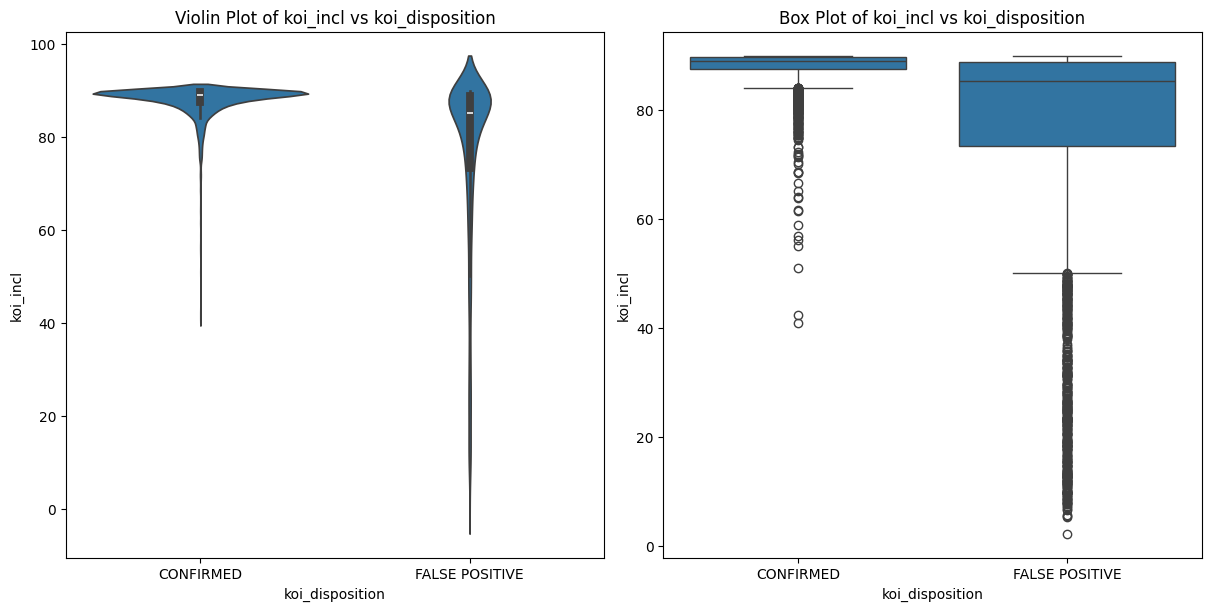

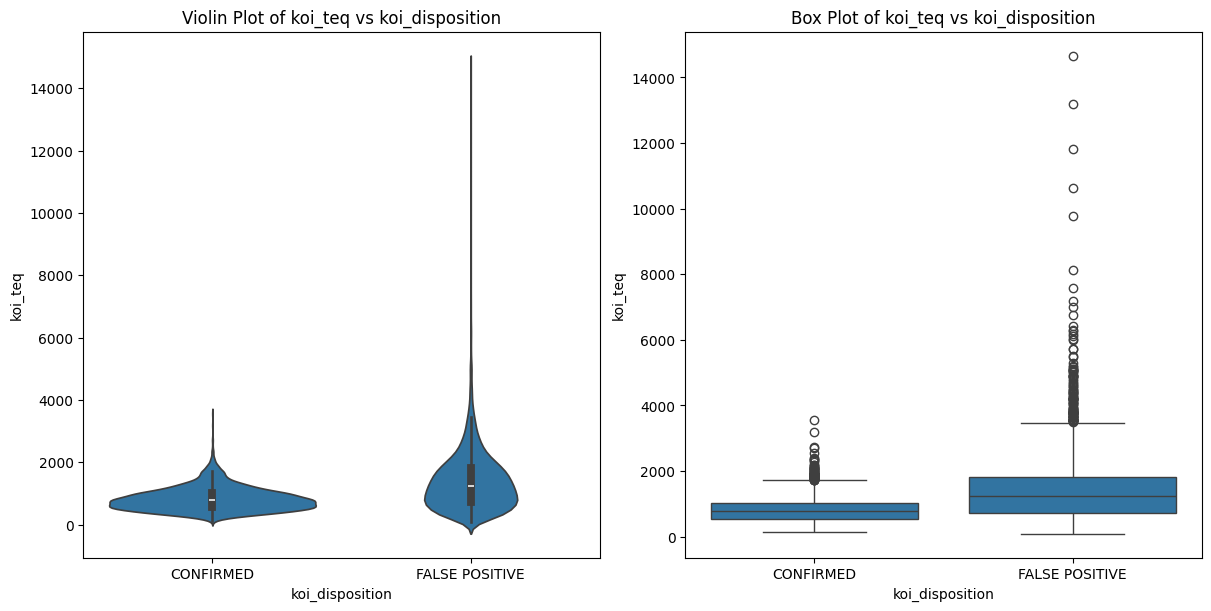

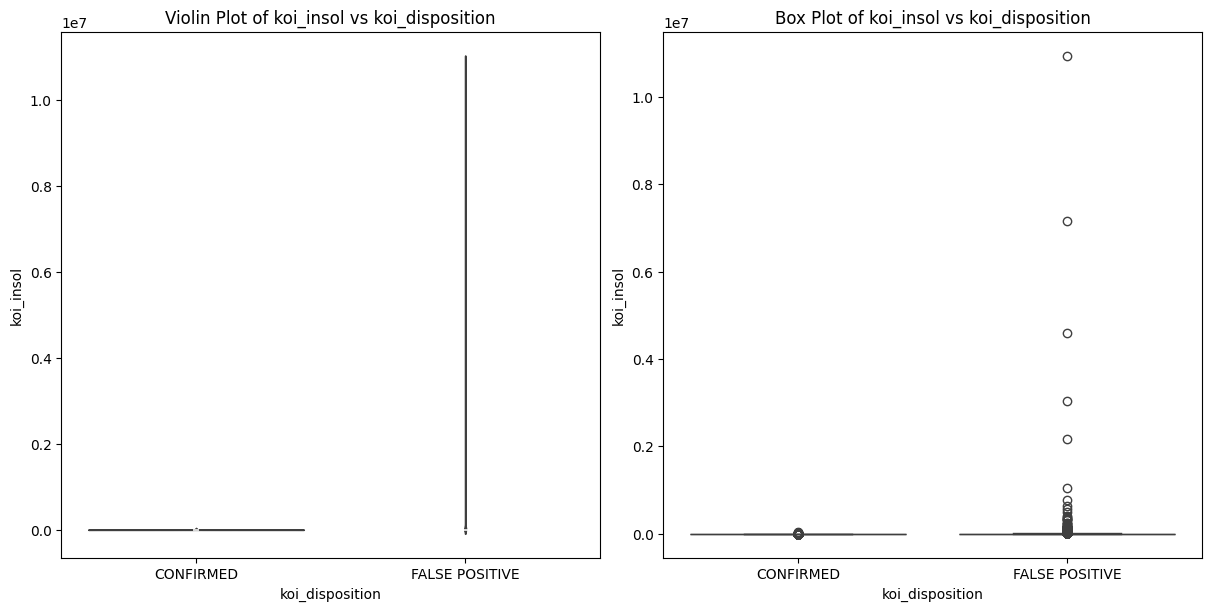

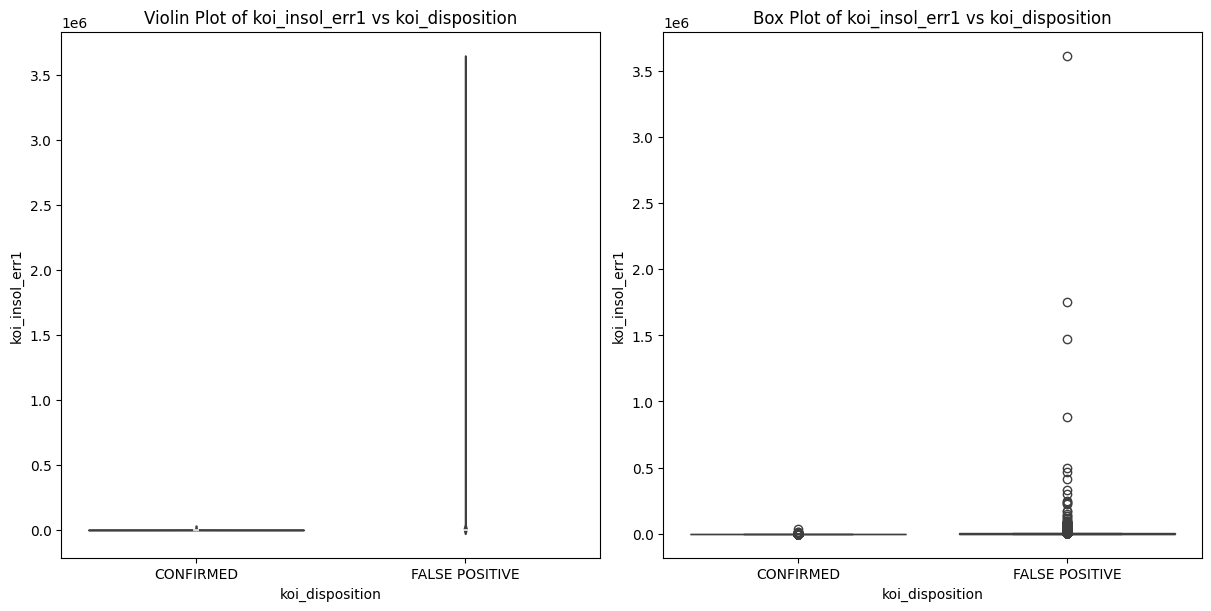

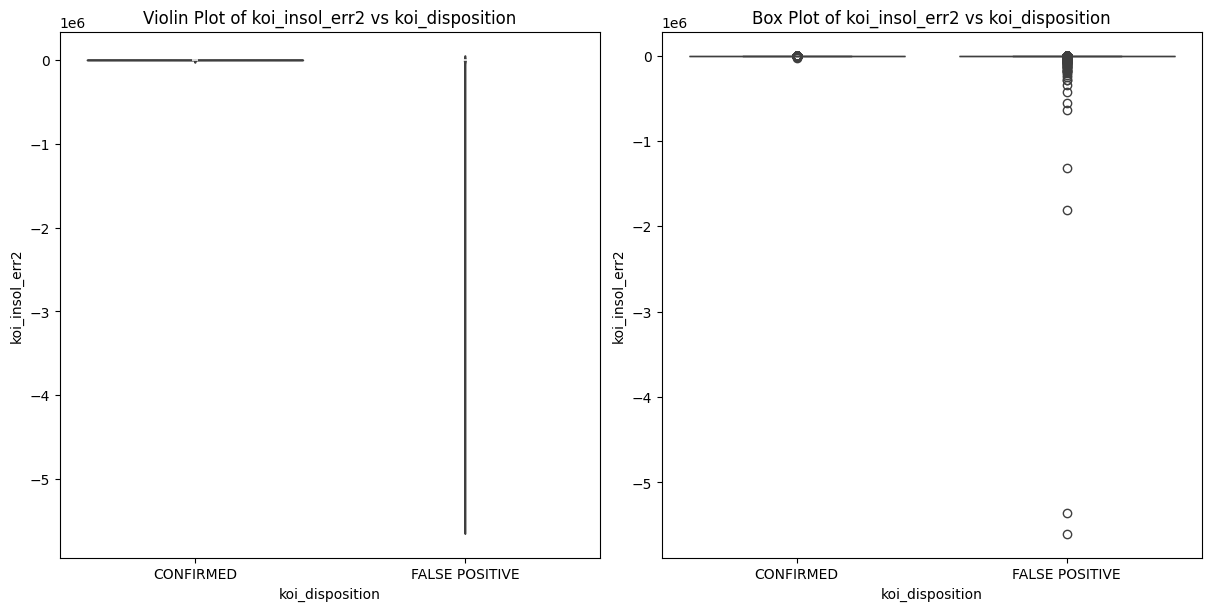

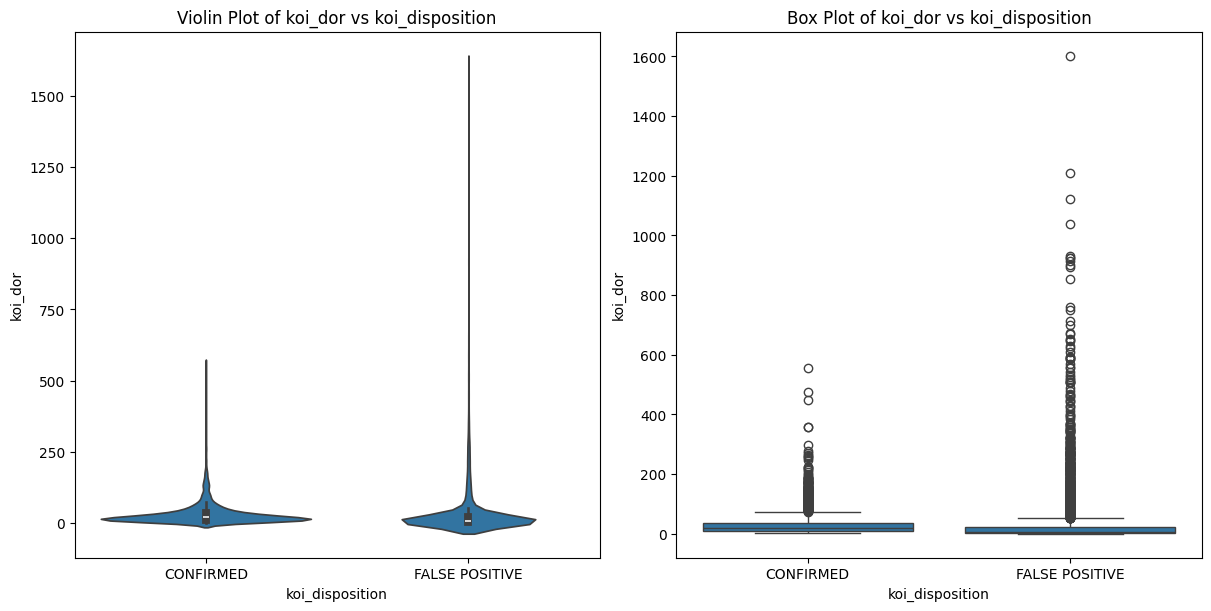

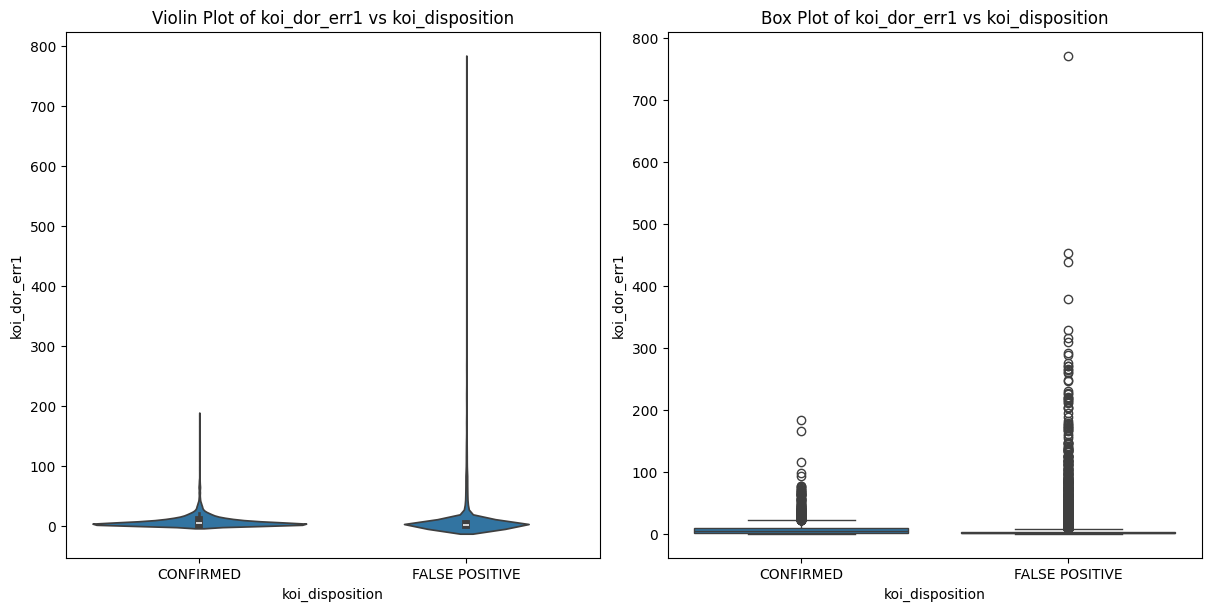

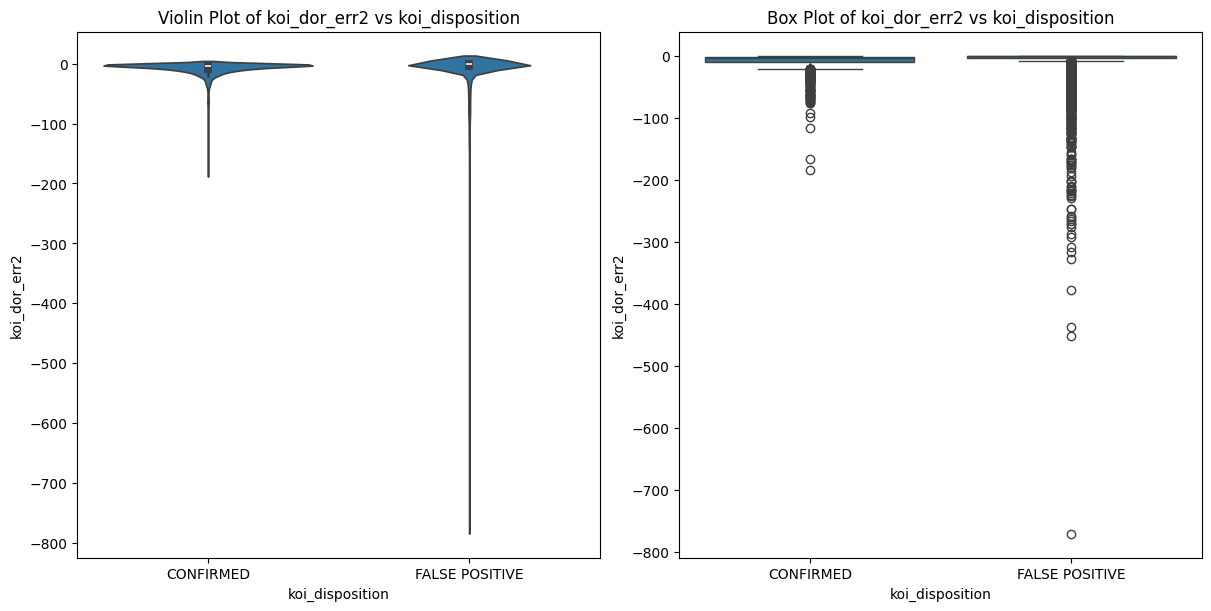

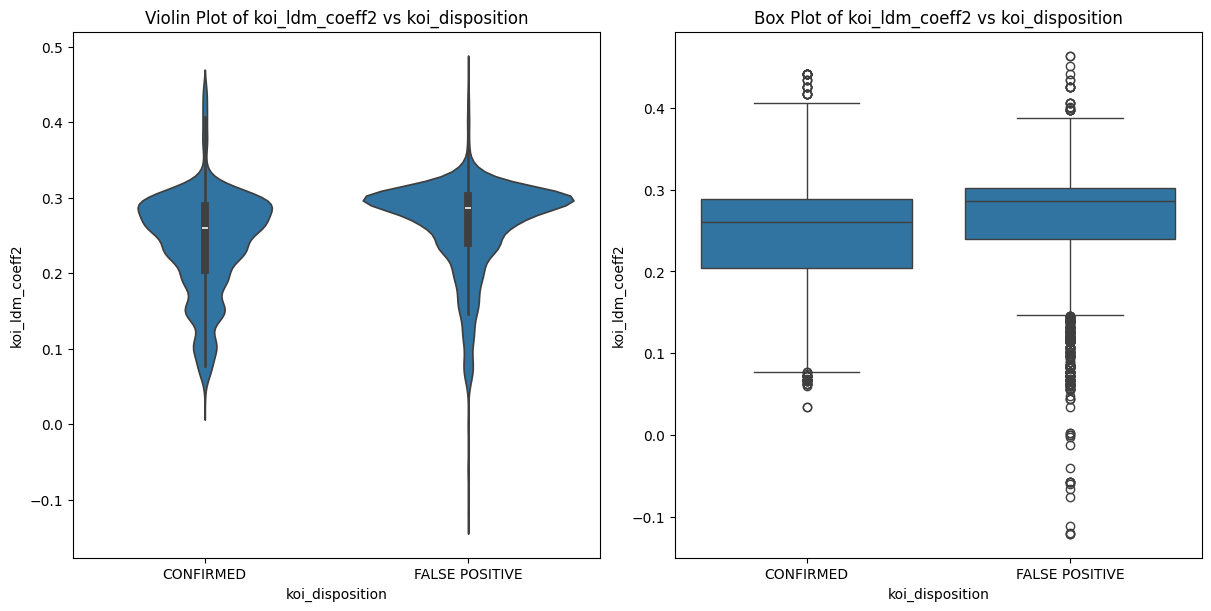

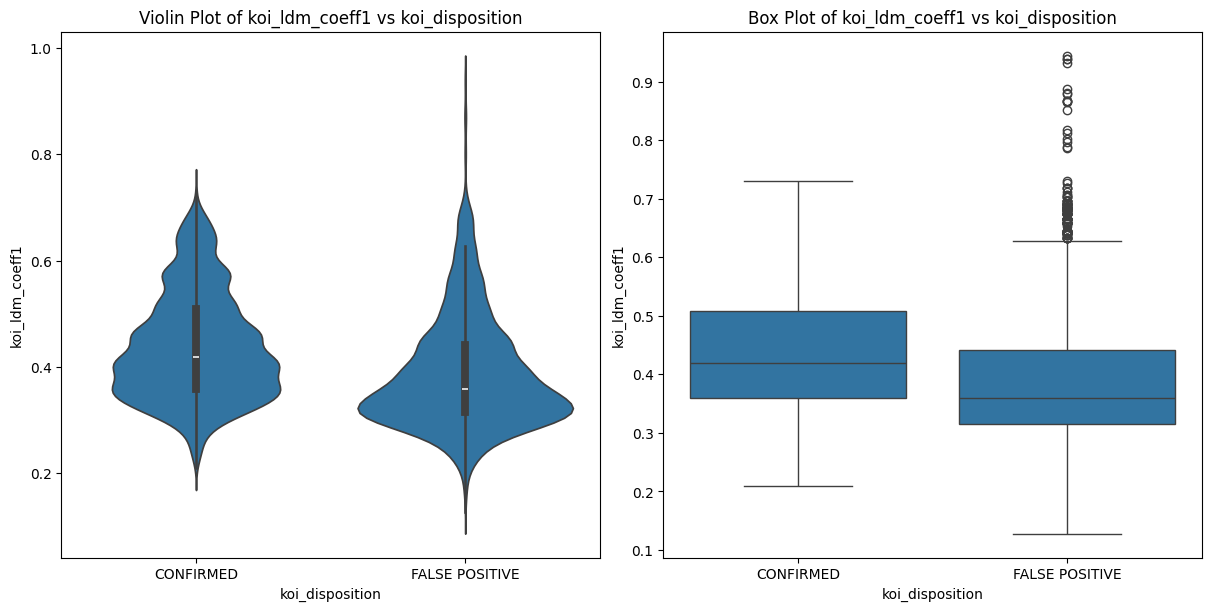

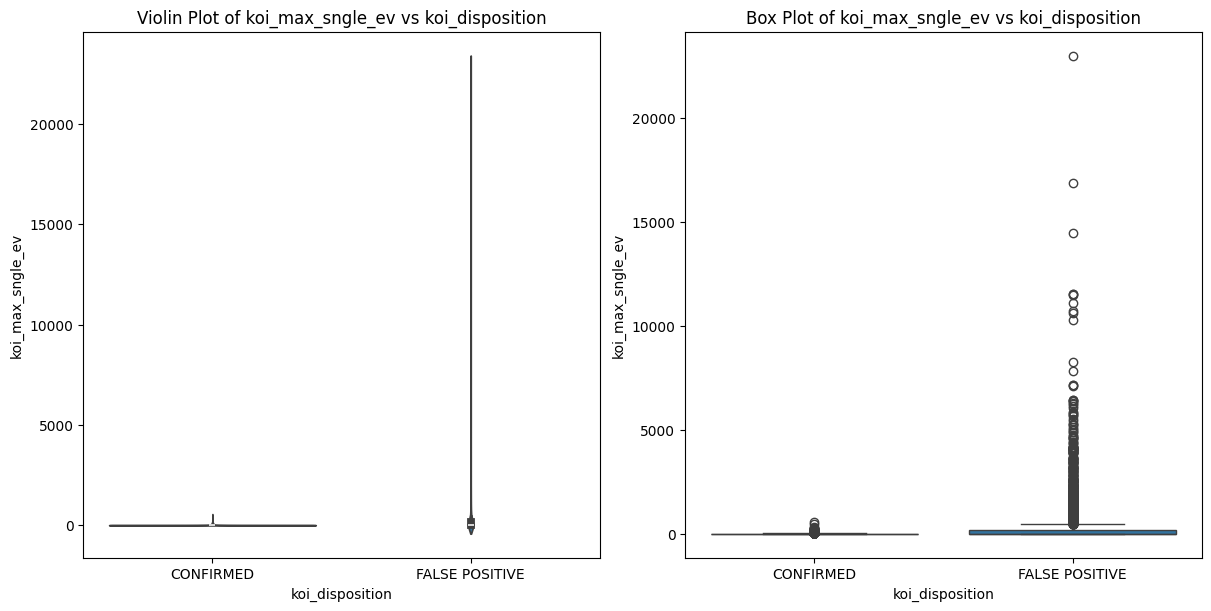

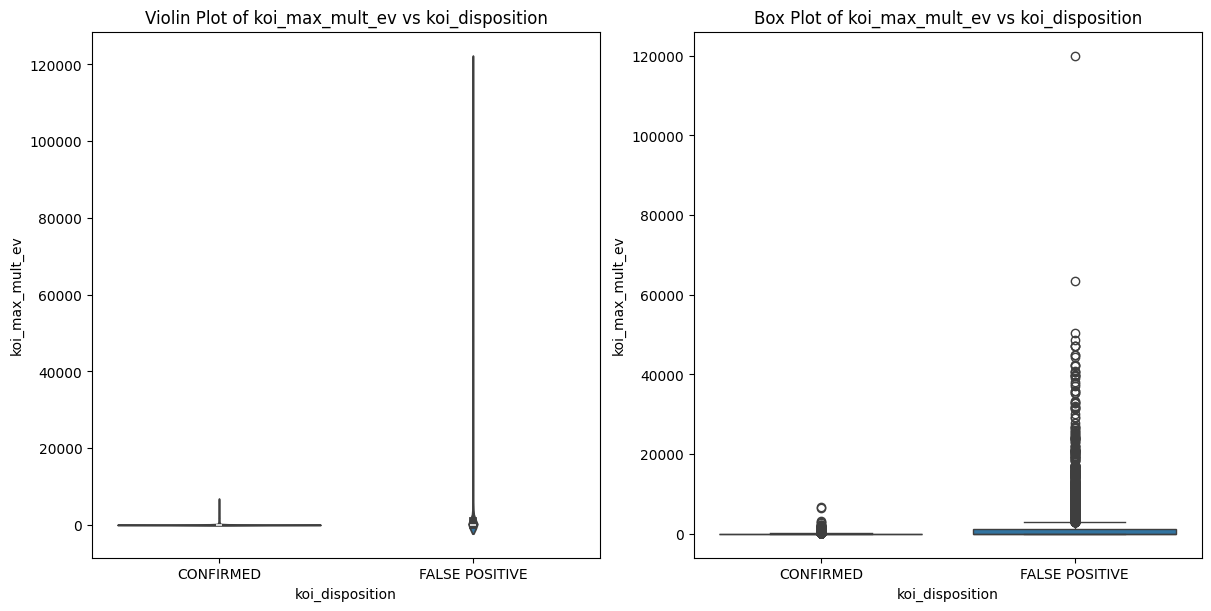

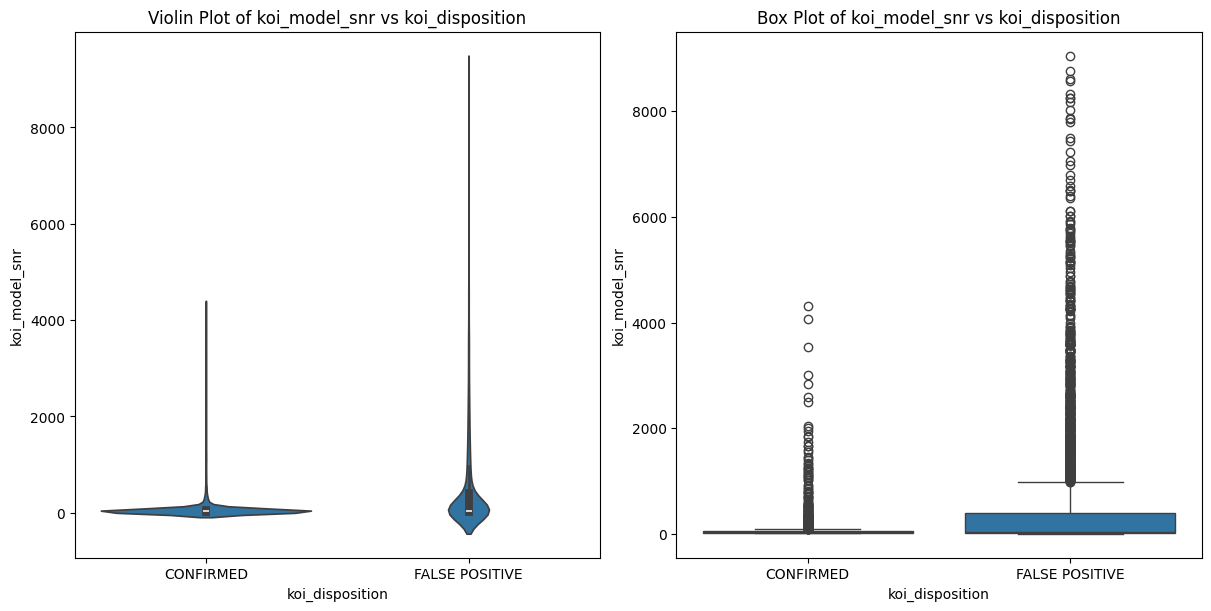

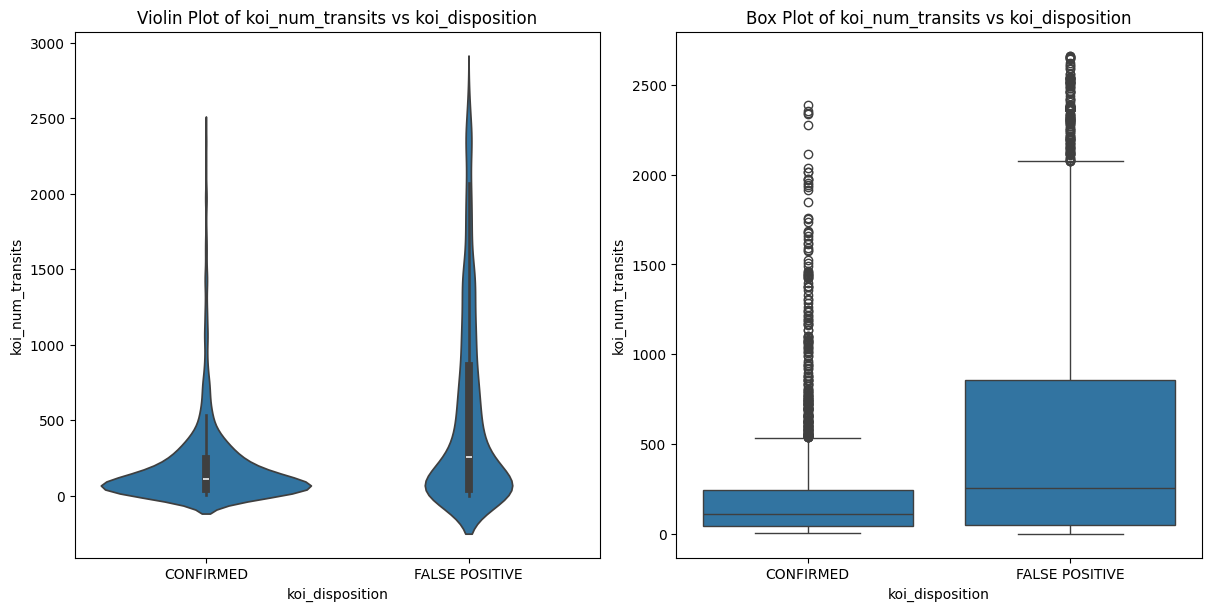

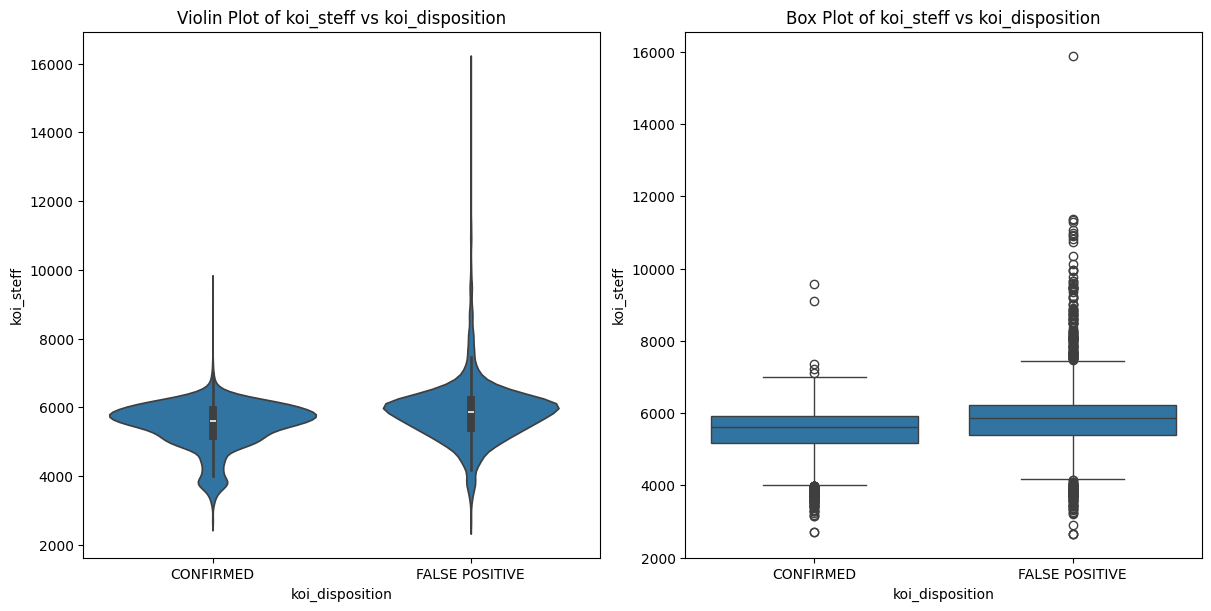

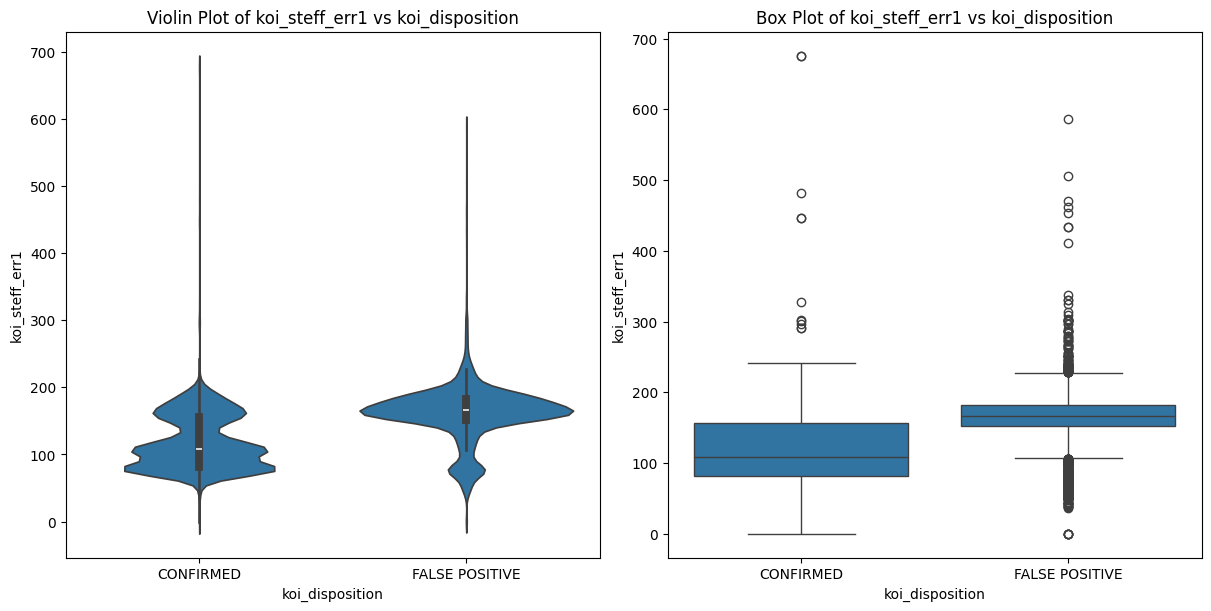

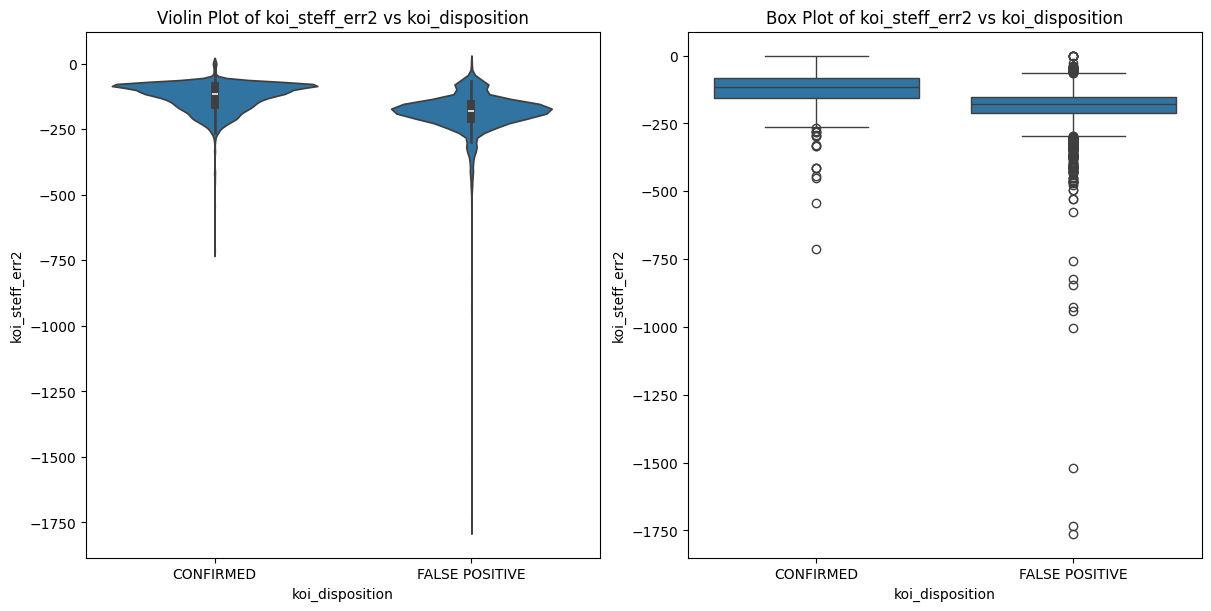

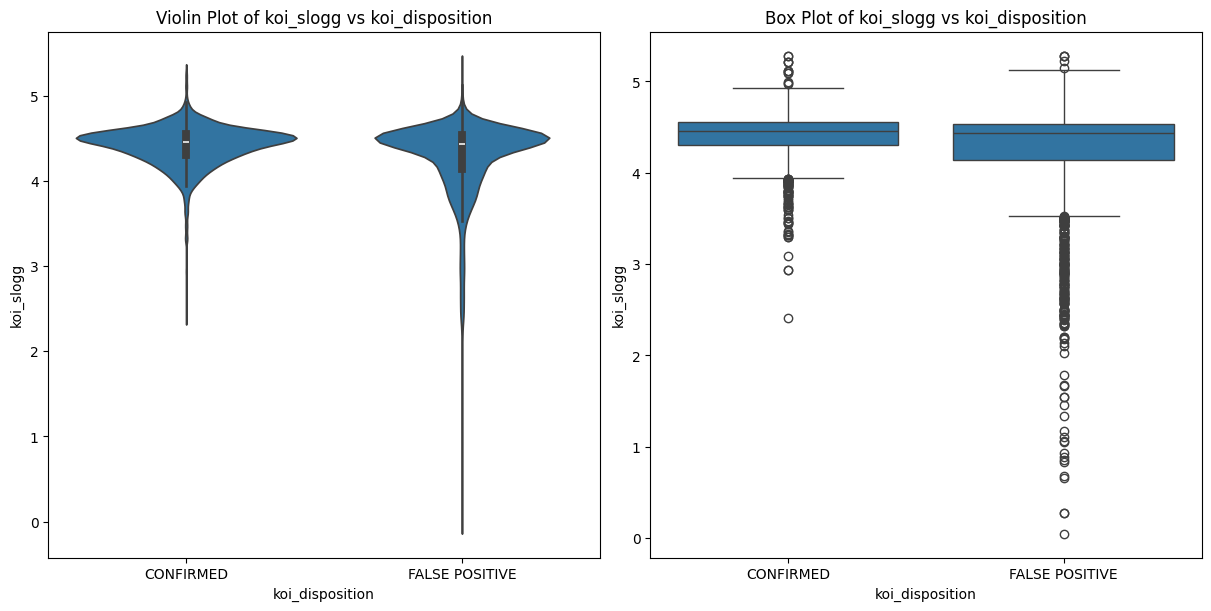

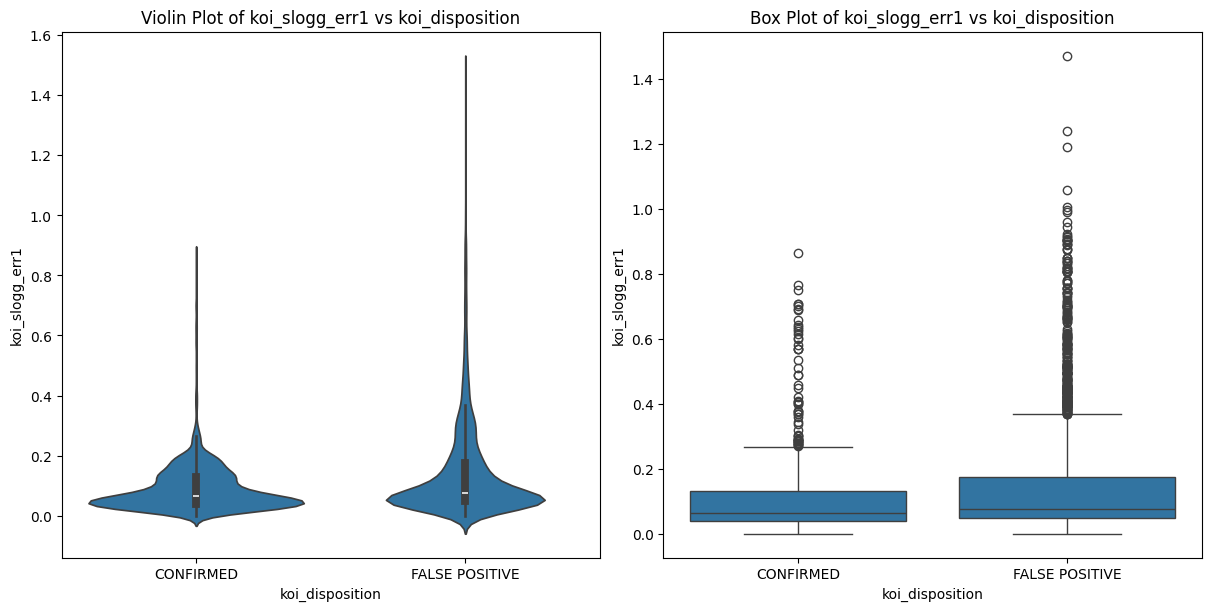

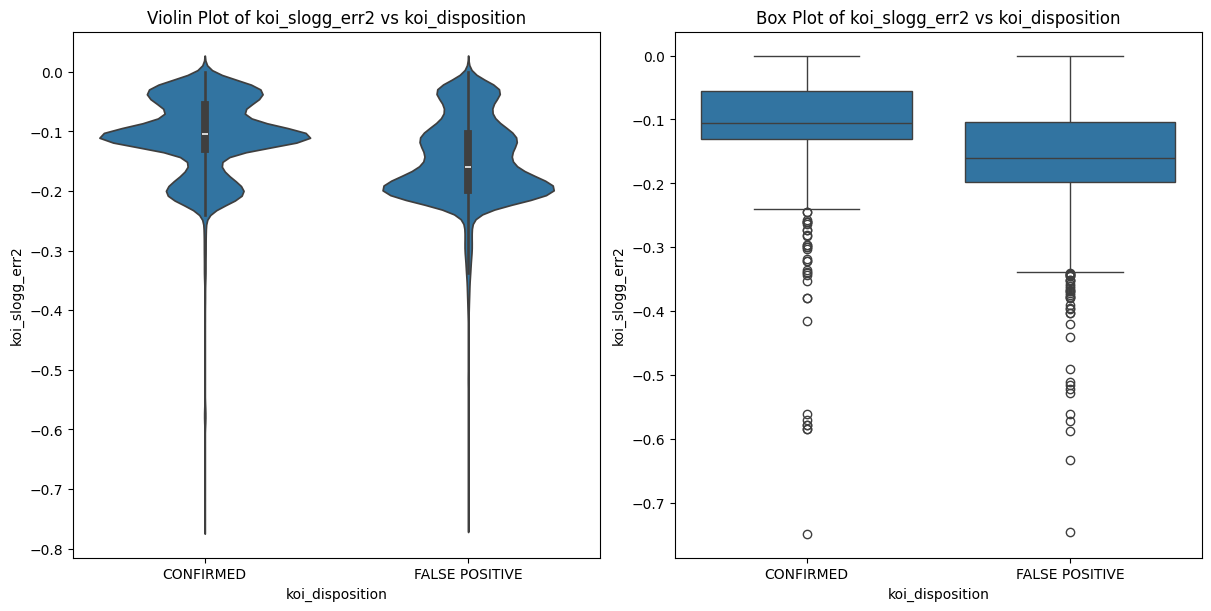

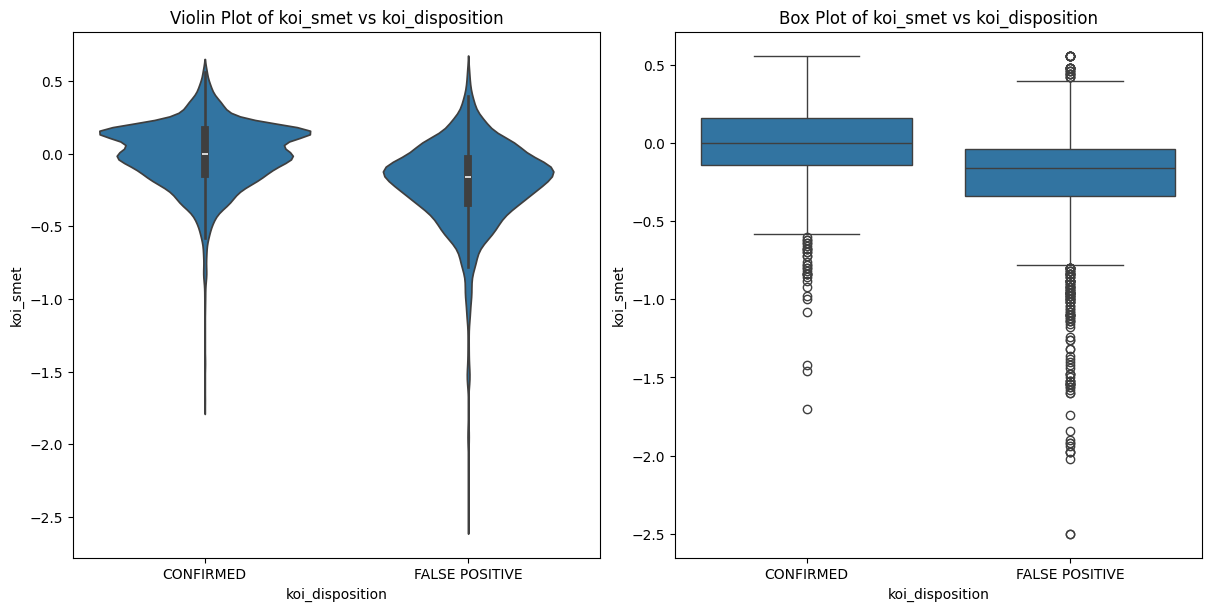

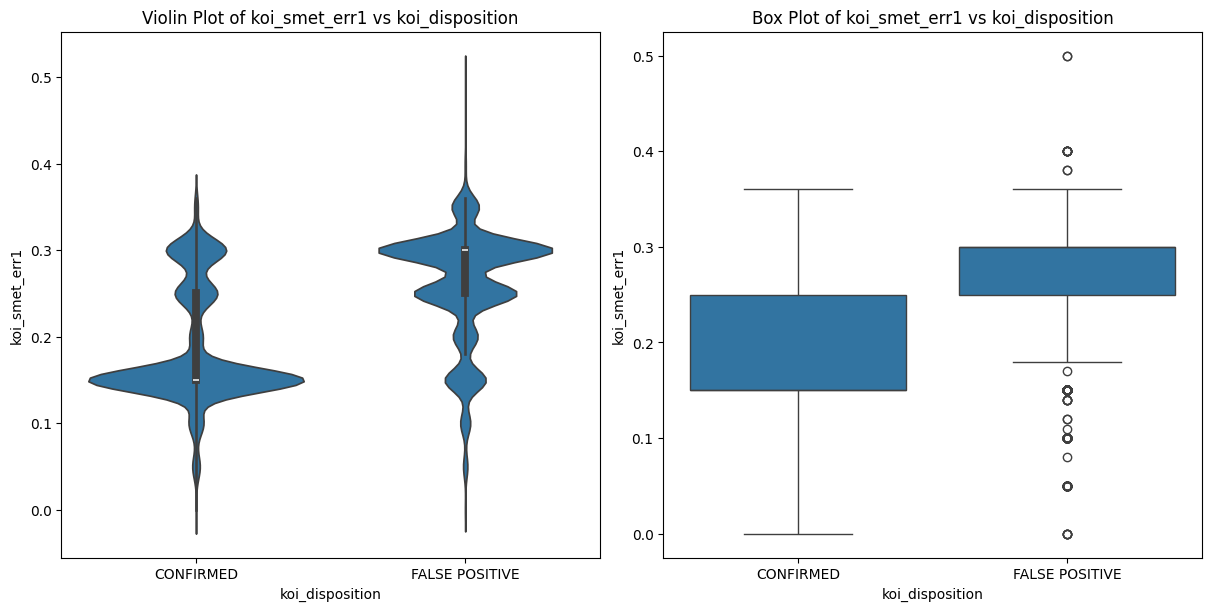

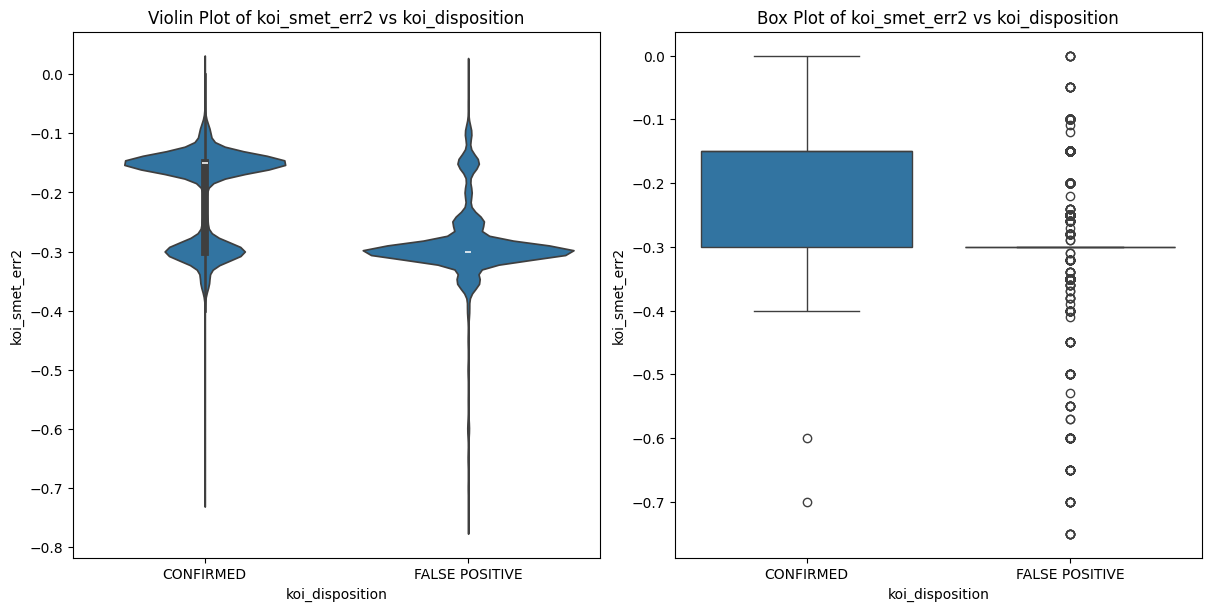

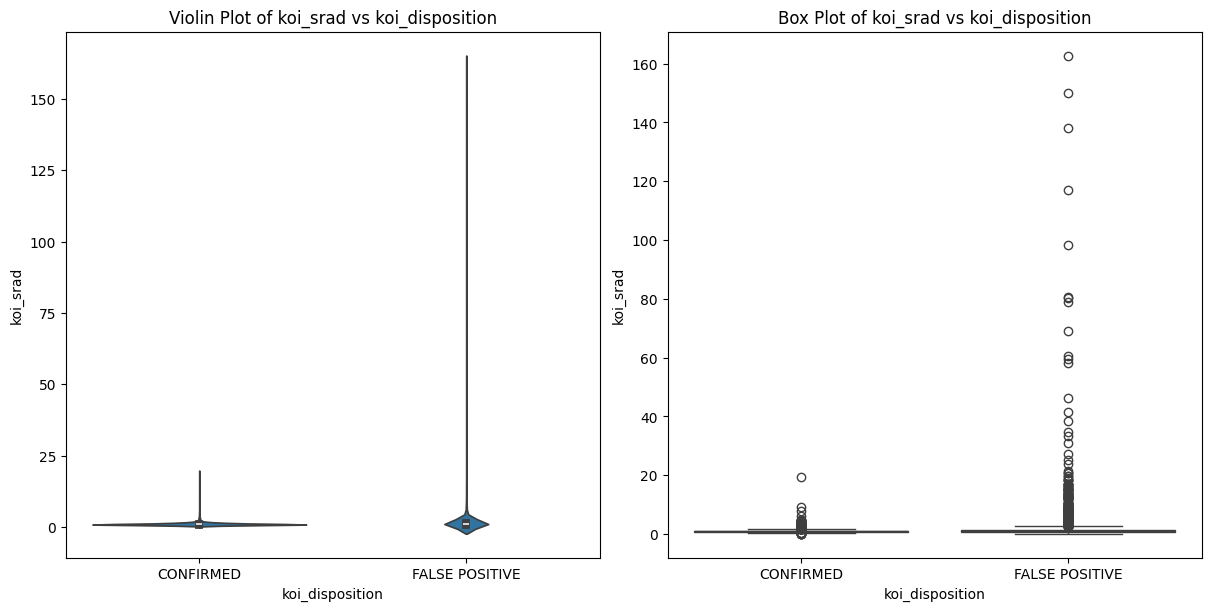

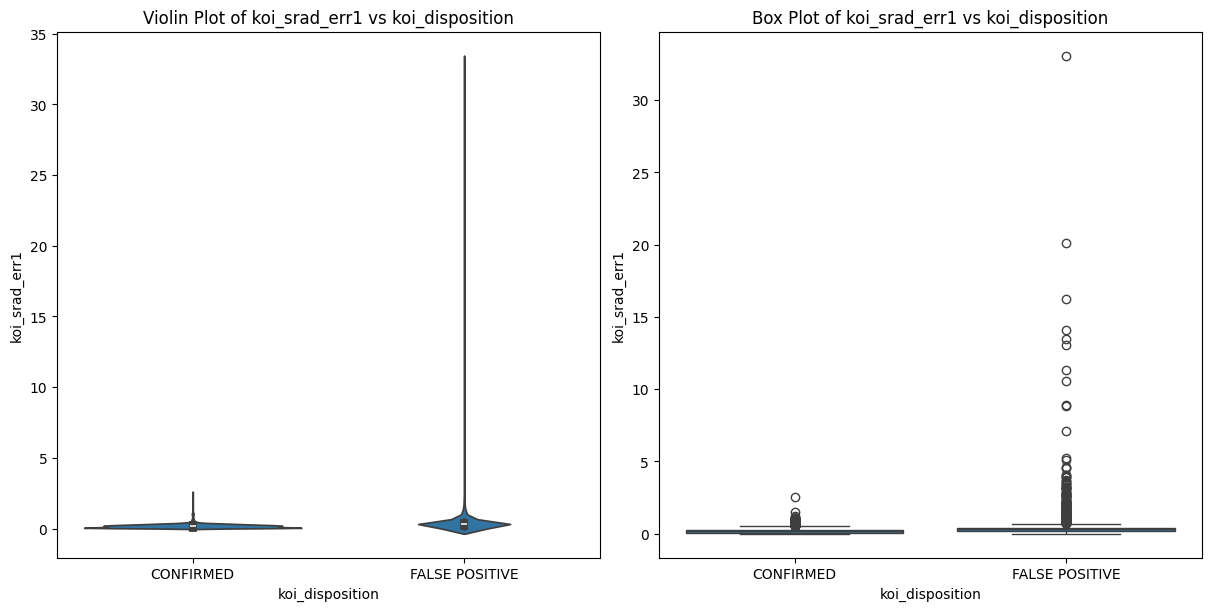

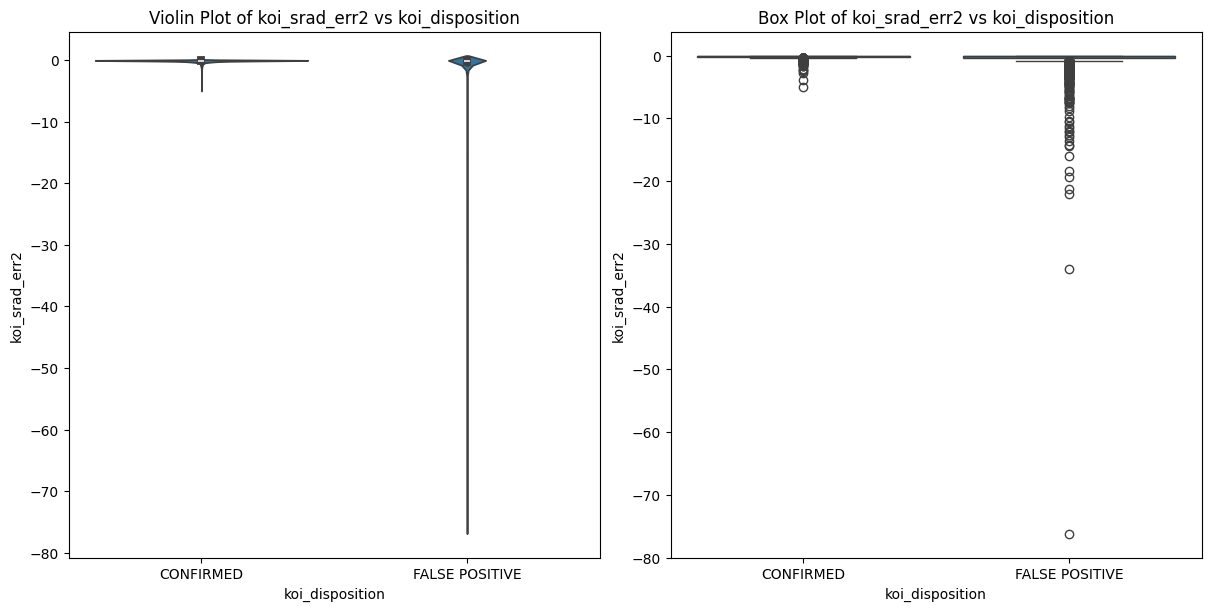

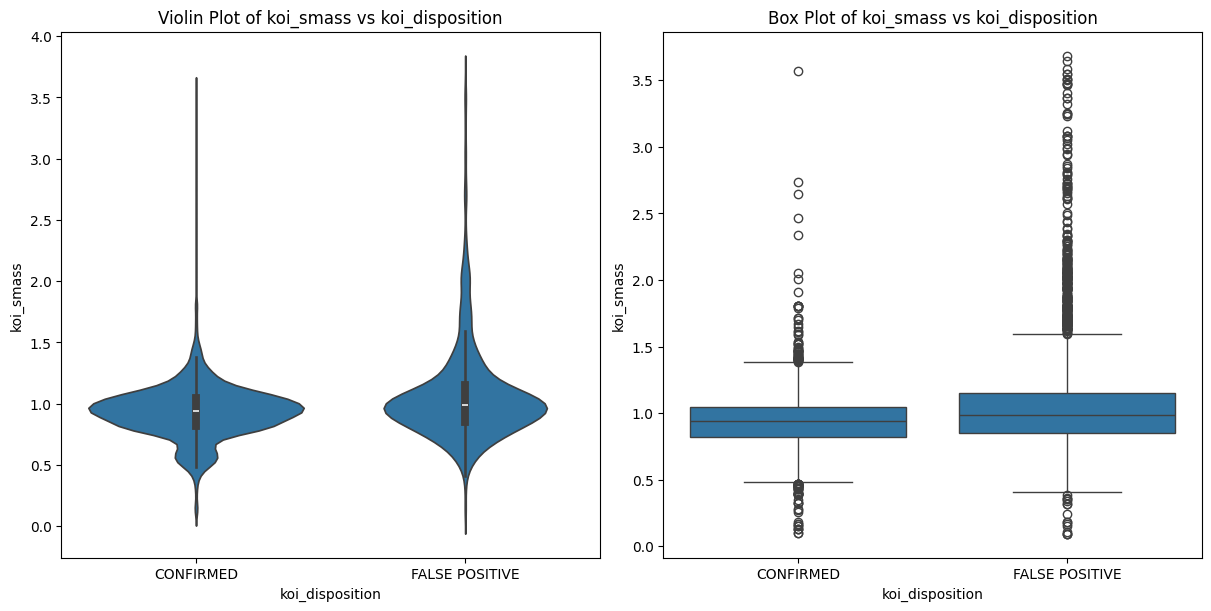

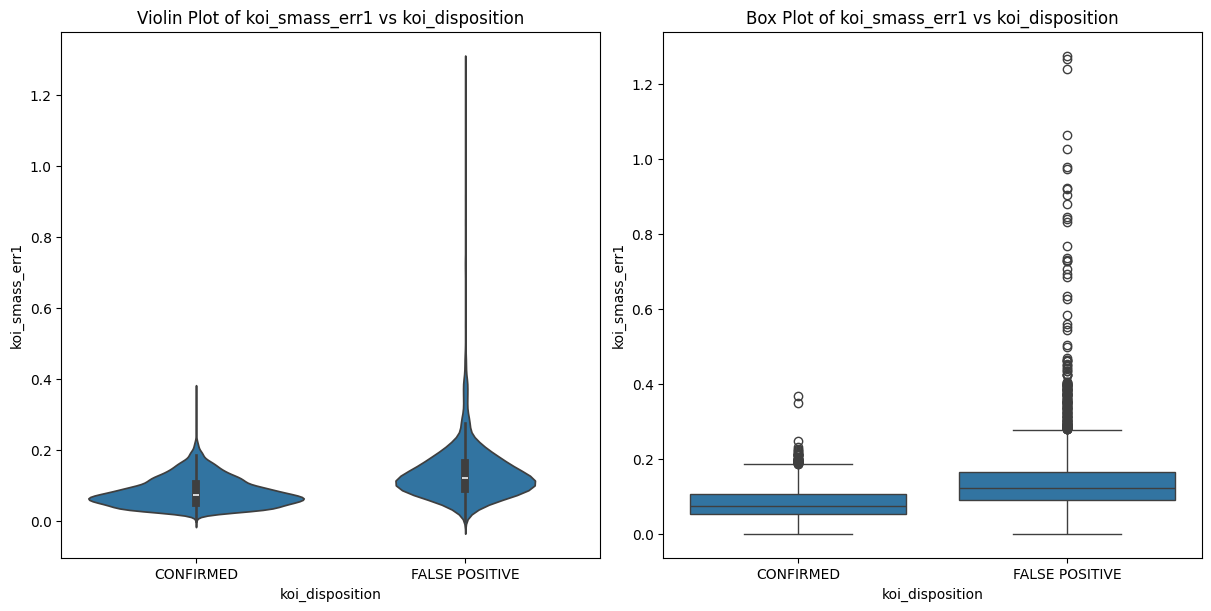

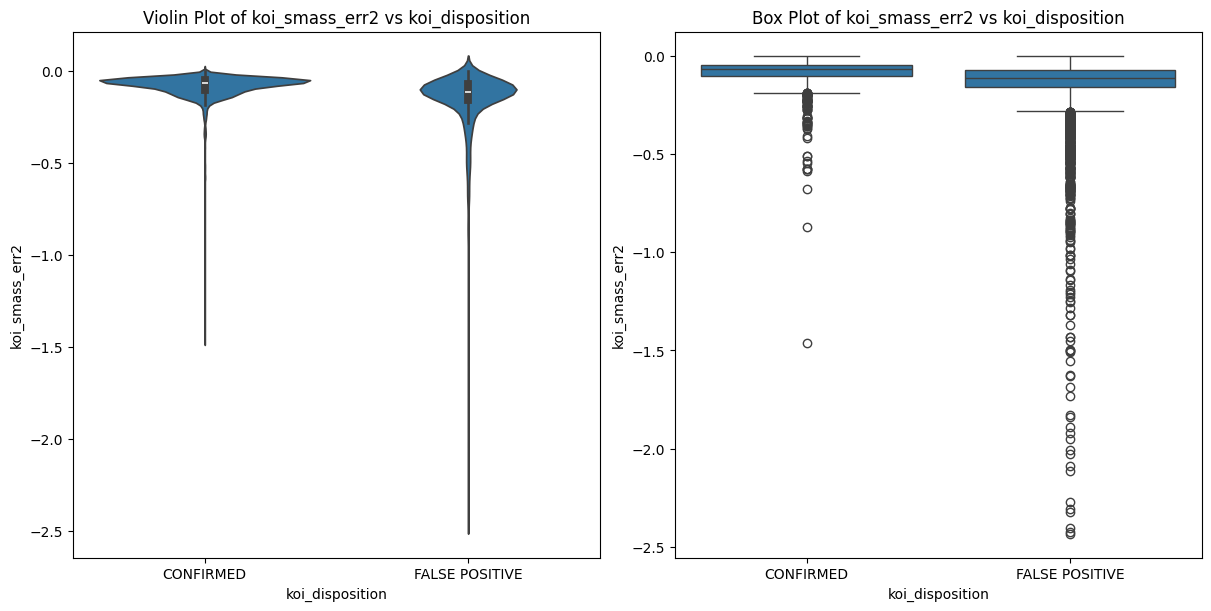

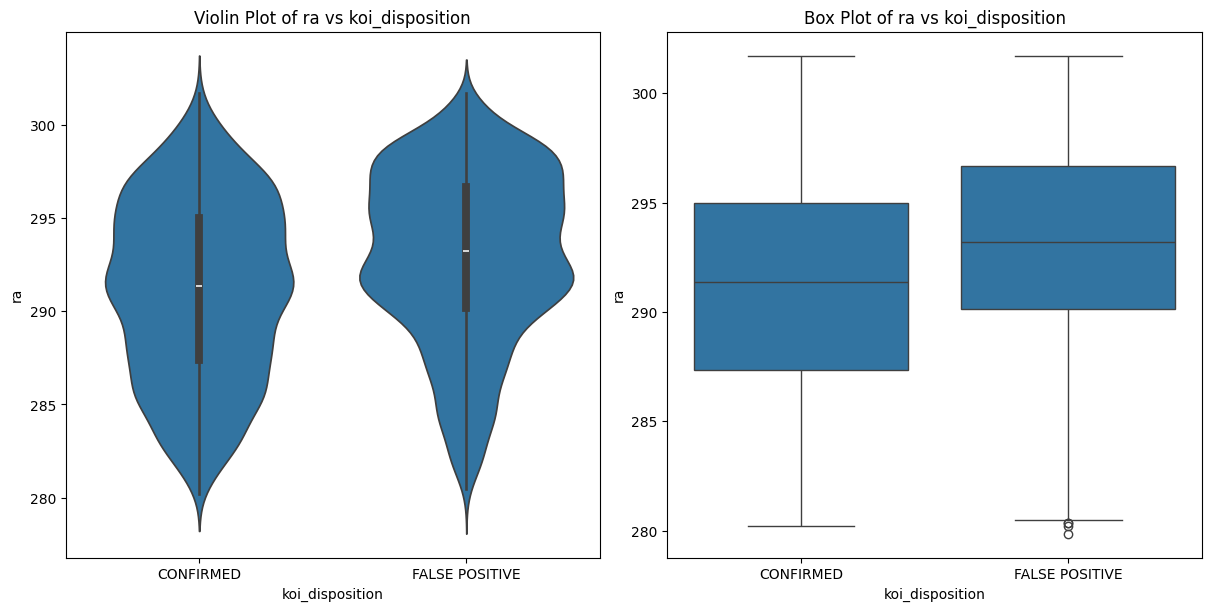

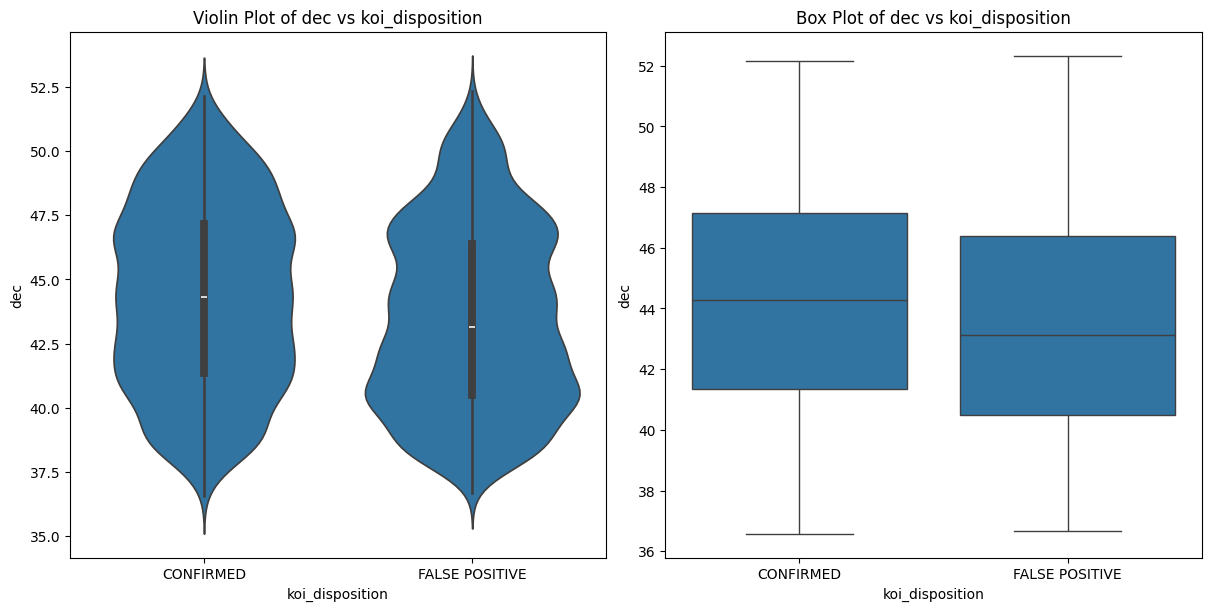

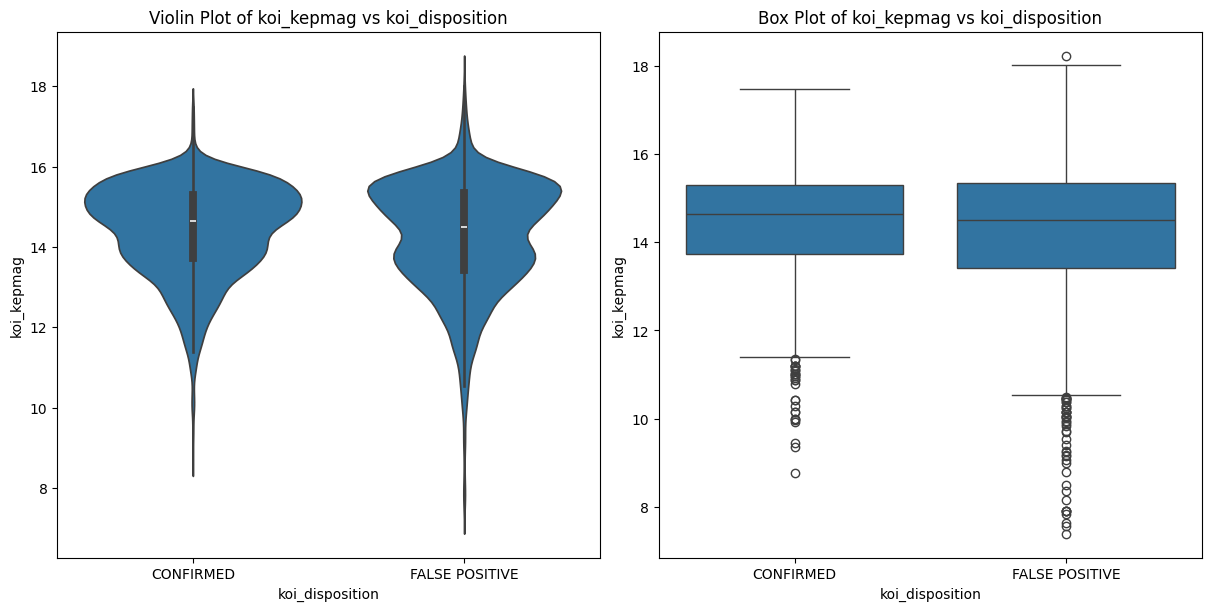

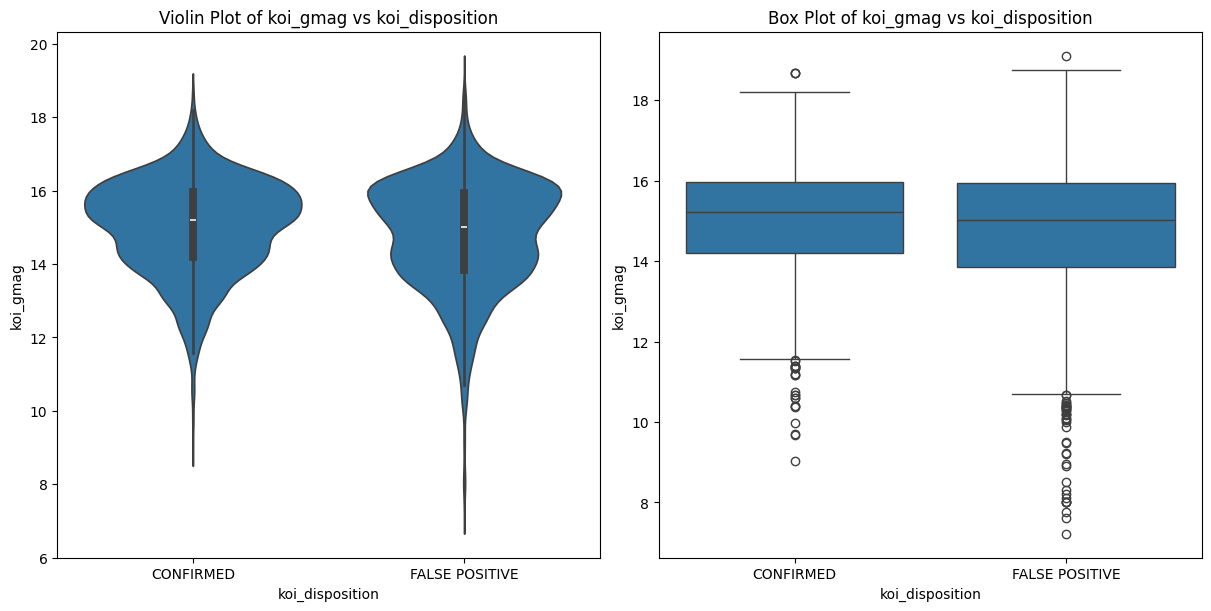

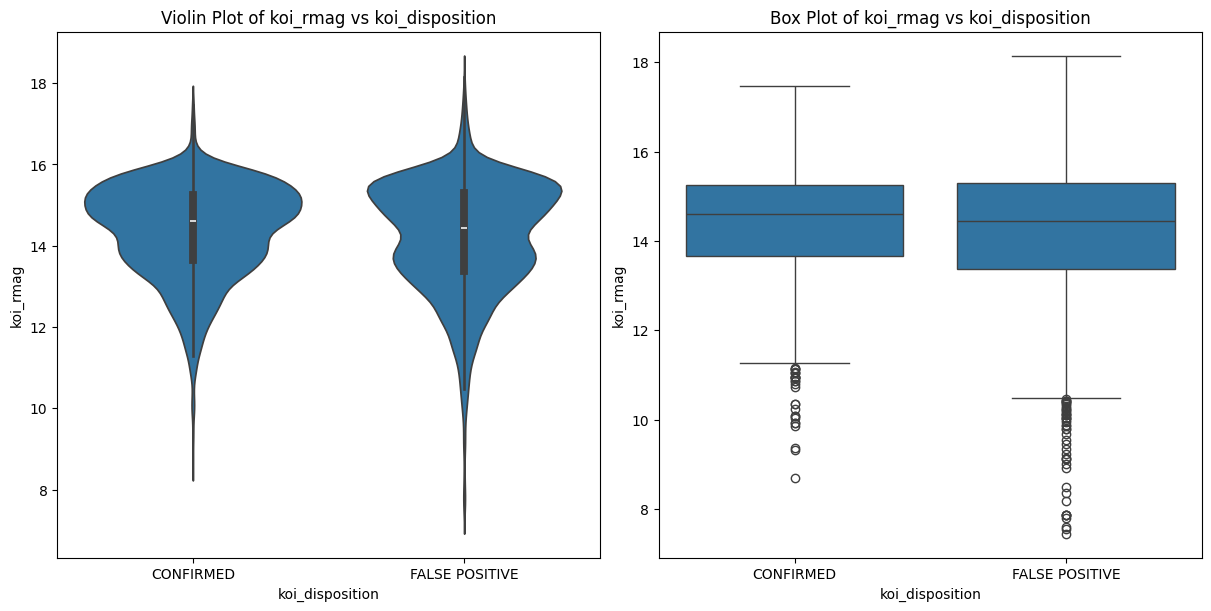

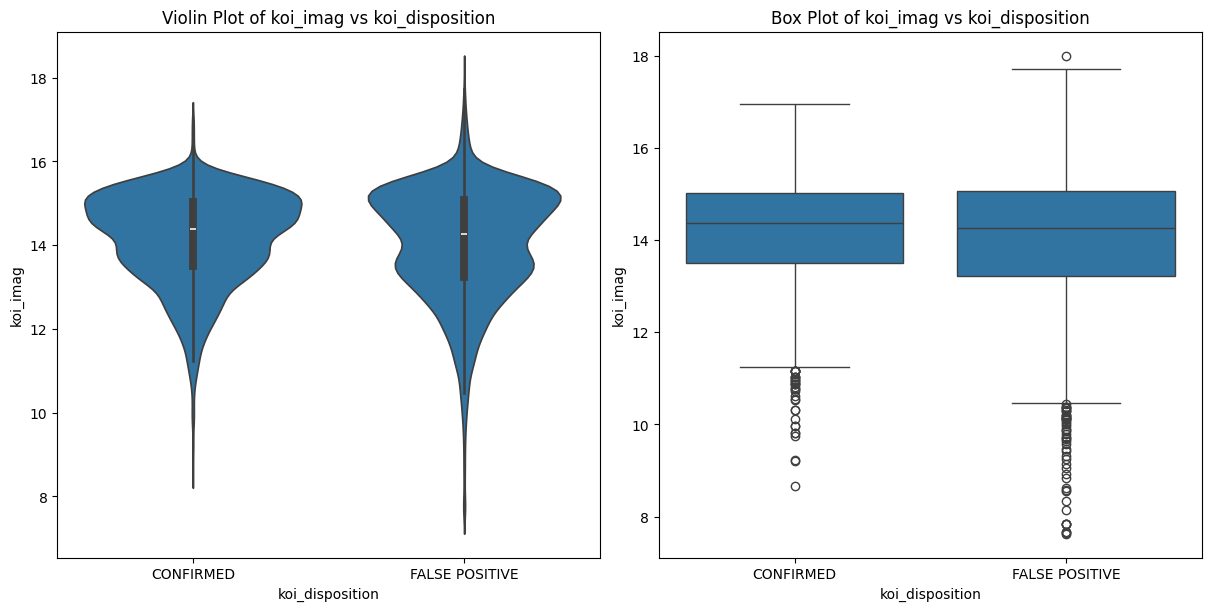

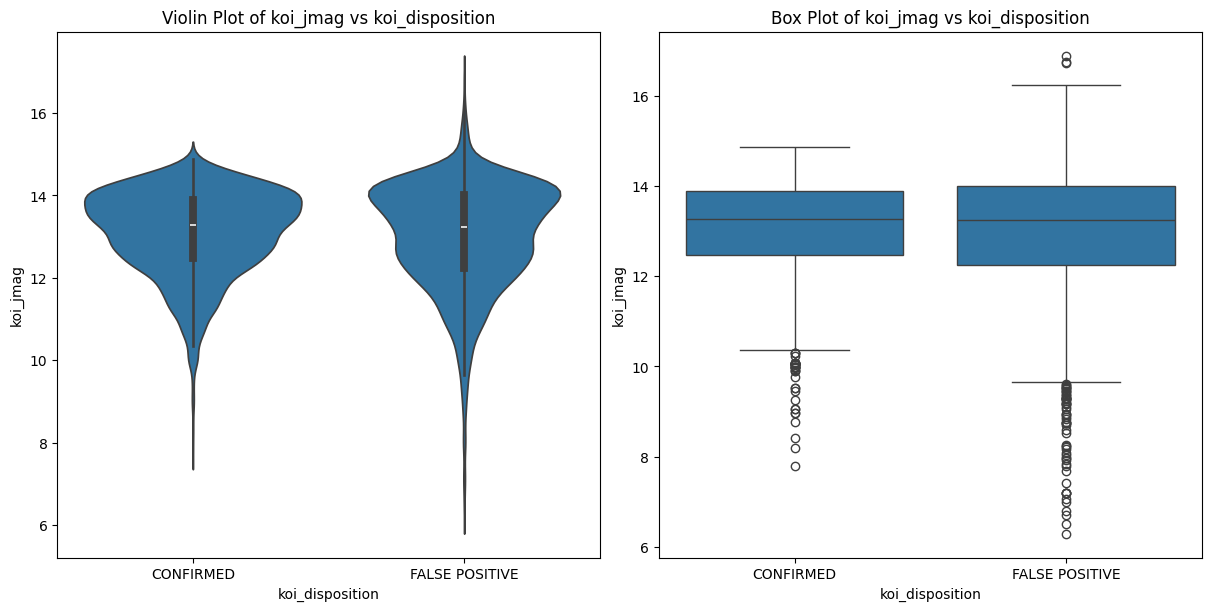

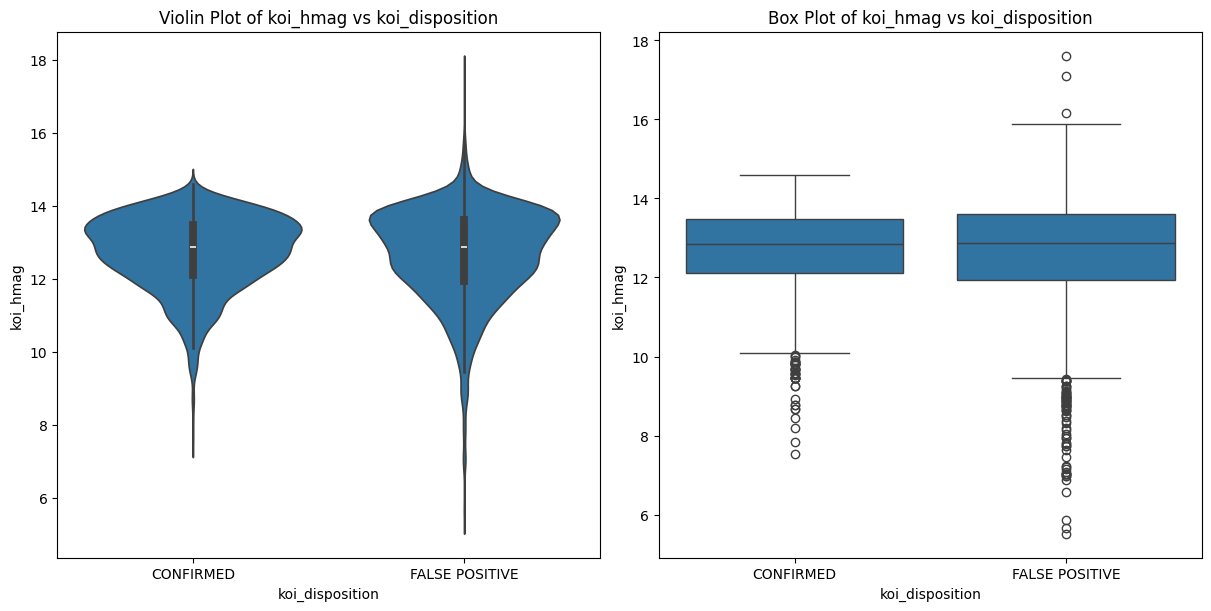

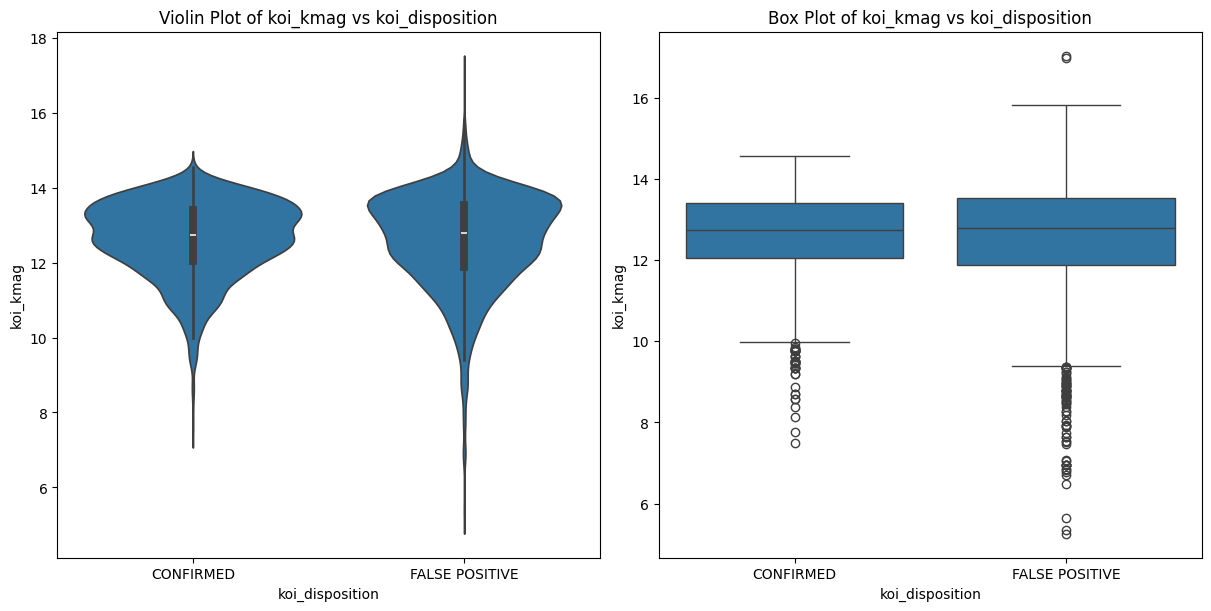

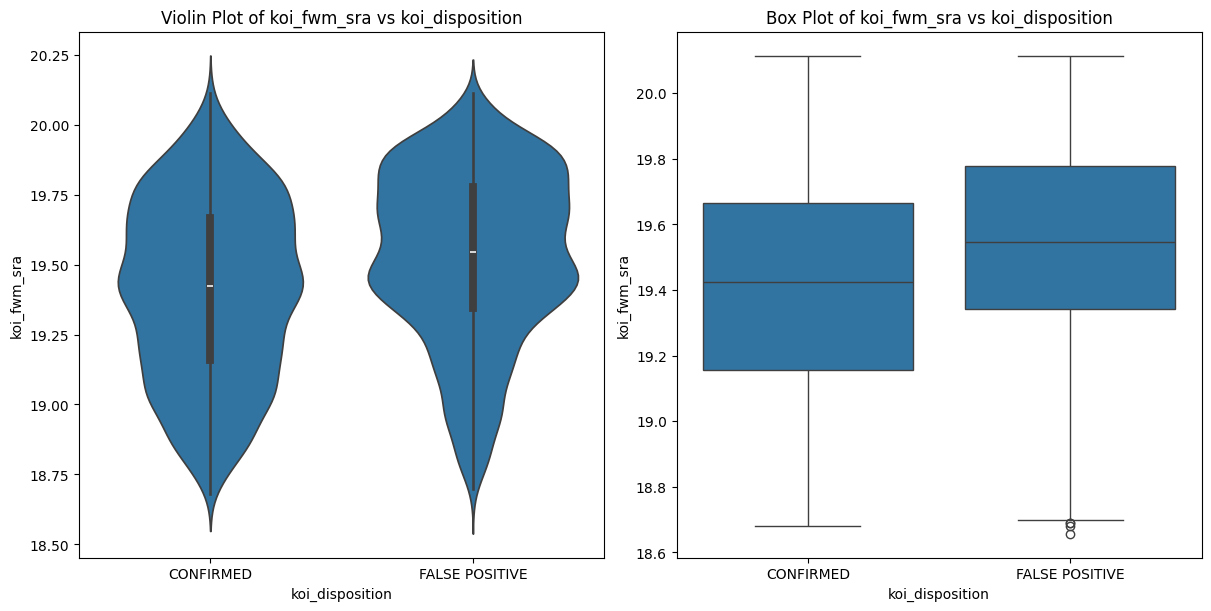

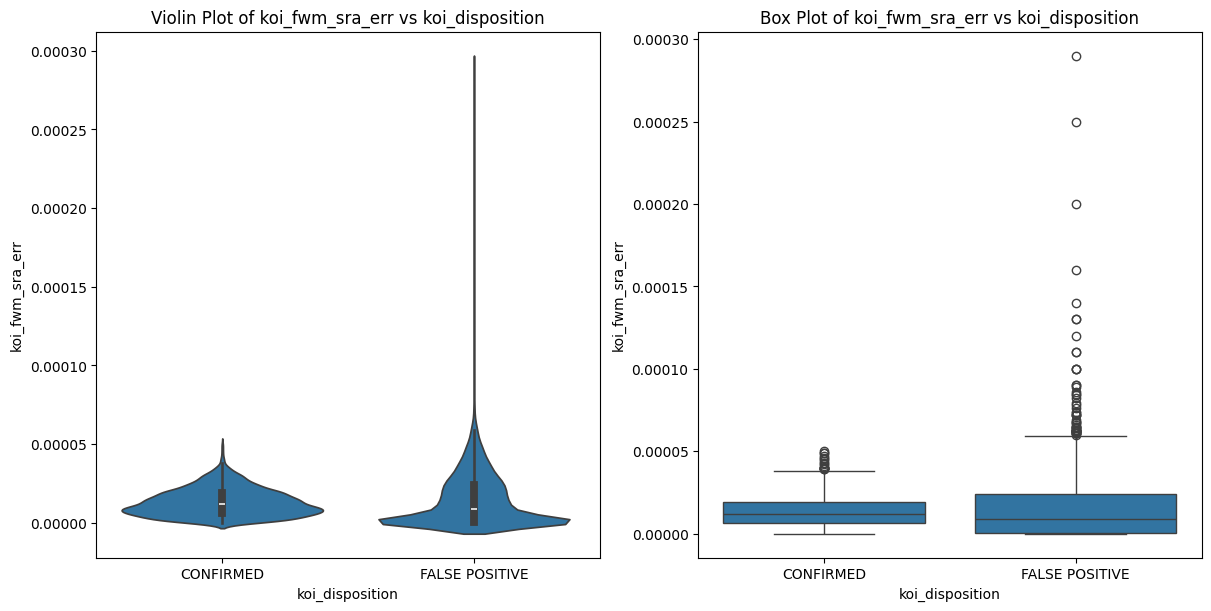

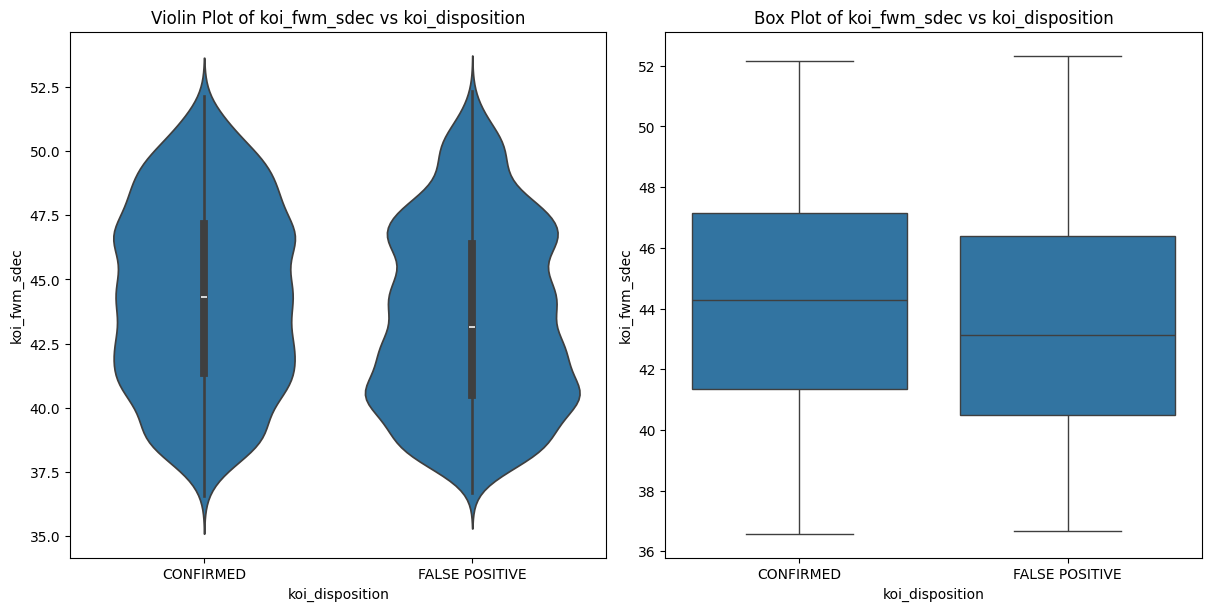

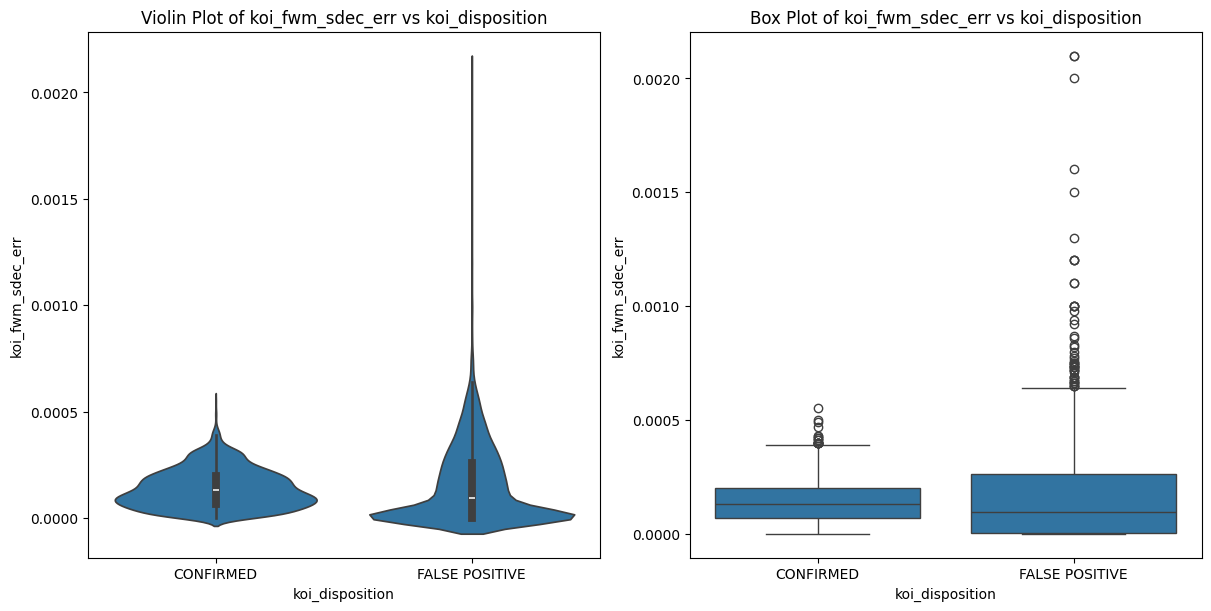

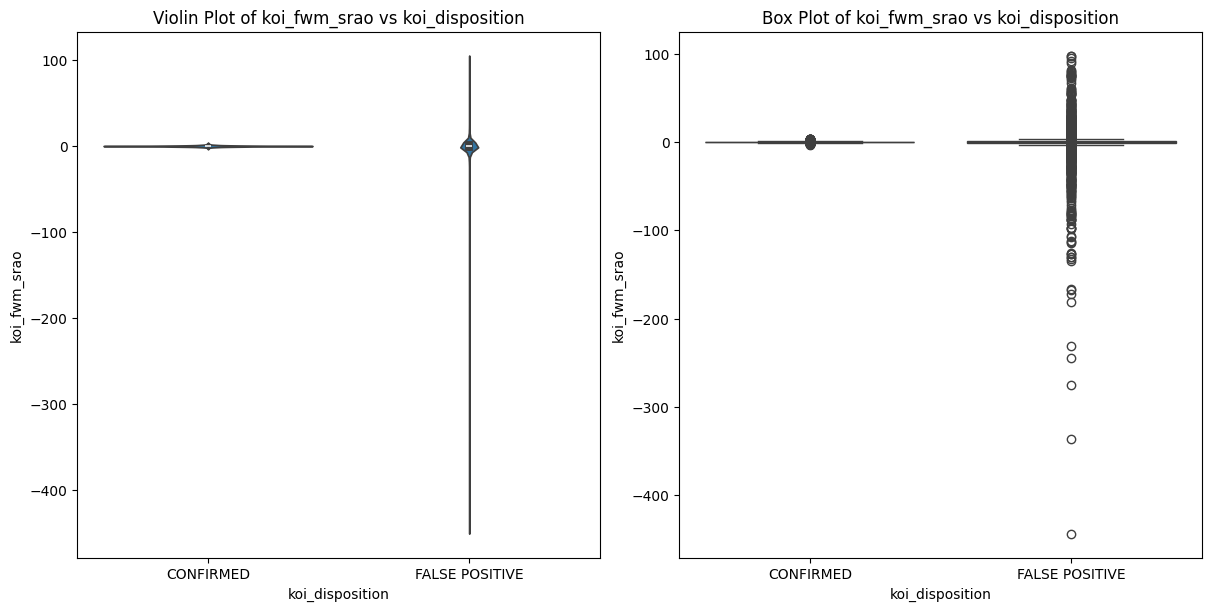

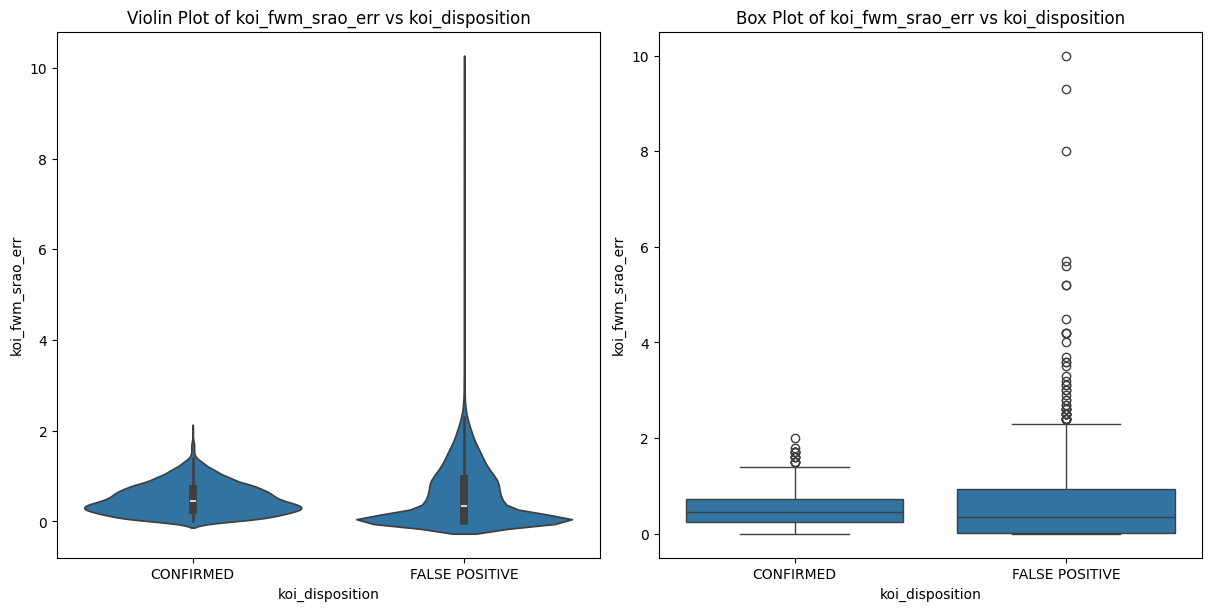

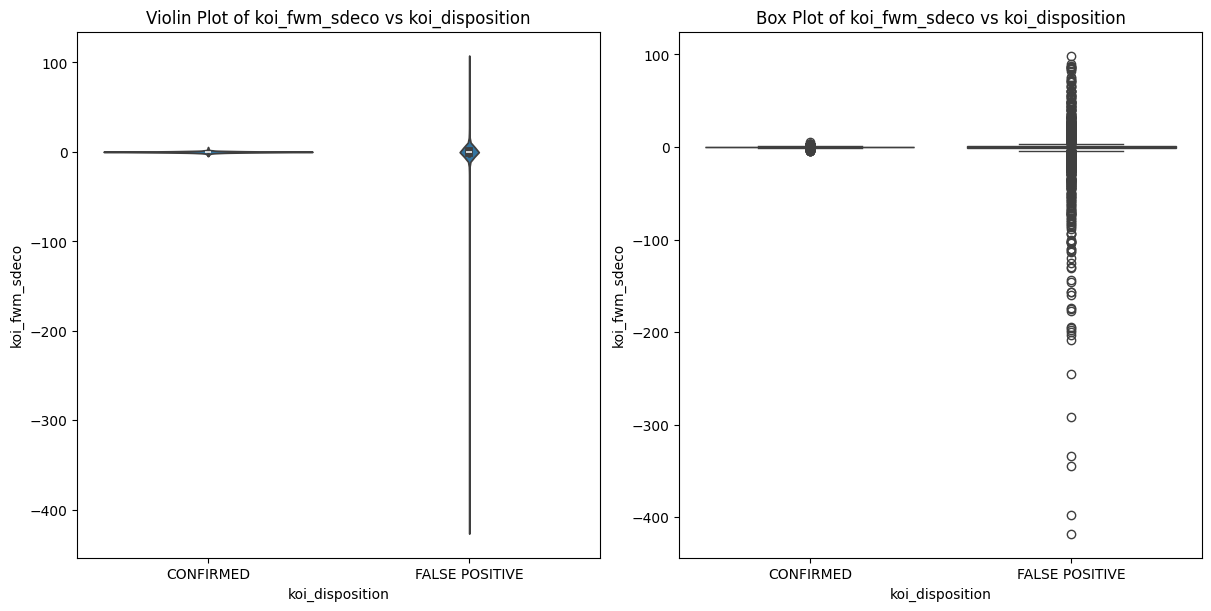

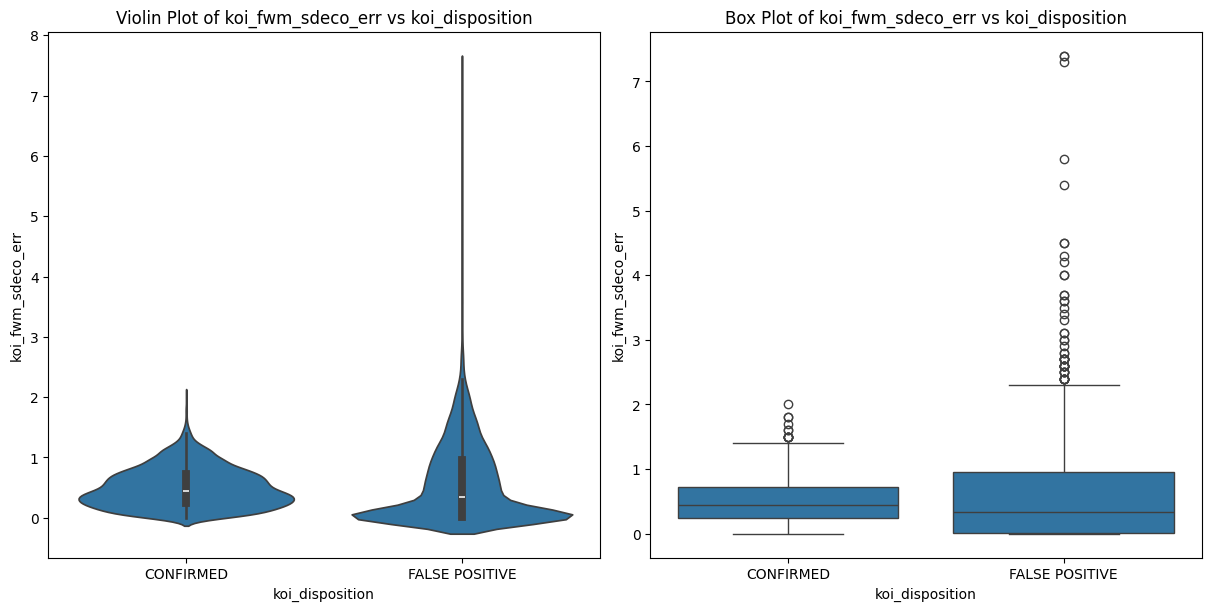

In [19]:
# Identify the target variable
target_variable = 'koi_disposition'

numerical_features = df_final.select_dtypes(include=['number']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['rowid', 'kepid']]


for feature in numerical_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), layout='constrained')

    sns.violinplot(x=target_variable, y=feature, data=df_final, ax=ax1)
    ax1.set_title(f'Violin Plot of {feature} vs {target_variable}')
    ax1.set_xlabel(target_variable)
    ax1.set_ylabel(feature)

    sns.boxplot(x=target_variable, y=feature, data=df_final, ax=ax2)
    ax2.set_title(f'Box Plot of {feature} vs {target_variable}')
    ax2.set_xlabel(target_variable)
    ax2.set_ylabel(feature)

    plt.show()

It seems that even though each variable is highly skewed and with outliers, between the two classes of the target variable they all seem to behave the same, which mean this problem will need non-linear solutions, like interactions, ratios and transformations.

### 3.3. Correlation Analysis

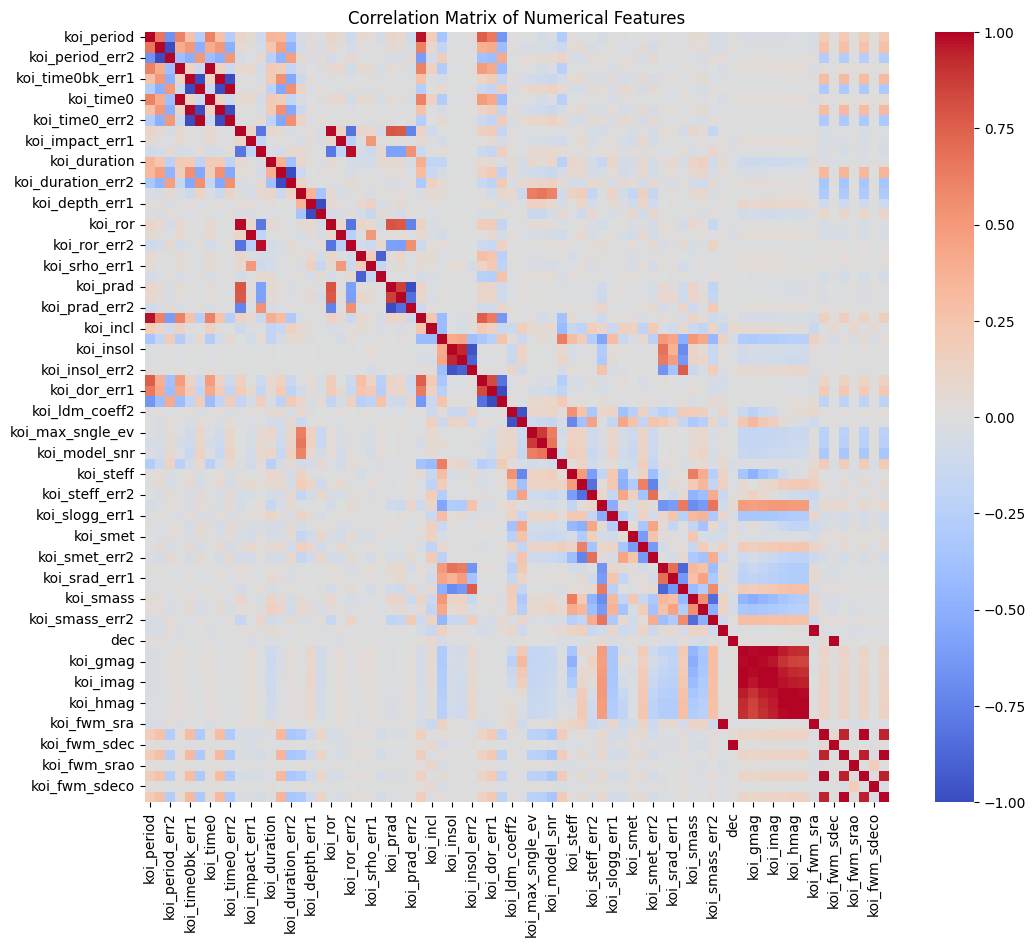

In [20]:
# Calculate the correlation matrix
correlation_matrix = df_final[numerical_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # Set annot=True to show correlation values
plt.title('Correlation Matrix of Numerical Features')
plt.show()

There seem to be some highly correlated features related to the host start's magnitude. This multicolinearly would mostly affect linear models, and since we already saw before we will need non-linear models or engineered features, we we'll leave these correlated features as they are for now.

## 4. Model Training and Evaluation

### 4.1. Train/Validation/Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns = ['koi_disposition','rowid','kepid'], axis=1), df_final['koi_disposition'], test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)



print(f"Train: {X_train.shape}")
print(f"Val: {X_val.shape}")
print(f"Test: {X_test.shape}")



print(f"Train: {y_train.shape}")
print(f"Val: {y_val.shape}")
print(f"Test: {y_test.shape}")

Train: (3831, 74)
Val: (1277, 74)
Test: (1277, 74)
Train: (3831,)
Val: (1277,)
Test: (1277,)


### 4.2. Baseline Models

#### Logistic Regression

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Metrics on Validation Set:
Accuracy: 0.8841
Precision: 0.8862
Recall: 0.8841
F1-Score: 0.8845

Confusion Matrix:


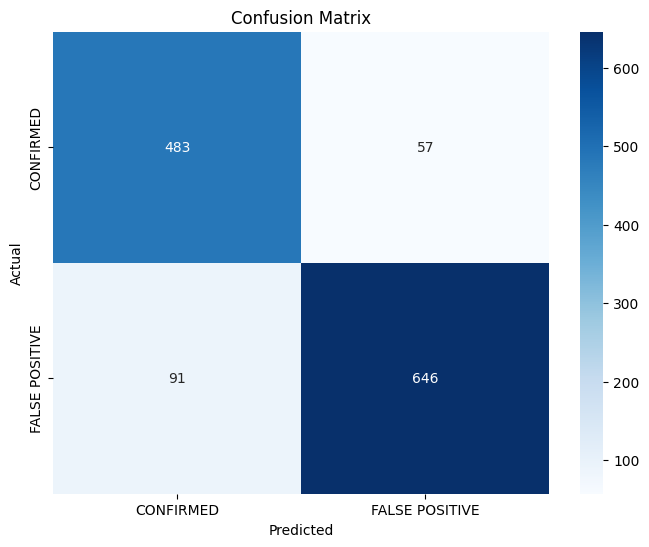

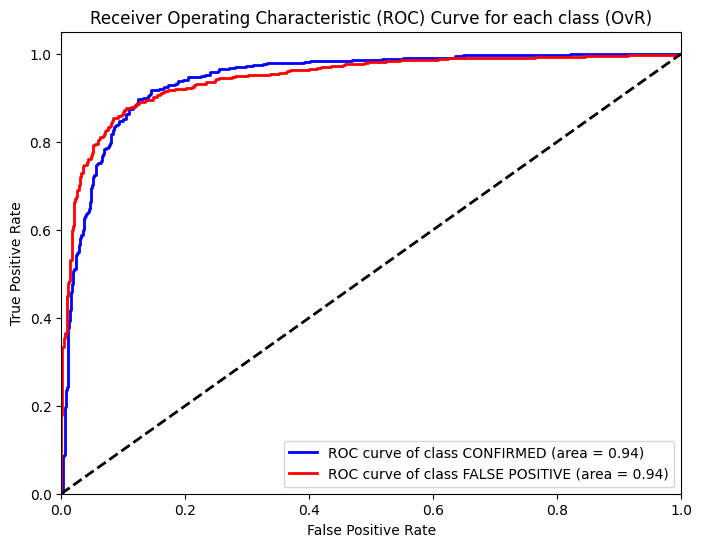

In [22]:
logistic_regression_model = LogisticRegression(max_iter=5000)

logistic_regression_model.fit(X_train, y_train)

logistic_regression_predictions = logistic_regression_model.predict(X_val)

# Calculate and print common classification metrics
print("Classification Metrics on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, logistic_regression_predictions):.4f}")
print(f"Precision: {precision_score(y_val, logistic_regression_predictions, average='weighted'):.4f}") # Use weighted for multi-class
print(f"Recall: {recall_score(y_val, logistic_regression_predictions, average='weighted'):.4f}")     # Use weighted for multi-class
print(f"F1-Score: {f1_score(y_val, logistic_regression_predictions, average='weighted'):.4f}")       # Use weighted for multi-class

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, logistic_regression_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logistic_regression_model.classes_, yticklabels=logistic_regression_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Since it's a multi-class problem, let's plot ROC for each class using OvR strategy
y_prob = logistic_regression_model.predict_proba(X_val)
n_classes = len(logistic_regression_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Assuming y_val is already encoded if needed for OvR ROC calculation
    # If y_val is not encoded, you might need to encode it here or adjust the logic
    # For now, let's use the class indices
    binary_y_val = (y_val == logistic_regression_model.classes_[i]).astype(int)
    fpr[i], tpr[i], _ = roc_curve(binary_y_val, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green'] # Define colors for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:.2f})'.format(logistic_regression_model.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class (OvR)')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

Classification Metrics on Validation Set (Random Forest):
Accuracy: 0.9593
Precision: 0.9602
Recall: 0.9593
F1-Score: 0.9591

Confusion Matrix (Random Forest):


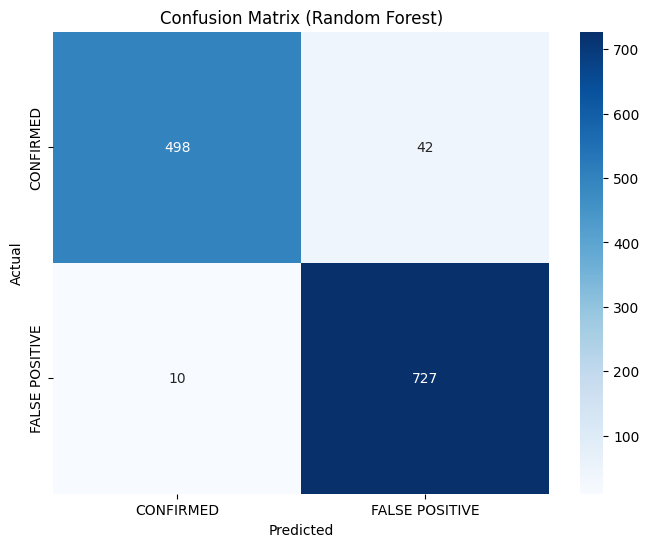

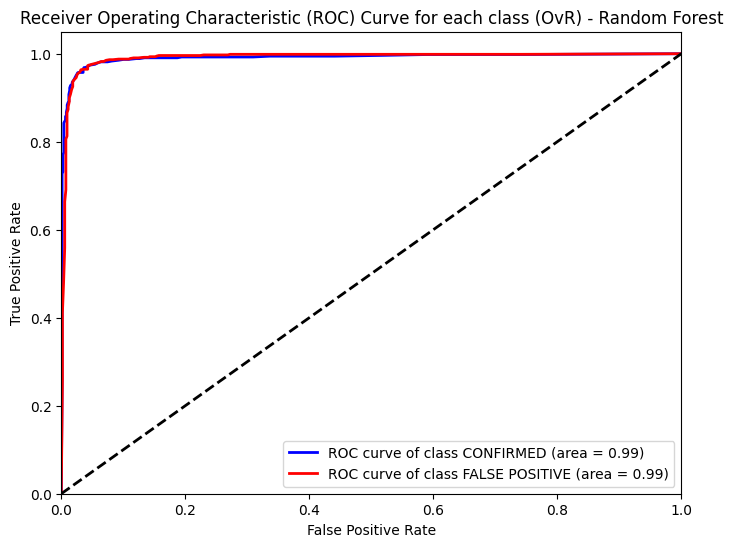

In [23]:
# Initialize the RandomForestClassifier model
# You can adjust hyperparameters like n_estimators, max_depth, etc.
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model using the scaled training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the scaled validation set
random_forest_predictions = random_forest_model.predict(X_val)

# Calculate and print common classification metrics
print("Classification Metrics on Validation Set (Random Forest):")
print(f"Accuracy: {accuracy_score(y_val, random_forest_predictions):.4f}")
print(f"Precision: {precision_score(y_val, random_forest_predictions, average='weighted'):.4f}") # Use weighted for multi-class
print(f"Recall: {recall_score(y_val, random_forest_predictions, average='weighted'):.4f}")     # Use weighted for multi-class
print(f"F1-Score: {f1_score(y_val, random_forest_predictions, average='weighted'):.4f}")       # Use weighted for multi-class

# Confusion Matrix
print("\nConfusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_val, random_forest_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# ROC Curve (OvR for multi-class)
y_prob_rf = random_forest_model.predict_proba(X_val)
n_classes_rf = len(random_forest_model.classes_)
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(n_classes_rf):
    binary_y_val_rf = (y_val == random_forest_model.classes_[i]).astype(int)
    fpr_rf[i], tpr_rf[i], _ = roc_curve(binary_y_val_rf, y_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red'] # Adjust colors if you have more than 2 classes
for i in range(n_classes_rf):
    plt.plot(fpr_rf[i], tpr_rf[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:.2f})'.format(random_forest_model.classes_[i], roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class (OvR) - Random Forest')
plt.legend(loc="lower right")
plt.show()

#### XGBoost

Classification Metrics on Validation Set (XGBoost):
Accuracy: 0.9804
Precision: 0.9804
Recall: 0.9804
F1-Score: 0.9804

Confusion Matrix (XGBoost):


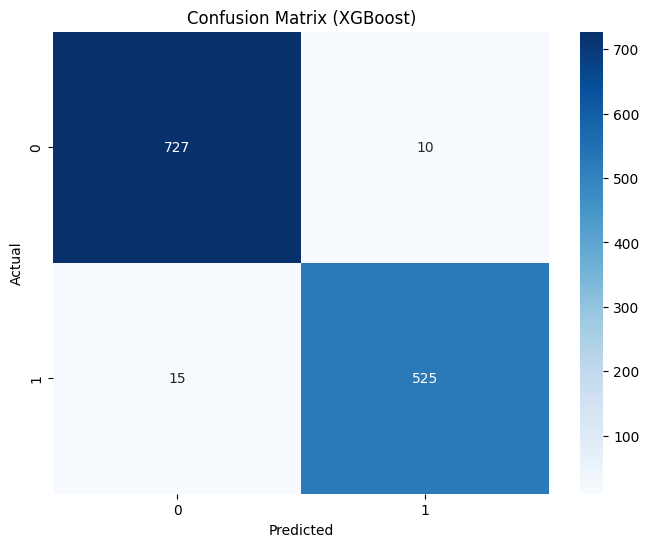

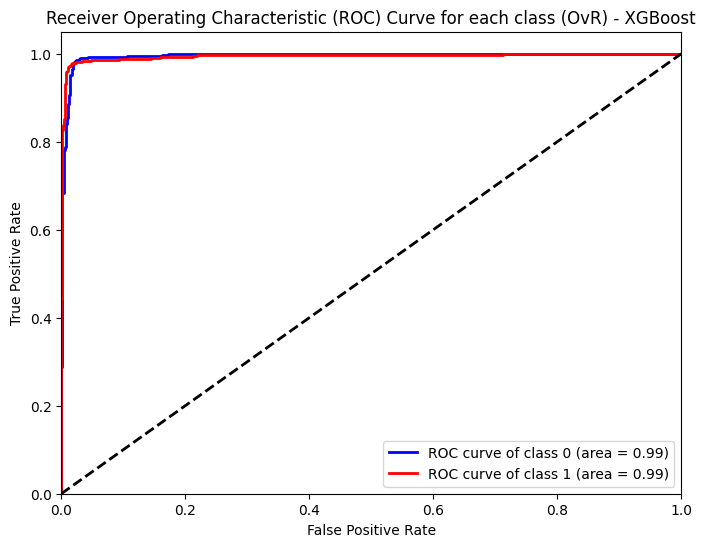

In [24]:
# Encode the target variable
y_train_encoded = y_train.map({'FALSE POSITIVE': 0, 'CONFIRMED': 1})
y_val_encoded = y_val.map({'FALSE POSITIVE': 0, 'CONFIRMED': 1})

xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train_encoded)

xgb_predictions = xgb_model.predict(X_val)

# Calculate and print common classification metrics
print("Classification Metrics on Validation Set (XGBoost):")
print(f"Accuracy: {accuracy_score(y_val_encoded, xgb_predictions):.4f}")
print(f"Precision: {precision_score(y_val_encoded, xgb_predictions, average='weighted'):.4f}") # Use weighted for multi-class
print(f"Recall: {recall_score(y_val_encoded, xgb_predictions, average='weighted'):.4f}")     # Use weighted for multi-class
print(f"F1-Score: {f1_score(y_val_encoded, xgb_predictions, average='weighted'):.4f}")       # Use weighted for multi-class

# Confusion Matrix
print("\nConfusion Matrix (XGBoost):")
cm_rf = confusion_matrix(y_val_encoded, xgb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

# ROC Curve (OvR for multi-class)
y_prob_rf = xgb_model.predict_proba(X_val)
n_classes_rf = len(xgb_model.classes_)
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(n_classes_rf):
    binary_y_val_rf = (y_val_encoded == xgb_model.classes_[i]).astype(int)
    fpr_rf[i], tpr_rf[i], _ = roc_curve(binary_y_val_rf, y_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red'] # Adjust colors if you have more than 2 classes
for i in range(n_classes_rf):
    plt.plot(fpr_rf[i], tpr_rf[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:.2f})'.format(xgb_model.classes_[i], roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class (OvR) - XGBoost')
plt.legend(loc="lower right")
plt.show()

### 4.3 Final Model Comparison

In [25]:
models = {
    'LogReg': logistic_regression_model,
    'RandomForest': random_forest_model,
    'XGBoost': xgb_model
}

results = []

# Encode y_test
y_test_encoded = y_test.map({'FALSE POSITIVE': 0, 'CONFIRMED': 1})


for name, model in models.items():
    y_pred = model.predict(X_test)

    if name in ['LogReg', 'RandomForest']:
        y_pred_encoded = pd.Series(y_pred).map({'FALSE POSITIVE': 0, 'CONFIRMED': 1})

        confirmed_class_idx = list(model.classes_).index('CONFIRMED')
        y_proba = model.predict_proba(X_test)[:, confirmed_class_idx]

    else:  # XGBoost
        y_pred_encoded = y_pred
        y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test_encoded, y_pred_encoded)
    prec = precision_score(y_test_encoded, y_pred_encoded)
    rec = recall_score(y_test_encoded, y_pred_encoded)
    f1 = f1_score(y_test_encoded, y_pred_encoded)
    roc = roc_auc_score(y_test_encoded, y_proba)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'ROC-AUC': roc
    })


results_df = pd.DataFrame(results)
print("\n" + "="*60)
print("FINAL COMPARISON - TEST SET")
print("="*60)
print(results_df.to_string(index=False))


FINAL COMPARISON - TEST SET
       Model  Accuracy  Precision   Recall       F1  ROC-AUC
      LogReg  0.881754   0.844828 0.889292 0.866490 0.944819
RandomForest  0.955364   0.967803 0.927405 0.947173 0.985737
     XGBoost  0.962412   0.956443 0.956443 0.956443 0.991684


Although performing really well, performance on the test set reveals there is not overfit happening. For this reason, XGBoost is chosen as the final model due to showing the best performance across all metrics.

### 4.4 Feature Importance (XGBoost)

In [26]:
feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)
print(feat_imp.head(15))

              feature  importance
50      koi_smet_err2    0.411330
26      koi_prad_err2    0.078076
33            koi_dor    0.062608
24           koi_prad    0.054869
39    koi_max_mult_ev    0.034655
30          koi_insol    0.028768
14  koi_duration_err2    0.022362
72      koi_fwm_sdeco    0.020987
70       koi_fwm_srao    0.020982
13  koi_duration_err1    0.017603
29            koi_teq    0.016869
18            koi_ror    0.016760
0          koi_period    0.016677
25      koi_prad_err1    0.012642
4    koi_time0bk_err1    0.011509


The top 15 features are able to explain about 87% of the total importance.

## 5. Conclusions

In [27]:
feature_medians = X_train.median()
feature_medians.to_csv('feature_medians.csv')

In [28]:
joblib.dump(xgb_model, 'exoplanet_xgb_model.pkl')

['exoplanet_xgb_model.pkl']

Based on the analysis and model training:

*   The dataset required significant cleaning and preprocessing, including removing irrelevant features, handling missing values by dropping columns with 100% missing data and then rows with remaining missing data, and removing constant features.
*   The target variable, 'koi_disposition', was imbalanced, with 'CONFIRMED' and 'FALSE POSITIVE' being the primary classes of interest after removing 'CANDIDATE'.
*   Exploratory Data Analysis revealed that most numerical features, while skewed, showed similar distributions between the two target classes, suggesting the need for non-linear models or feature engineering.
*   Correlation analysis indicated some multicollinearity among features, particularly those related to stellar magnitude. However, given the intention to use non-linear models, these were not removed.
*   Three baseline classification models were trained and evaluated: Logistic Regression, Random Forest, and XGBoost.
*   XGBoost demonstrated the best performance on the test set across all evaluated metrics (Accuracy, Precision, Recall, F1-Score, and ROC-AUC), achieving an accuracy of 0.9614 and an ROC-AUC of 0.9906.
*   Feature importance analysis from the XGBoost model highlighted that a relatively small number of features contribute significantly to the model's predictions, with 'koi_smet_err2', 'koi_prad', 'koi_dor', and 'koi_prad_err2' being the most important.
*   The final XGBoost model was saved as 'exoplanet_xgb_model.pkl' for future deployment.

In conclusion, the baseline models, particularly XGBoost, performed exceptionally well on the test set, and no overfitting was observed, which indicates that further advanced feature engineering, hyperparameter tuning, or exploring more complex models were not necessary to achieve high performance on this dataset. The XGBoost model provides a robust solution for classifying exoplanets as either 'CONFIRMED' or 'FALSE POSITIVE' based on the provided Kepler KOI data.